In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the Excel file
file_path = 'Data.xlsx'
# Read the Excel file
xls = pd.ExcelFile(file_path)

# Get the names of the sheets in the Excel file
sheet_names = xls.sheet_names
sheet_names


['Sheet1',
 'MXIN Index',
 'MXCN Index',
 'MXBR Index',
 'MXKR Index',
 'MXMX Index',
 'MXID Index',
 'MXKW Index',
 'CO1 Comdty',
 'CL1 Comdty']

In [ ]:
# Load the data from 'Sheet1' to inspect its structure for renaming the indices
sheet1_data = pd.read_excel(xls, sheet_name='Sheet1')

# Display the first few rows of 'Sheet1' to understand the data structure
sheet1_data


Country        Index
0        India   MXIN Index
1        China   MXCN Index
2       Brazil   MXBR Index
3  South Korea   MXKR Index
4       Mexico   MXMX Index
5    Indonesia   MXID Index
6       Kuwait   MXKW Index
7    Brent oil   CO1 Comdty
8      WTI oil  CL! Comdity

In [ ]:
# We will create a dictionary to hold the data frames for each index for efficiency
index_data_frames = {}

# Load the data from each sheet (excluding the first one) into the dictionary
for sheet_name in sheet_names[1:]:  # Skip the first sheet which is 'Sheet1'
    index_data_frames[sheet_name] = pd.read_excel(xls, sheet_name=sheet_name)

index_data_frames

{'MXIN Index':           Dates  PX_LAST  CHG_PCT_1D  PX_VOLUME
 0    2022-12-29  2076.77        0.32  708595979
 1    2022-12-28  2070.12        0.07  790128507
 2    2022-12-27  2068.72        0.81  921427716
 3    2022-12-26  2052.03        1.35  947955797
 4    2022-12-23  2024.77       -2.34  928779498
 ...         ...      ...         ...        ...
 5734 2001-01-05   183.67        2.08  103964915
 5735 2001-01-04   179.92        1.91  108378847
 5736 2001-01-03   176.54        0.74  102311169
 5737 2001-01-02   175.24        1.52   93289426
 5738 2001-01-01   172.61       -0.47   78281470
 
 [5739 rows x 4 columns],
 'MXCN Index':           Dates  PX_LAST  CHG_PCT_1D    PX_VOLUME LOG RETURNS
 0    2022-12-29    64.32       -0.39  14505728793   -0.387928
 1    2022-12-28    64.57        0.94  18174726662    0.933568
 2    2022-12-27    63.97        0.39  11663039034    0.391574
 3    2022-12-26    63.72        0.09  10861153076    0.094206
 4    2022-12-23    63.66       -0.93  11

In [ ]:
index_data_frames.items()

dict_items([('MXIN Index',           Dates  PX_LAST  CHG_PCT_1D  PX_VOLUME
0    2022-12-29  2076.77        0.32  708595979
1    2022-12-28  2070.12        0.07  790128507
2    2022-12-27  2068.72        0.81  921427716
3    2022-12-26  2052.03        1.35  947955797
4    2022-12-23  2024.77       -2.34  928779498
...         ...      ...         ...        ...
5734 2001-01-05   183.67        2.08  103964915
5735 2001-01-04   179.92        1.91  108378847
5736 2001-01-03   176.54        0.74  102311169
5737 2001-01-02   175.24        1.52   93289426
5738 2001-01-01   172.61       -0.47   78281470

[5739 rows x 4 columns]), ('MXCN Index',           Dates  PX_LAST  CHG_PCT_1D    PX_VOLUME LOG RETURNS
0    2022-12-29    64.32       -0.39  14505728793   -0.387928
1    2022-12-28    64.57        0.94  18174726662    0.933568
2    2022-12-27    63.97        0.39  11663039034    0.391574
3    2022-12-26    63.72        0.09  10861153076    0.094206
4    2022-12-23    63.66       -0.93  1148856

In [ ]:
index_to_country = sheet1_data.set_index('Index')['Country'].to_dict()
index_to_country

{'MXIN Index': 'India',
 'MXCN Index': 'China',
 'MXBR Index': 'Brazil',
 'MXKR Index': 'South Korea',
 'MXMX Index': 'Mexico',
 'MXID Index': 'Indonesia',
 'MXKW Index': 'Kuwait',
 'CO1 Comdty': 'Brent oil',
 'CL! Comdity': 'WTI oil'}

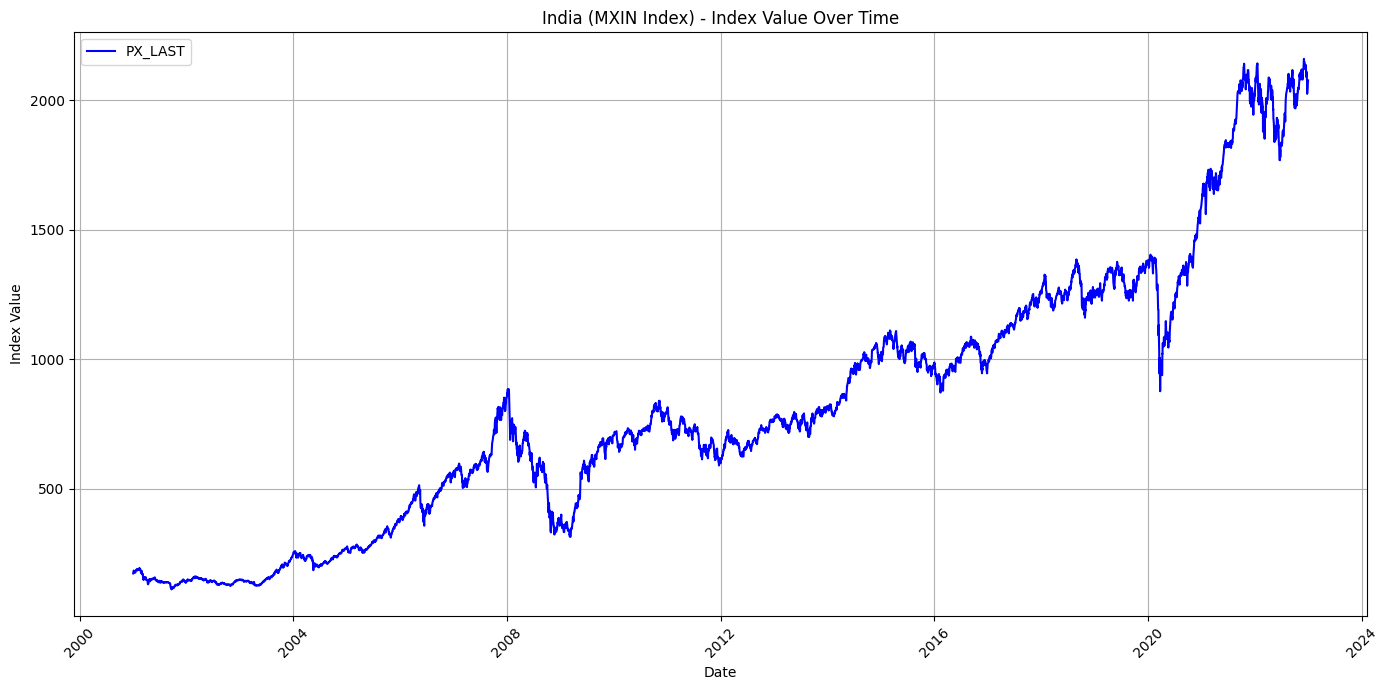

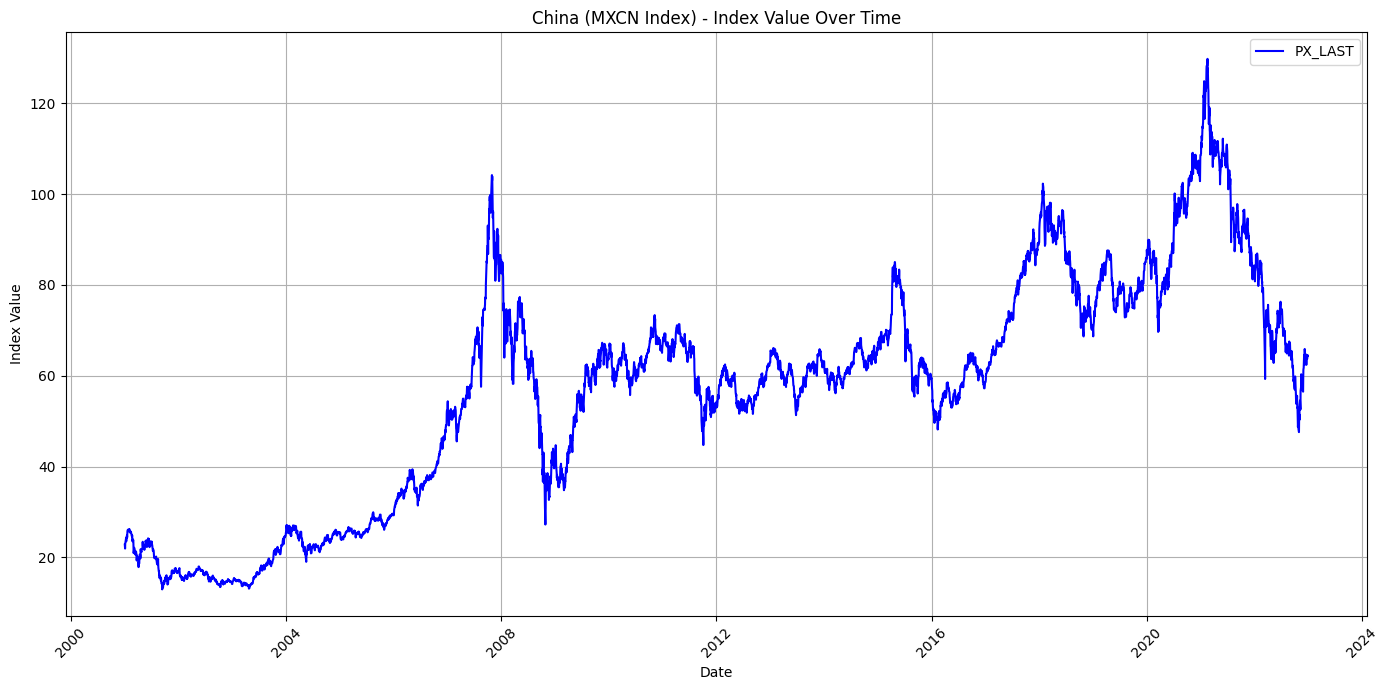

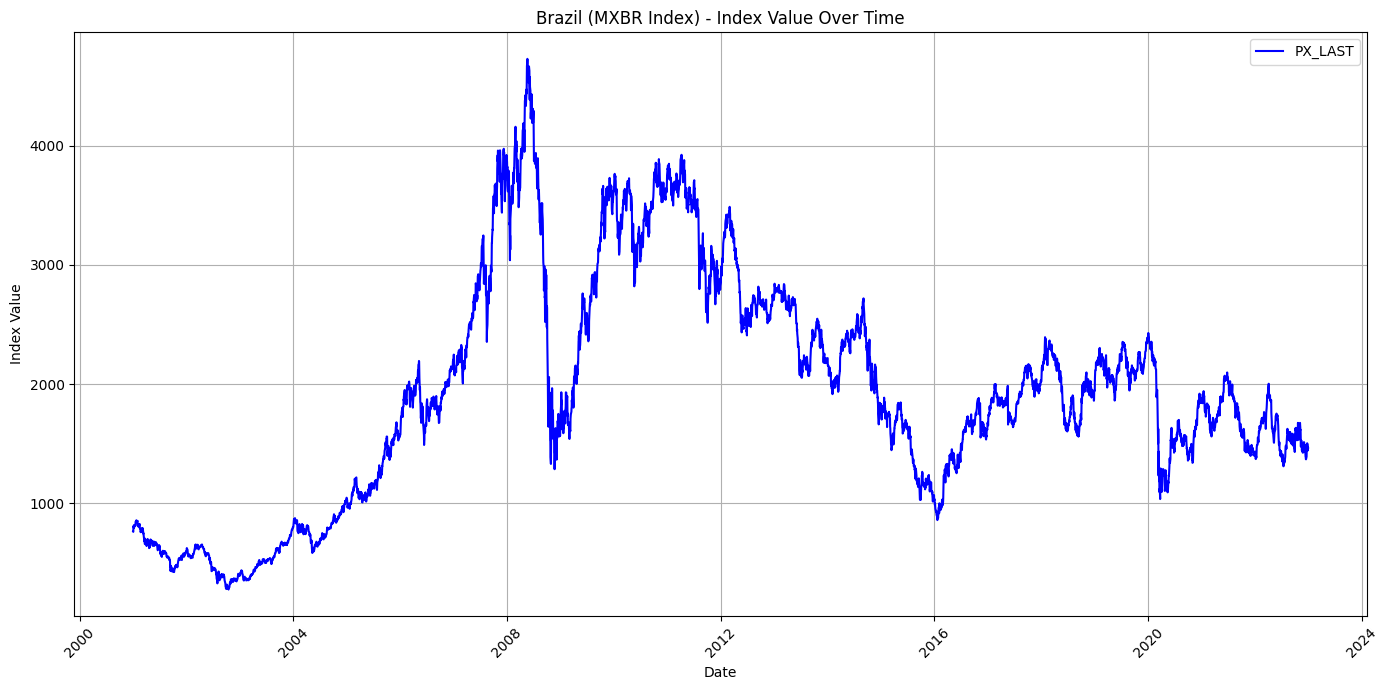

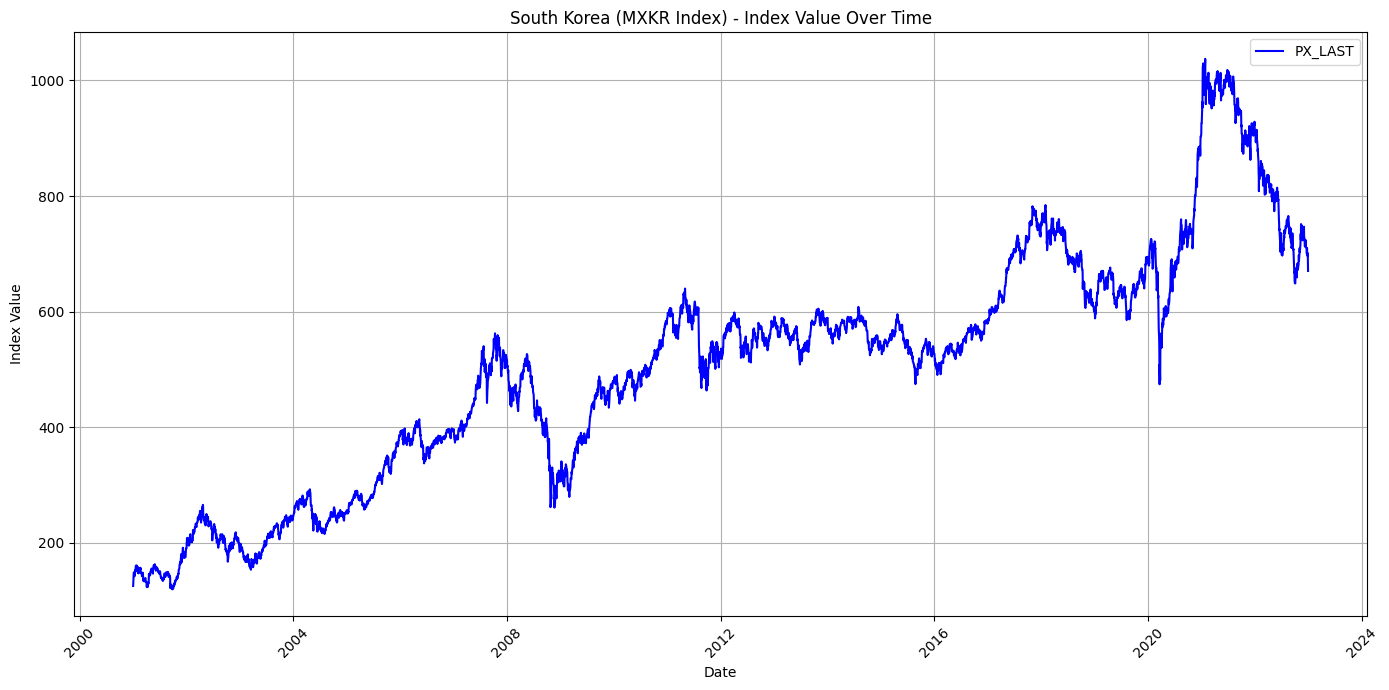

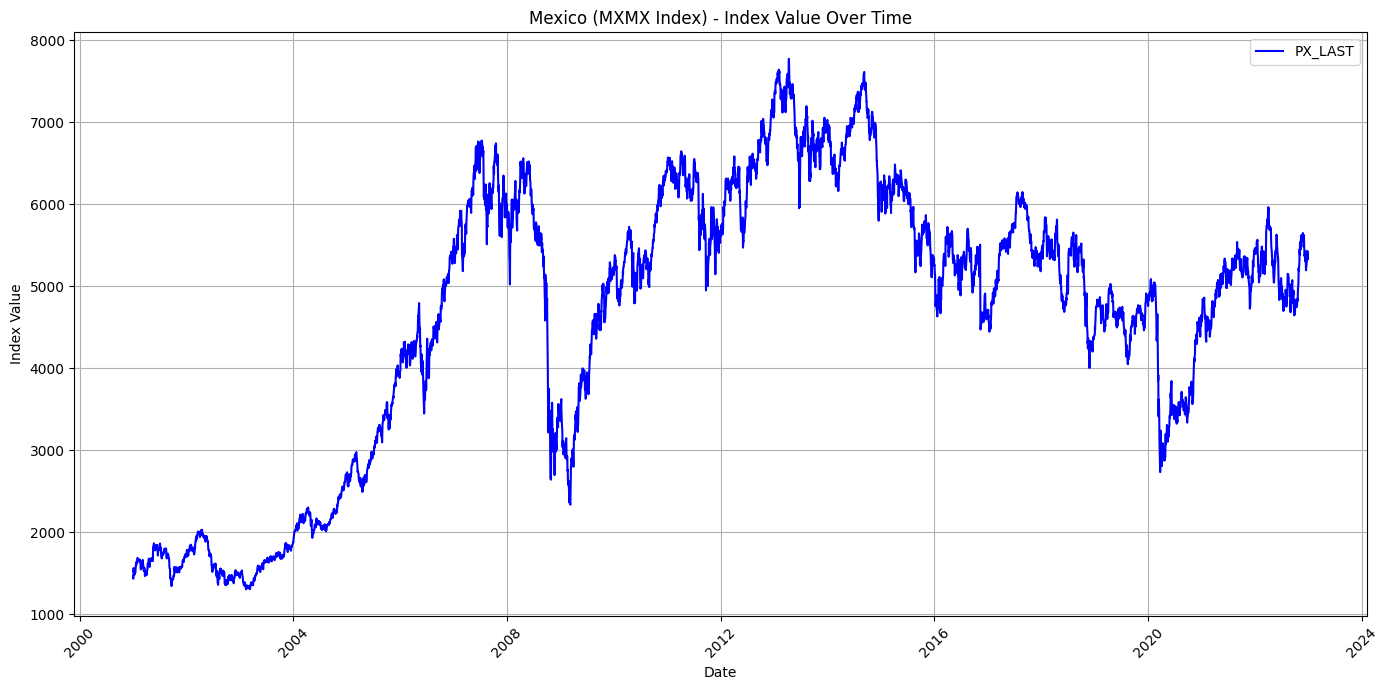

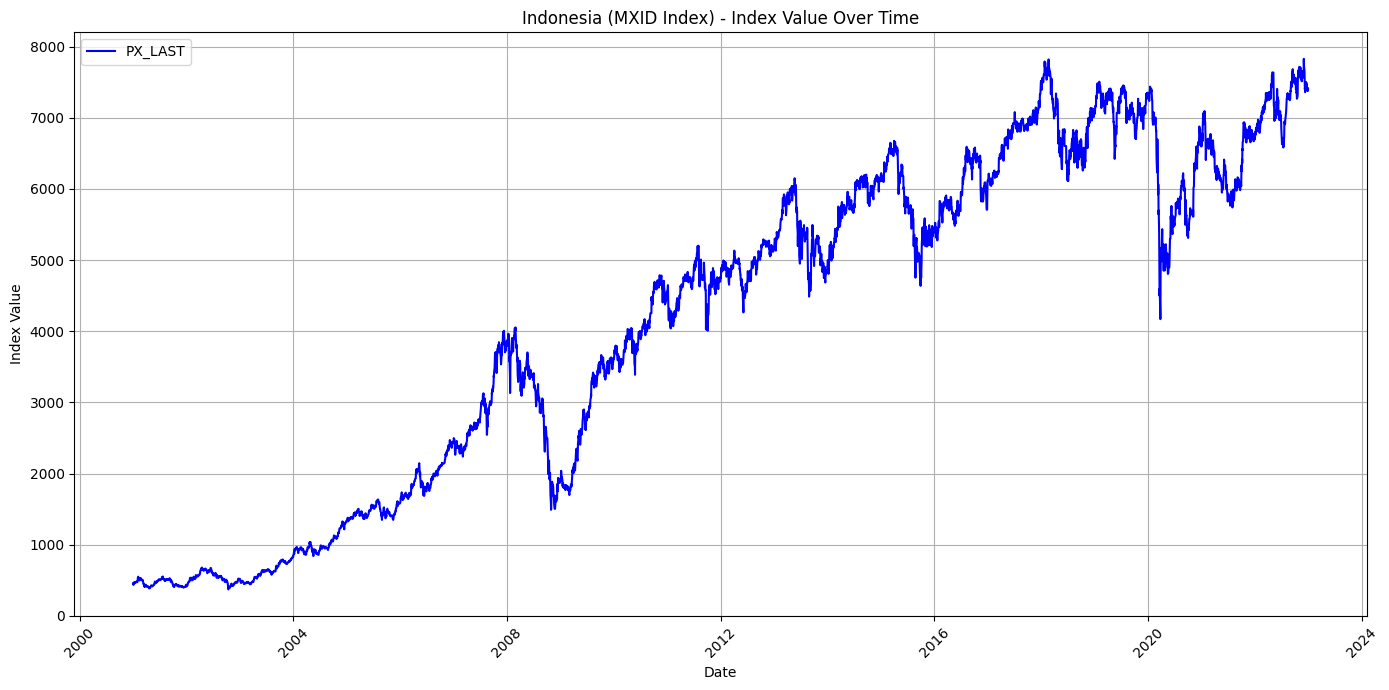

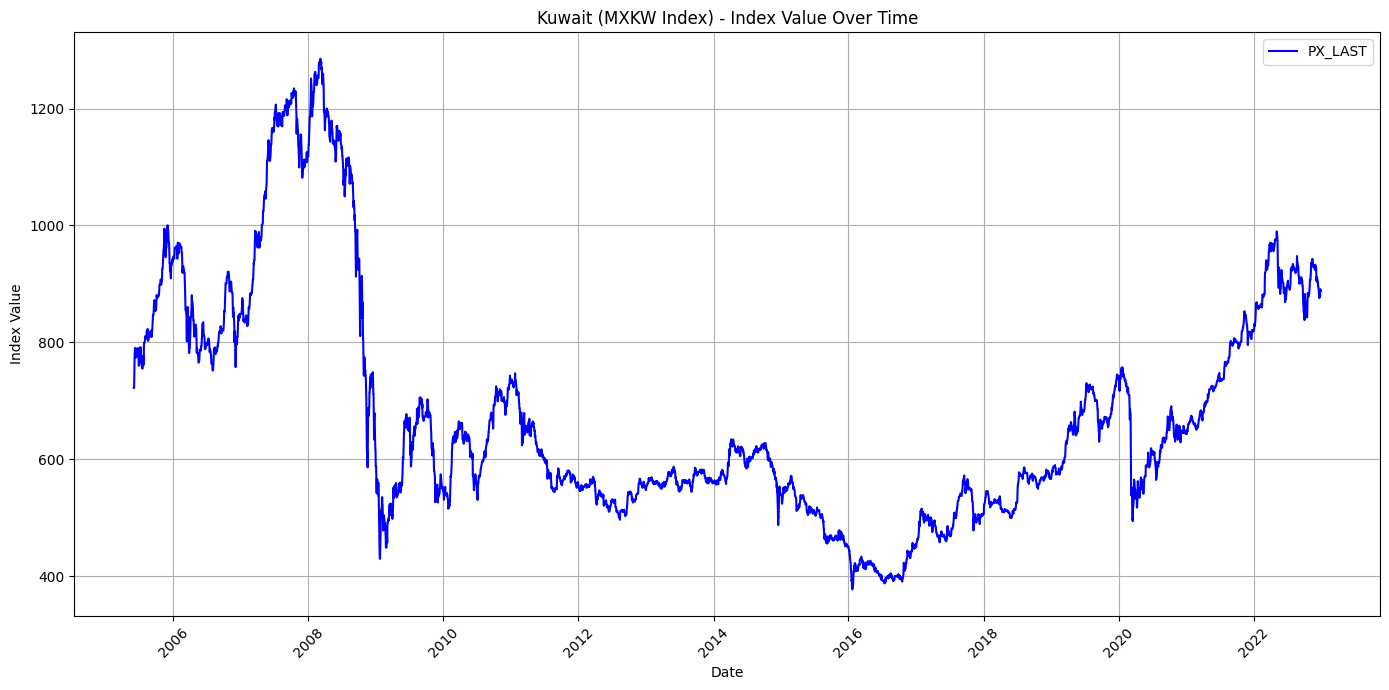

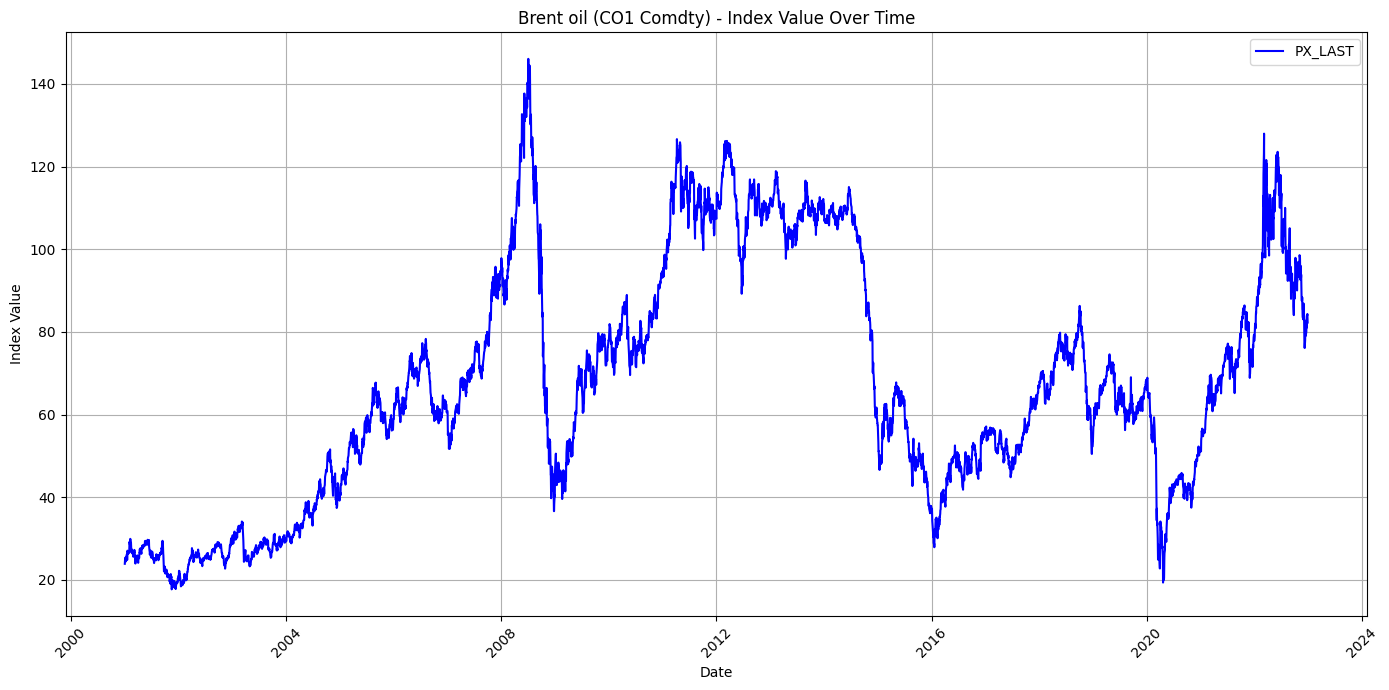

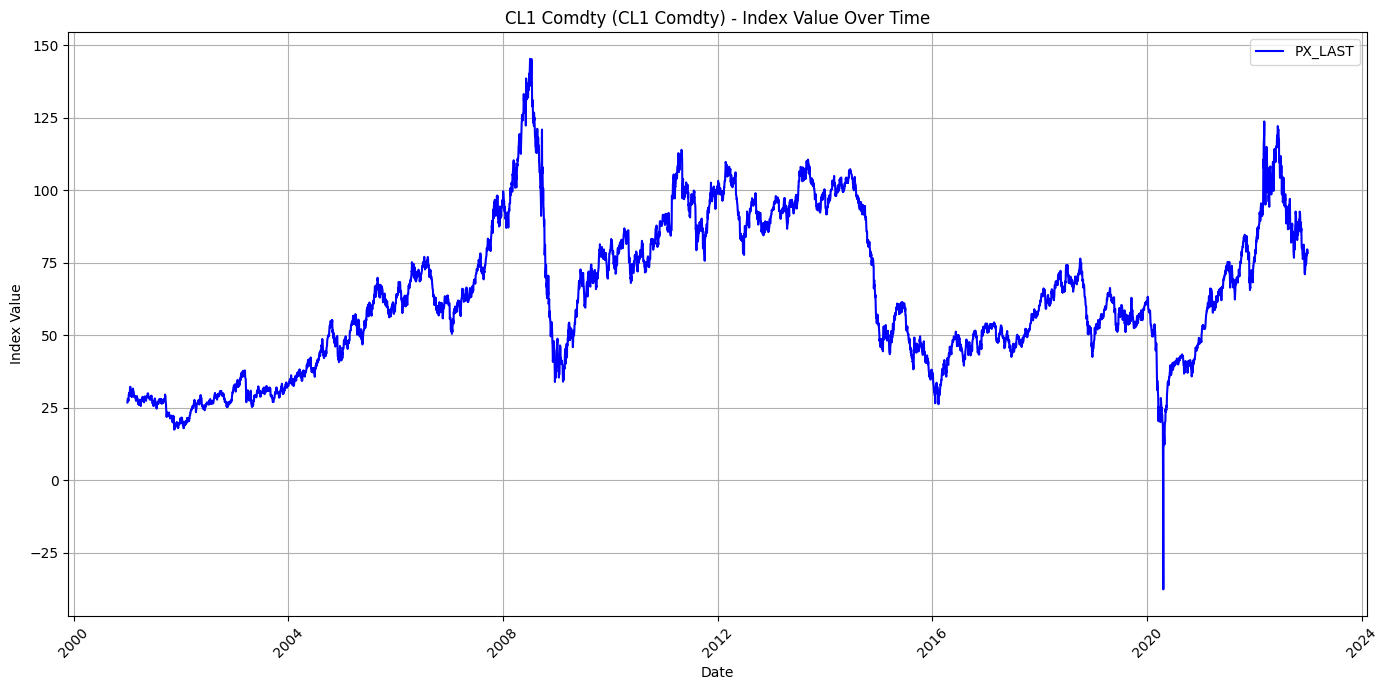

In [ ]:
# Update the function to include the Index sign in the graph title in brackets
def plot_index_or_commodity_graph(data_frame, sheet_name):
    name = index_to_country.get(sheet_name, sheet_name)  # Use the sheet name as fallback
    plt.figure(figsize=(14, 7))
    plt.plot(data_frame['Dates'], data_frame['PX_LAST'], label='PX_LAST', color='blue')
    plt.title(f'{name} ({sheet_name}) - Index Value Over Time')
    plt.xlabel('Date')
    plt.ylabel('Index Value')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust the padding between and around subplots.

# Plot the graphs for each index with the country names and index signs in the title
for sheet_name, data_frame in index_data_frames.items():
        plot_index_or_commodity_graph(data_frame, sheet_name)

# Show the plots for all indices and commodities
plt.show()


In [ ]:
import numpy as np

# Function to calculate logarithmic returns
def calculate_log_returns(data_frame):
    # Calculate log returns using the formula provided
    # We use the np.log function for natural logarithm and then diff to find the difference
    log_returns = 100 * (np.log(data_frame['PX_LAST']).diff())
    return log_returns

# Calculate log returns for each data frame and add it as a new column 'LOG_RETURNS'
for sheet_name, data_frame in index_data_frames.items():
    if 'PX_LAST' in data_frame.columns:
        data_frame['LOG_RETURNS'] = calculate_log_returns(data_frame)



/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# Function to plot logarithmic returns graph
def plot_log_returns_graph(data_frame, sheet_name):
    name = index_to_country.get(sheet_name, sheet_name)  # Use the sheet name as fallback
    plt.figure(figsize=(14, 7))
    plt.plot(data_frame['Dates'], data_frame['LOG_RETURNS'], label='LOG_RETURNS')
    plt.title(f'Logarithmic Returns of {name} ({sheet_name})')
    plt.xlabel('Date')
    plt.ylabel('Logarithmic Returns (%)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust the padding between and around subplots.

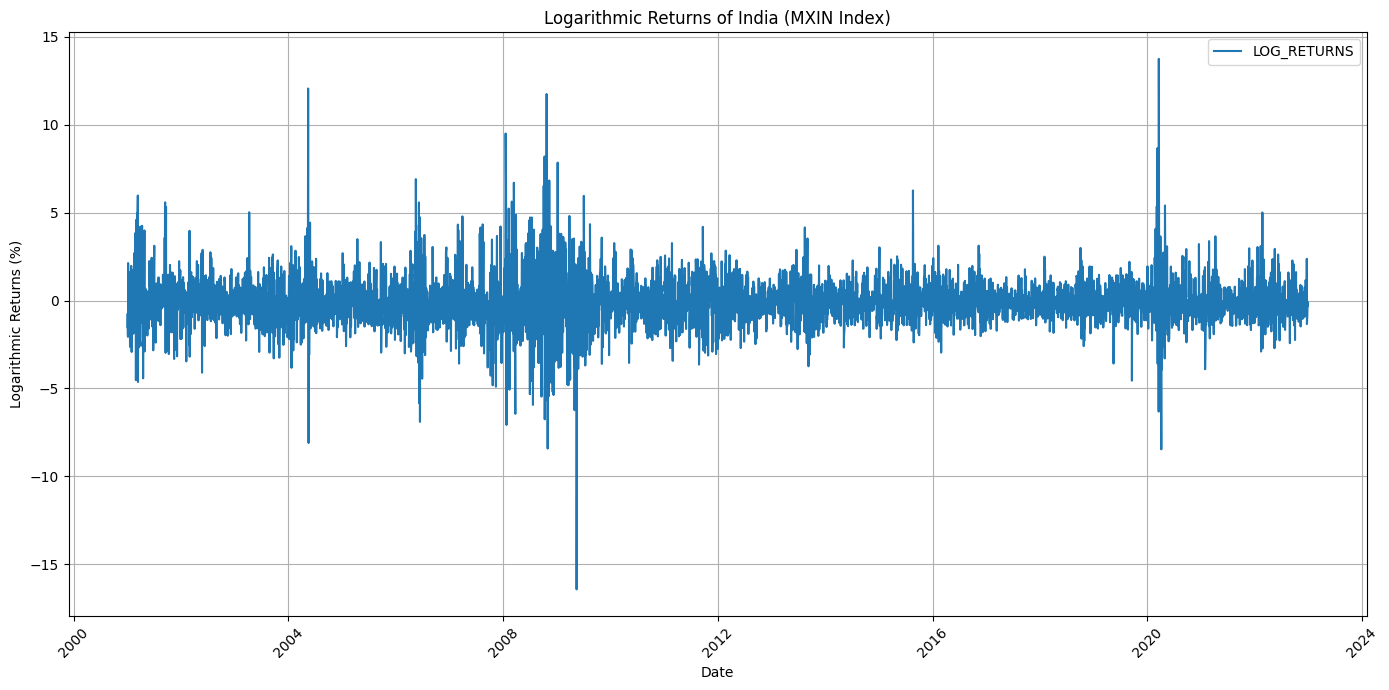

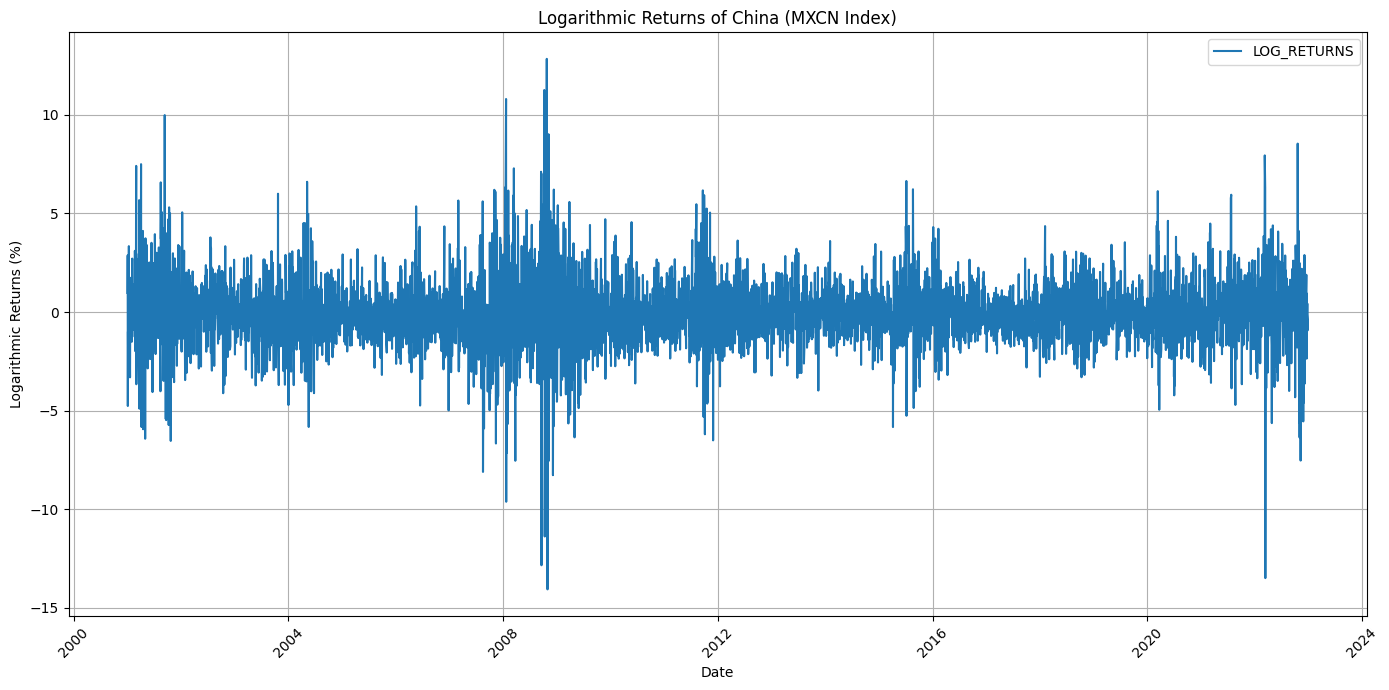

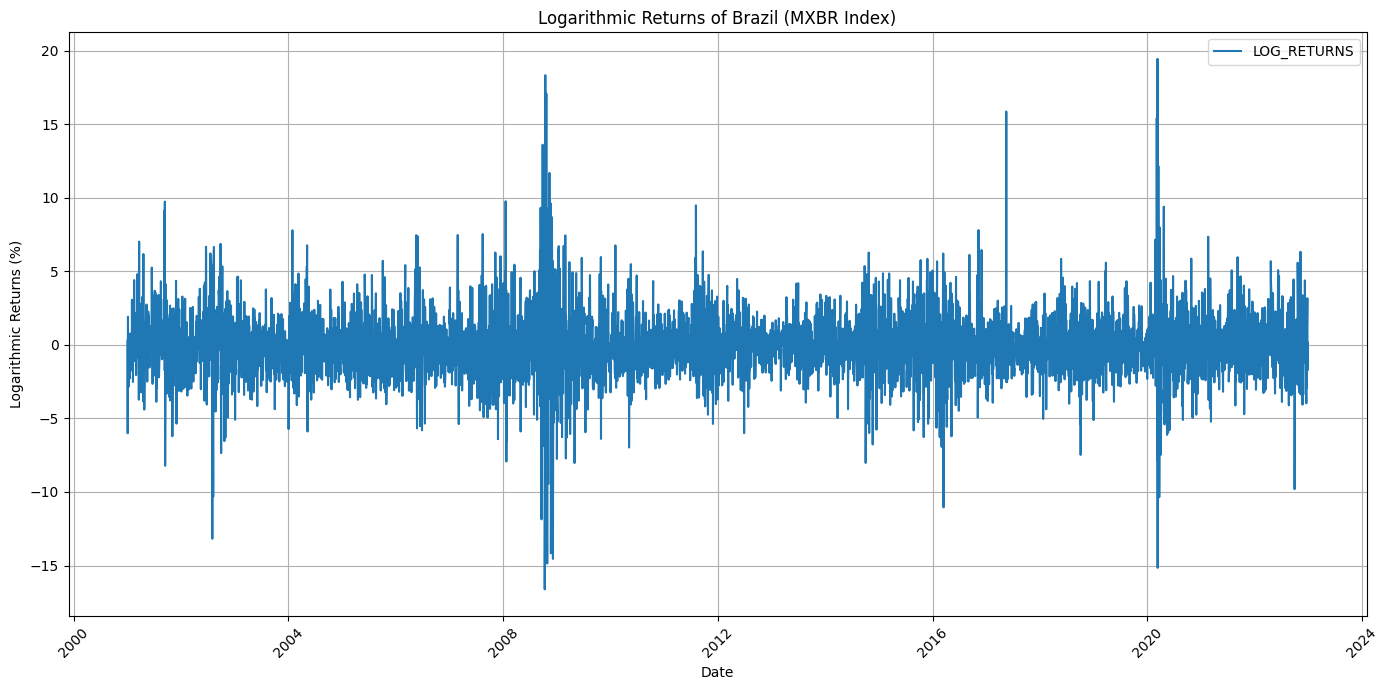

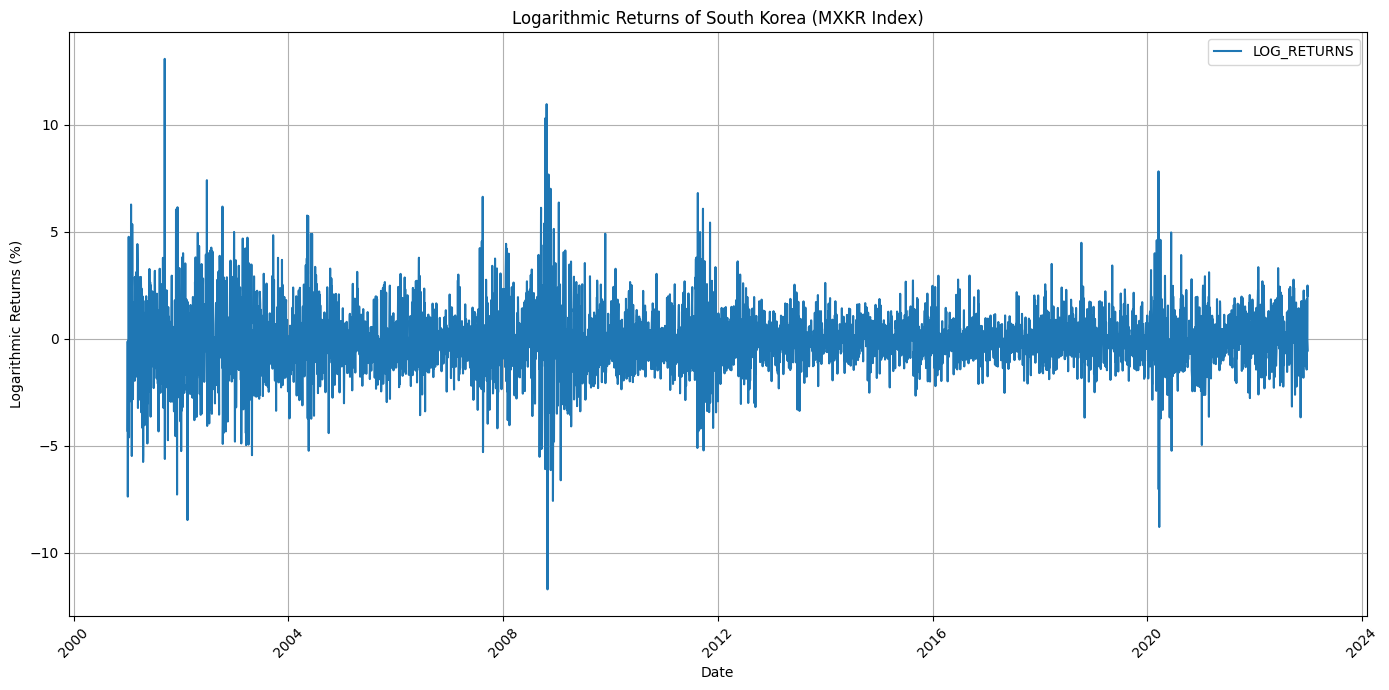

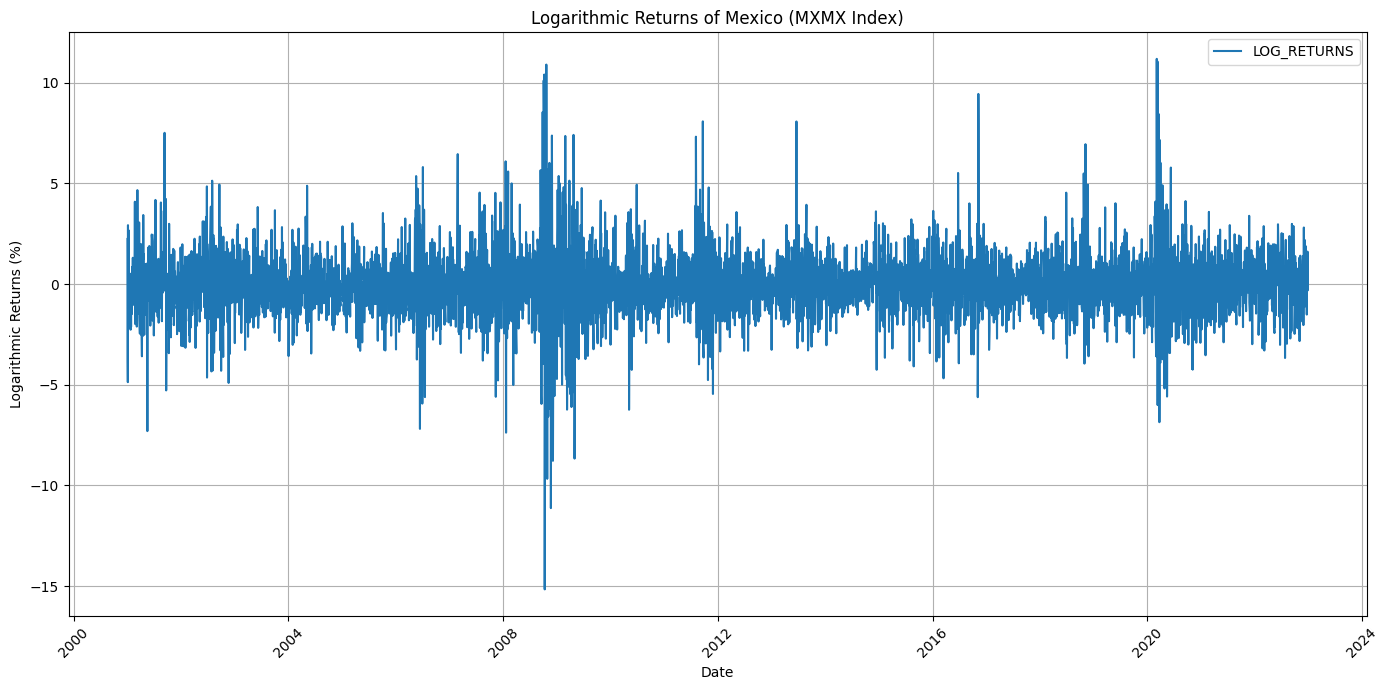

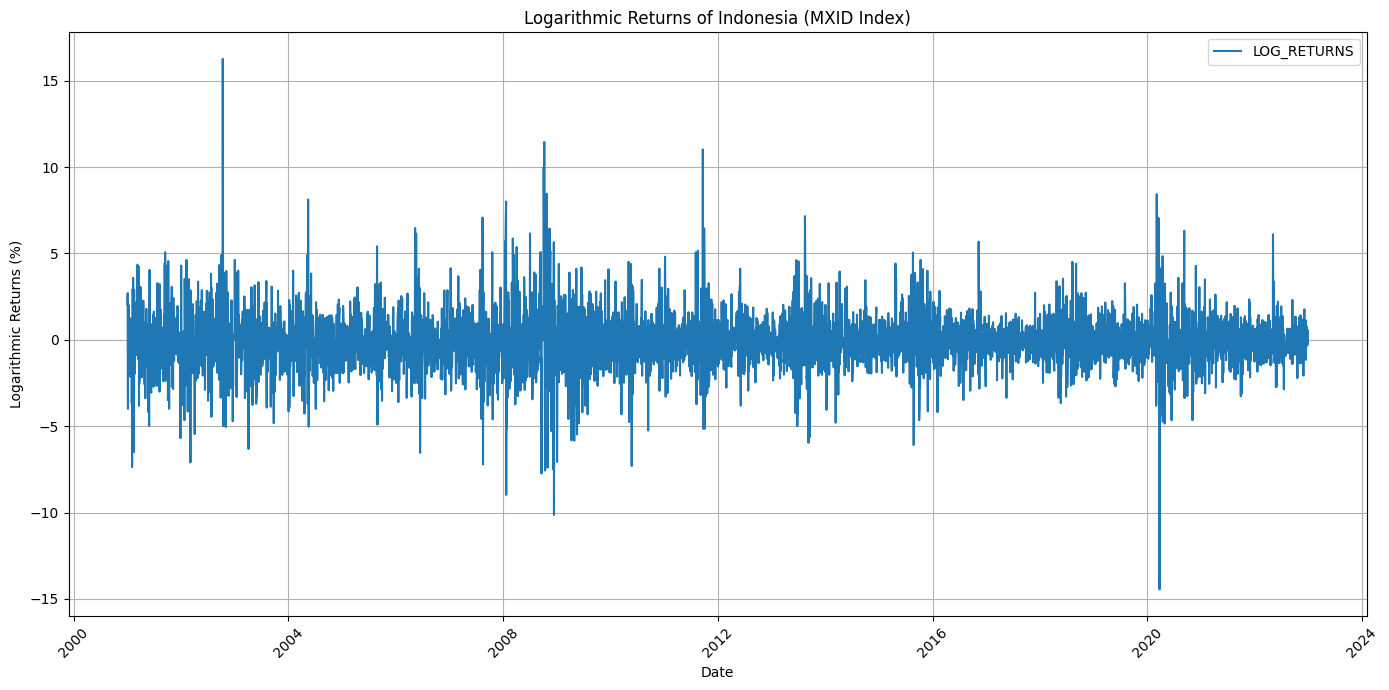

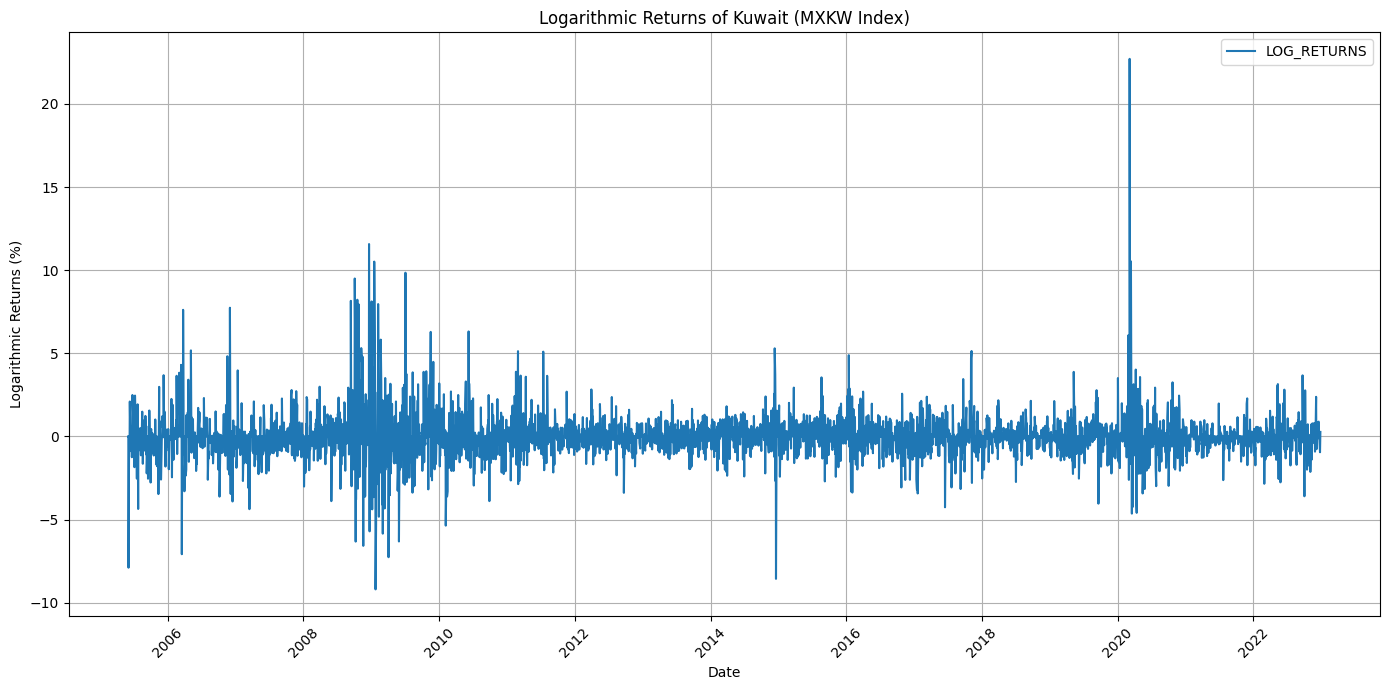

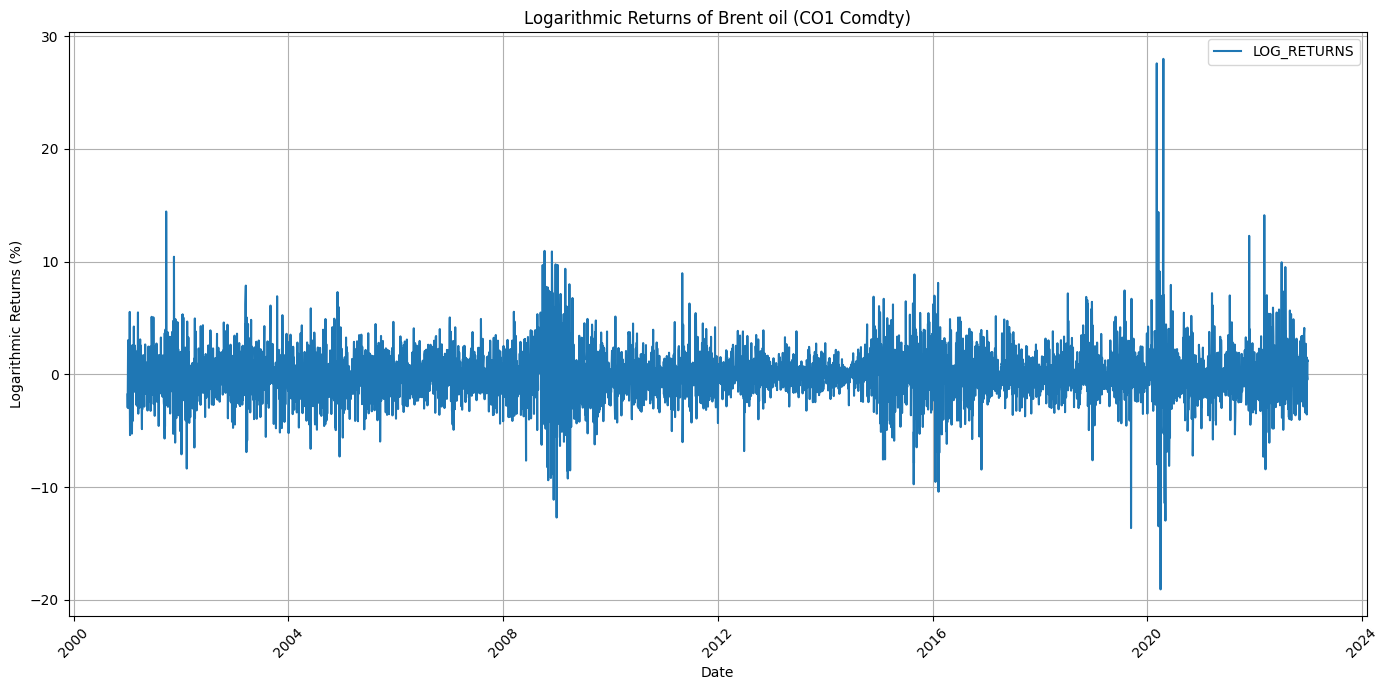

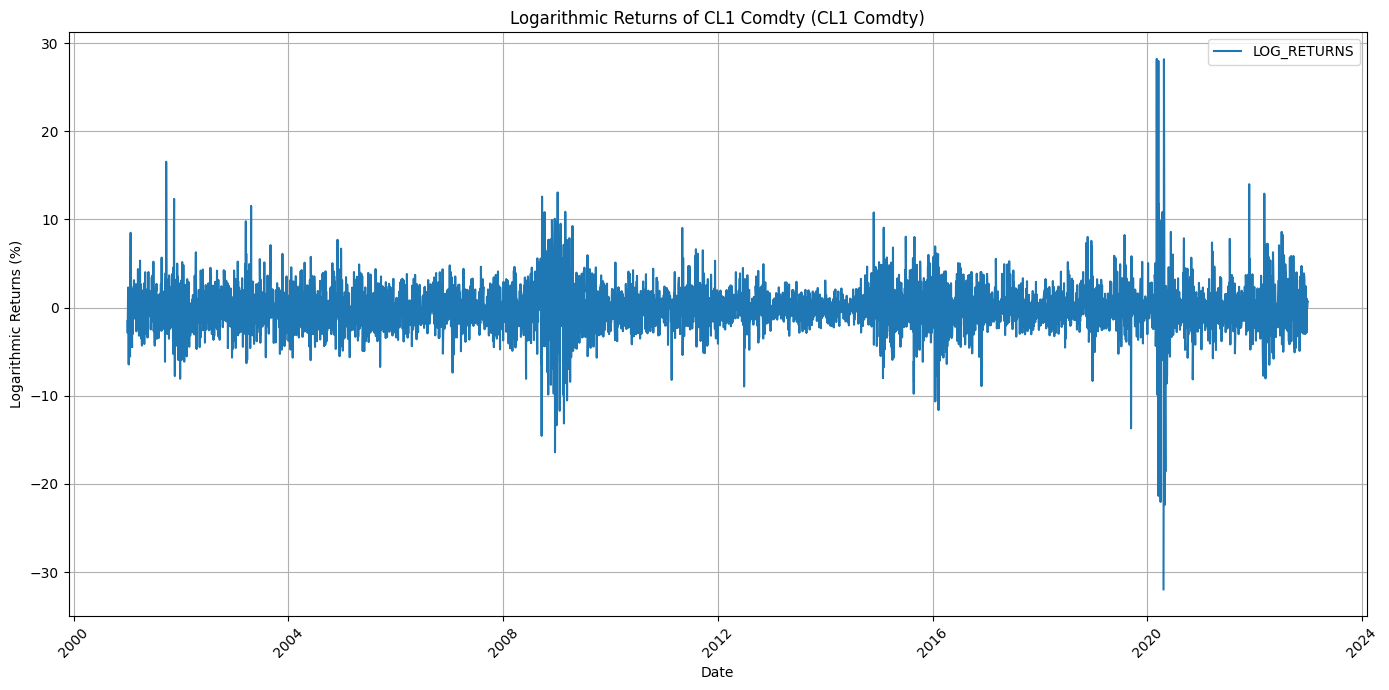

In [ ]:
# Plot the logarithmic returns graphs for all indices and commodities
for sheet_name, data_frame in index_data_frames.items():
    if 'LOG_RETURNS' in data_frame.columns:
        plot_log_returns_graph(data_frame, sheet_name)

# Show the plots for the logarithmic returns
plt.show()


In [ ]:
from scipy.stats import skew, kurtosis, jarque_bera

# Initialize a dictionary to store the descriptive statistics for each index/commodity
descriptive_stats = {}

# Function to calculate descriptive statistics
def calculate_descriptive_statistics(data_frame):
    # Drop NaN values as they will interfere with the statistics calculations
    returns_clean = data_frame['LOG_RETURNS'].dropna()

    stats = {
        'mean': returns_clean.mean(),
        'max': returns_clean.max(),
        'min': returns_clean.min(),
        'median': returns_clean.median(),
        'std': returns_clean.std(),
        'skewness': skew(returns_clean),
        'kurtosis': kurtosis(returns_clean, fisher=False),  # Use Pearson's definition of kurtosis
        'q05': returns_clean.quantile(0.05),
        'q95': returns_clean.quantile(0.95),
        'jarque_bera': jarque_bera(returns_clean)
    }
    return stats

# Calculate and store the descriptive statistics for each index/commodity
for sheet_name, data_frame in index_data_frames.items():
    if 'LOG_RETURNS' in data_frame.columns:
        descriptive_stats[sheet_name] = calculate_descriptive_statistics(data_frame)

# Convert the descriptive statistics dictionary to a DataFrame for easier display and analysis
descriptive_stats_df = pd.DataFrame(descriptive_stats).T

# Show the DataFrame with descriptive statistics
descriptive_stats_df.head()


mean        max        min    median       std  skewness  \
MXIN Index -0.043352  13.739601 -16.421358 -0.037384  1.371325  0.406239   
MXCN Index -0.018074  12.837674 -14.059257       0.0  1.685917  0.032811   
MXBR Index -0.011381  19.433638 -16.618781 -0.058582  2.217166  0.468463   
MXKR Index  -0.02919  13.090607 -11.721968       0.0  1.424196  0.279386   
MXMX Index -0.022546  11.183114 -15.158587 -0.050709  1.586179  0.281667   

             kurtosis       q05       q95                jarque_bera  
MXIN Index    14.5935 -1.958372  2.022346  (32292.832438699297, 0.0)  
MXCN Index   9.490767 -2.486391  2.676454  (10073.625219250529, 0.0)  
MXBR Index  11.343784  -3.13098  3.449637  (16854.551858621748, 0.0)  
MXKR Index   9.455142 -2.117634  2.282904  (10036.979160916595, 0.0)  
MXMX Index   9.778162 -2.340604  2.391079  (11060.192585220986, 0.0)

In [ ]:
# Drop the rows corresponding to the commodities from the DataFrame
indices_stats_df = descriptive_stats_df.drop(['CO1 Comdty', 'CL1 Comdty'], axis=0.0)

# Display the resulting DataFrame with just the indices
indices_stats_df


mean        max        min    median       std  skewness  \
MXIN Index -0.043352  13.739601 -16.421358 -0.037384  1.371325  0.406239   
MXCN Index -0.018074  12.837674 -14.059257       0.0  1.685917  0.032811   
MXBR Index -0.011381  19.433638 -16.618781 -0.058582  2.217166  0.468463   
MXKR Index  -0.02919  13.090607 -11.721968       0.0  1.424196  0.279386   
MXMX Index -0.022546  11.183114 -15.158587 -0.050709  1.586179  0.281667   
MXID Index -0.048548  16.261165 -14.443638       0.0  1.564949  0.304414   
MXKW Index -0.004524  22.711463     -9.199       0.0  1.230749  2.265656   

             kurtosis       q05       q95                jarque_bera  
MXIN Index    14.5935 -1.958372  2.022346  (32292.832438699297, 0.0)  
MXCN Index   9.490767 -2.486391  2.676454  (10073.625219250529, 0.0)  
MXBR Index  11.343784  -3.13098  3.449637  (16854.551858621748, 0.0)  
MXKR Index   9.455142 -2.117634  2.282904  (10036.979160916595, 0.0)  
MXMX Index   9.778162 -2.340604  2.391079  (11060.192585220986, 0.0)  
MXID Index  10.775273 -2.353961  2.392742  (14542.371776422493, 0.0)  
MXKW Index  40.867654 -1.653753  1.714759   (277929.1825517608, 0.0)

In [ ]:
from scipy.stats import pearsonr

# Extract the logarithmic returns for Brent and WTI oil
brent_returns = index_data_frames['CO1 Comdty']['LOG_RETURNS'].dropna()
wti_returns = index_data_frames['CL1 Comdty']['LOG_RETURNS'].dropna()

# Function to align two series based on their dates and calculate the correlation
def calculate_aligned_correlation(index_returns, commodity_returns):
    # Align the series by dates
    common_dates = index_returns.index.intersection(commodity_returns.index)
    aligned_index_returns = index_returns.loc[common_dates]
    aligned_commodity_returns = commodity_returns.loc[common_dates]

    # If there are no common dates, return NaN as correlation cannot be computed
    if len(common_dates) == 0:
        return np.nan

    # Calculate and return the Pearson correlation coefficient
    return pearsonr(aligned_index_returns, aligned_commodity_returns)[0]

# Calculate the Pearson correlation coefficient for Brent and WTI with each index
for index_name in indices_stats_df.index:
    index_returns = index_data_frames[index_name]['LOG_RETURNS'].dropna()

    # Calculate correlation with Brent after aligning
    brent_corr = calculate_aligned_correlation(index_returns, brent_returns)
    indices_stats_df.at[index_name, 'brent_corr'] = brent_corr

    # Calculate correlation with WTI after aligning
    wti_corr = calculate_aligned_correlation(index_returns, wti_returns)
    indices_stats_df.at[index_name, 'wti_corr'] = wti_corr

# Display the updated DataFrame with correlations
indices_stats_df.head()


mean        max        min    median       std  skewness  \
MXIN Index -0.043352  13.739601 -16.421358 -0.037384  1.371325  0.406239   
MXCN Index -0.018074  12.837674 -14.059257       0.0  1.685917  0.032811   
MXBR Index -0.011381  19.433638 -16.618781 -0.058582  2.217166  0.468463   
MXKR Index  -0.02919  13.090607 -11.721968       0.0  1.424196  0.279386   
MXMX Index -0.022546  11.183114 -15.158587 -0.050709  1.586179  0.281667   

             kurtosis       q05       q95                jarque_bera  \
MXIN Index    14.5935 -1.958372  2.022346  (32292.832438699297, 0.0)   
MXCN Index   9.490767 -2.486391  2.676454  (10073.625219250529, 0.0)   
MXBR Index  11.343784  -3.13098  3.449637  (16854.551858621748, 0.0)   
MXKR Index   9.455142 -2.117634  2.282904  (10036.979160916595, 0.0)   
MXMX Index   9.778162 -2.340604  2.391079  (11060.192585220986, 0.0)   

            brent_corr  wti_corr  
MXIN Index    0.155066  0.126145  
MXCN Index    0.157531  0.140097  
MXBR Index    0.305145  0.283366  
MXKR Index    0.132521  0.107797  
MXMX Index    0.272822  0.250332

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox


for index_name in indices_stats_df.index:
    # Make sure to have defined index_data_frames with your data previously
    index_returns = index_data_frames[index_name]['LOG_RETURNS'].dropna()

    # Perform the Ljung-Box test
    lb_results = acorr_ljungbox(index_returns, lags=[20], return_df=False)

    # Extract the test statistic and p-value from the DataFrame
    lb_test_stat = lb_results['lb_stat'].iloc[0]
    lb_p_value = lb_results['lb_pvalue'].iloc[0]

    # Store the results in the indices_stats_df DataFrame
    indices_stats_df.at[index_name, 'ljung_box_stat'] = lb_test_stat
    indices_stats_df.at[index_name, 'ljung_box_p_value'] = lb_p_value

# Now, indices_stats_df will have the Ljung-Box test results for each index
# Combine the 'ljung_box_stat' and 'ljung_box_p_value' into a single column as a tuple
indices_stats_df['ljung_box'] = list(zip(indices_stats_df.ljung_box_stat, indices_stats_df.ljung_box_p_value))

# Drop the now redundant 'ljung_box_stat' and 'ljung_box_p_value' columns
indices_stats_df.drop(['ljung_box_stat', 'ljung_box_p_value'], axis=1, inplace=True)

# Display the updated DataFrame
indices_stats_df.head()



mean        max        min    median       std  skewness  \
MXIN Index -0.043352  13.739601 -16.421358 -0.037384  1.371325  0.406239   
MXCN Index -0.018074  12.837674 -14.059257       0.0  1.685917  0.032811   
MXBR Index -0.011381  19.433638 -16.618781 -0.058582  2.217166  0.468463   
MXKR Index  -0.02919  13.090607 -11.721968       0.0  1.424196  0.279386   
MXMX Index -0.022546  11.183114 -15.158587 -0.050709  1.586179  0.281667   

             kurtosis       q05       q95                jarque_bera  \
MXIN Index    14.5935 -1.958372  2.022346  (32292.832438699297, 0.0)   
MXCN Index   9.490767 -2.486391  2.676454  (10073.625219250529, 0.0)   
MXBR Index  11.343784  -3.13098  3.449637  (16854.551858621748, 0.0)   
MXKR Index   9.455142 -2.117634  2.282904  (10036.979160916595, 0.0)   
MXMX Index   9.778162 -2.340604  2.391079  (11060.192585220986, 0.0)   

            brent_corr  wti_corr                                    ljung_box  
MXIN Index    0.155066  0.126145  (102.53870667357401, 4.412906055112424e-13)  
MXCN Index    0.157531  0.140097   (80.25228858689364, 3.557121849241367e-09)  
MXBR Index    0.305145  0.283366   (68.44552102932323, 3.260555415619032e-07)  
MXKR Index    0.132521  0.107797    (31.230140651633583, 0.05222460466567824)  
MXMX Index    0.272822  0.250332   (96.37611084851379, 5.575413400709498e-12)

In [ ]:
from statsmodels.stats.diagnostic import het_arch

# Function to perform Engle's ARCH test
def perform_arch_test(returns_series):
    test_stat, p_value, _, _ = het_arch(returns_series)
    return test_stat, p_value

# Calculate Engle's ARCH test statistics and p-values for each index
for index_name in indices_stats_df.index:
    index_returns = index_data_frames[index_name]['LOG_RETURNS'].dropna()
    arch_stat, arch_p_value = perform_arch_test(index_returns)
    indices_stats_df.at[index_name, 'arch_stat'] = arch_stat
    indices_stats_df.at[index_name, 'arch_p_value'] = arch_p_value

# Display the updated DataFrame with the ARCH test results
indices_stats_df.head()

# Combine the 'arch_stat' and 'arch_p_value' into a single column as a tuple, similar to 'jarque_bera'
indices_stats_df['arch'] = list(zip(indices_stats_df.arch_stat, indices_stats_df.arch_p_value))

# Drop the now redundant 'arch_stat' and 'arch_p_value' columns
indices_stats_df.drop(['arch_stat', 'arch_p_value'], axis=1, inplace=True)

In [ ]:
# Modified function to handle p-values that might be strings
def round_p_values(stats_tuple):
    stat, p_value = stats_tuple
    # Ensure p_value is a float before rounding
    p_value = float(p_value) if isinstance(p_value, str) else p_value
    return (stat, round(p_value, 3))

# Apply the modified rounding function to each relevant column
indices_stats_df['jarque_bera'] = indices_stats_df['jarque_bera'].apply(round_p_values)
indices_stats_df['arch'] = indices_stats_df['arch'].apply(round_p_values)
indices_stats_df['ljung_box'] = indices_stats_df['ljung_box'].apply(round_p_values)

# Display the updated DataFrame with rounded p-values
indices_stats_df.head()


mean        max        min    median       std  skewness  \
MXIN Index -0.043352  13.739601 -16.421358 -0.037384  1.371325  0.406239   
MXCN Index -0.018074  12.837674 -14.059257       0.0  1.685917  0.032811   
MXBR Index -0.011381  19.433638 -16.618781 -0.058582  2.217166  0.468463   
MXKR Index  -0.02919  13.090607 -11.721968       0.0  1.424196  0.279386   
MXMX Index -0.022546  11.183114 -15.158587 -0.050709  1.586179  0.281667   

             kurtosis       q05       q95                jarque_bera  \
MXIN Index    14.5935 -1.958372  2.022346  (32292.832438699297, 0.0)   
MXCN Index   9.490767 -2.486391  2.676454  (10073.625219250529, 0.0)   
MXBR Index  11.343784  -3.13098  3.449637  (16854.551858621748, 0.0)   
MXKR Index   9.455142 -2.117634  2.282904  (10036.979160916595, 0.0)   
MXMX Index   9.778162 -2.340604  2.391079  (11060.192585220986, 0.0)   

            brent_corr  wti_corr                    ljung_box  \
MXIN Index    0.155066  0.126145    (102.53870667357401, 0.0)   
MXCN Index    0.157531  0.140097     (80.25228858689364, 0.0)   
MXBR Index    0.305145  0.283366     (68.44552102932323, 0.0)   
MXKR Index    0.132521  0.107797  (31.230140651633583, 0.052)   
MXMX Index    0.272822  0.250332     (96.37611084851379, 0.0)   

                                 arch  
MXIN Index   (684.4374237140067, 0.0)  
MXCN Index  (1118.5683839252147, 0.0)  
MXBR Index  (1470.3725793569363, 0.0)  
MXKR Index   (813.6557424618001, 0.0)  
MXMX Index  (1341.1080276692132, 0.0)

In [ ]:
# Rename the rows using the provided index_to_country dictionary
indices_stats_df.rename(index=index_to_country, inplace=True)

# Display the updated DataFrame with renamed rows
indices_stats_df.T

India                      China  \
mean                         -0.043352                  -0.018074   
max                          13.739601                  12.837674   
min                         -16.421358                 -14.059257   
median                       -0.037384                        0.0   
std                           1.371325                   1.685917   
skewness                      0.406239                   0.032811   
kurtosis                       14.5935                   9.490767   
q05                          -1.958372                  -2.486391   
q95                           2.022346                   2.676454   
jarque_bera  (32292.832438699297, 0.0)  (10073.625219250529, 0.0)   
brent_corr                    0.155066                   0.157531   
wti_corr                      0.126145                   0.140097   
ljung_box    (102.53870667357401, 0.0)   (80.25228858689364, 0.0)   
arch          (684.4374237140067, 0.0)  (1118.5683839252147, 0.0)   

                                Brazil                  South Korea  \
mean                         -0.011381                     -0.02919   
max                          19.433638                    13.090607   
min                         -16.618781                   -11.721968   
median                       -0.058582                          0.0   
std                           2.217166                     1.424196   
skewness                      0.468463                     0.279386   
kurtosis                     11.343784                     9.455142   
q05                           -3.13098                    -2.117634   
q95                           3.449637                     2.282904   
jarque_bera  (16854.551858621748, 0.0)    (10036.979160916595, 0.0)   
brent_corr                    0.305145                     0.132521   
wti_corr                      0.283366                     0.107797   
ljung_box     (68.44552102932323, 0.0)  (31.230140651633583, 0.052)   
arch         (1470.3725793569363, 0.0)     (813.6557424618001, 0.0)   

                                Mexico                  Indonesia  \
mean                         -0.022546                  -0.048548   
max                          11.183114                  16.261165   
min                         -15.158587                 -14.443638   
median                       -0.050709                        0.0   
std                           1.586179                   1.564949   
skewness                      0.281667                   0.304414   
kurtosis                      9.778162                  10.775273   
q05                          -2.340604                  -2.353961   
q95                           2.391079                   2.392742   
jarque_bera  (11060.192585220986, 0.0)  (14542.371776422493, 0.0)   
brent_corr                    0.272822                   0.121421   
wti_corr                      0.250332                   0.099049   
ljung_box     (96.37611084851379, 0.0)   (74.05872809103774, 0.0)   
arch         (1341.1080276692132, 0.0)   (468.8834420147517, 0.0)   

                                Kuwait  
mean                         -0.004524  
max                          22.711463  
min                             -9.199  
median                             0.0  
std                           1.230749  
skewness                      2.265656  
kurtosis                     40.867654  
q05                          -1.653753  
q95                           1.714759  
jarque_bera   (277929.1825517608, 0.0)  
brent_corr                    0.086258  
wti_corr                       0.05429  
ljung_box    (138.27086081030123, 0.0)  
arch         (400.76853640040605, 0.0)

In [ ]:
# Let's first read the uploaded file to access the data needed for plotting
file_path = 'FRAM Group 6.xlsx'
data_sheets = pd.read_excel(file_path, sheet_name=None)  # Read all sheets into a dictionary

# Confirm the names of the sheets to ensure we have the correct ones for the plot
data_sheets.keys()


dict_keys(['Sheet1', 'MXIN Index', 'MXCN Index', 'MXBR Index', 'MXKR Index', 'MXMX Index', 'MXID Index', 'MXKW Index', 'MXSAD Index', 'MXSA Index', 'CO1 Comdty', 'CL1 Comdty'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


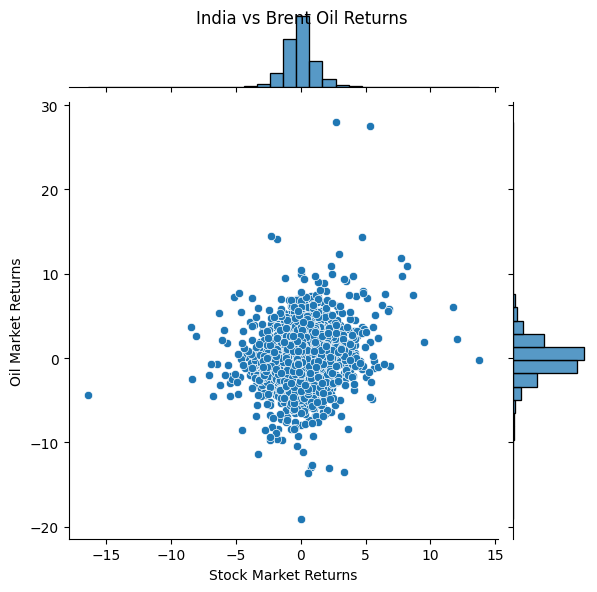

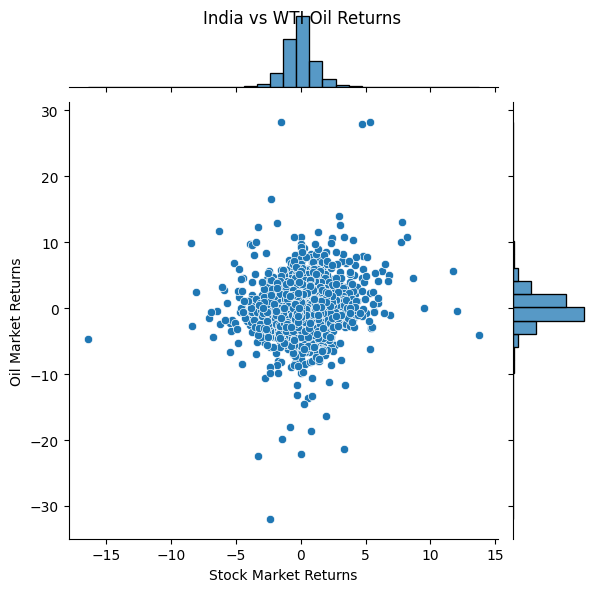

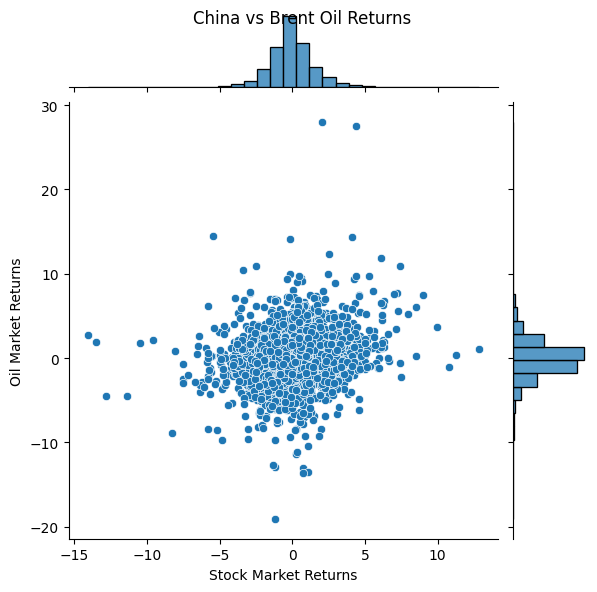

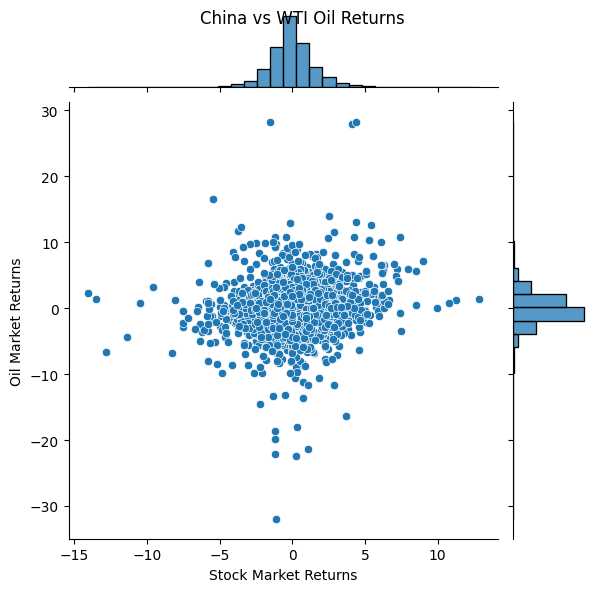

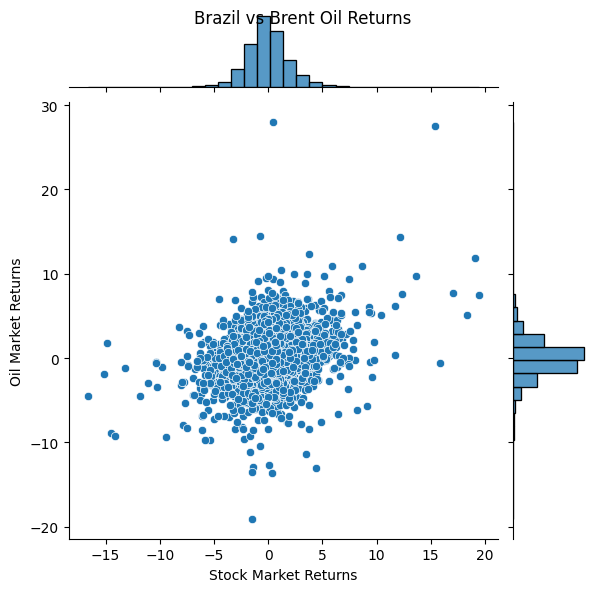

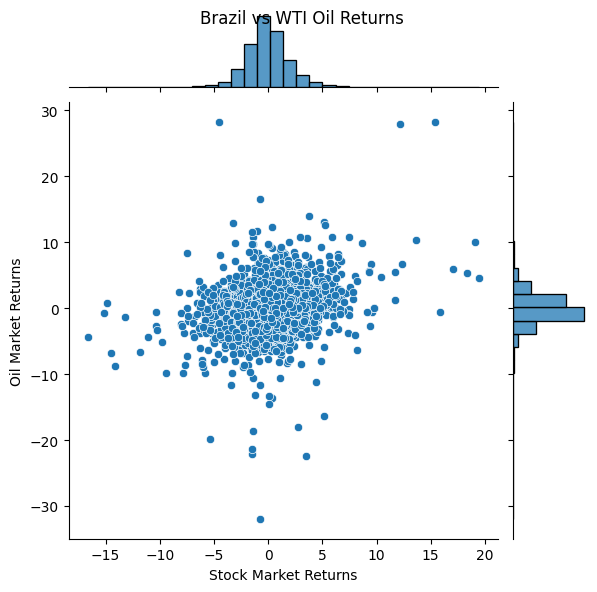

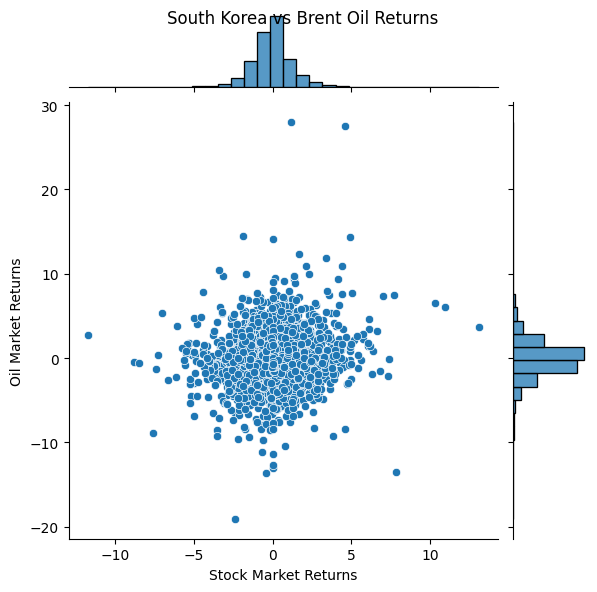

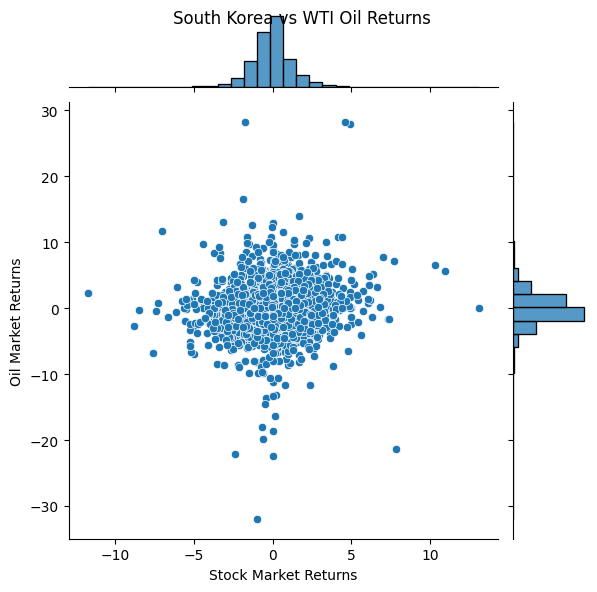

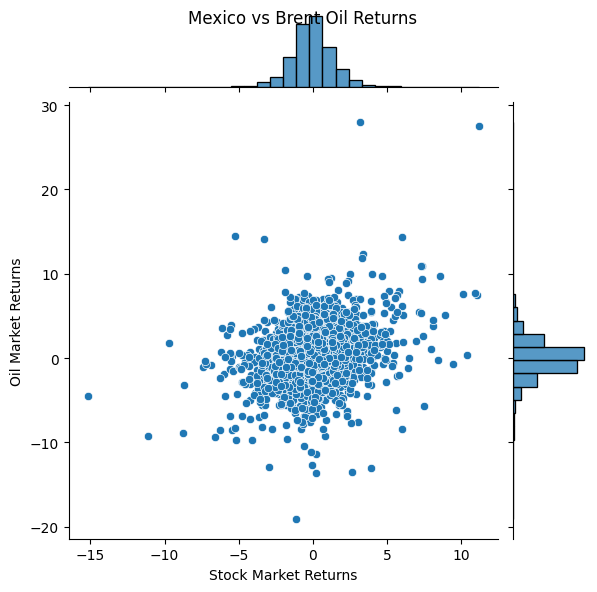

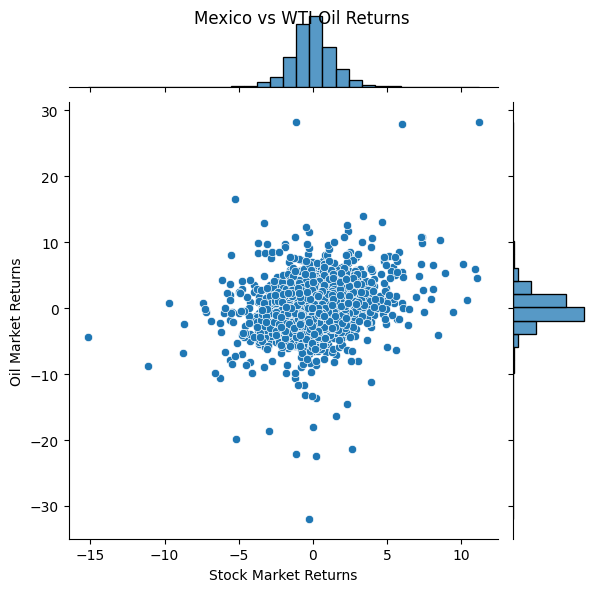

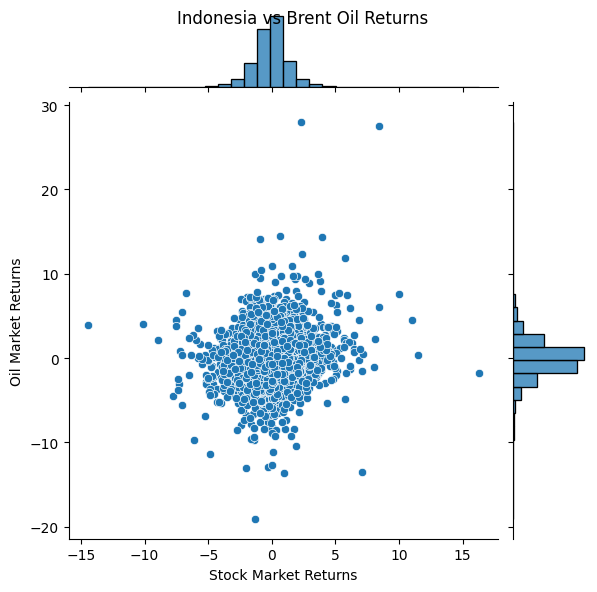

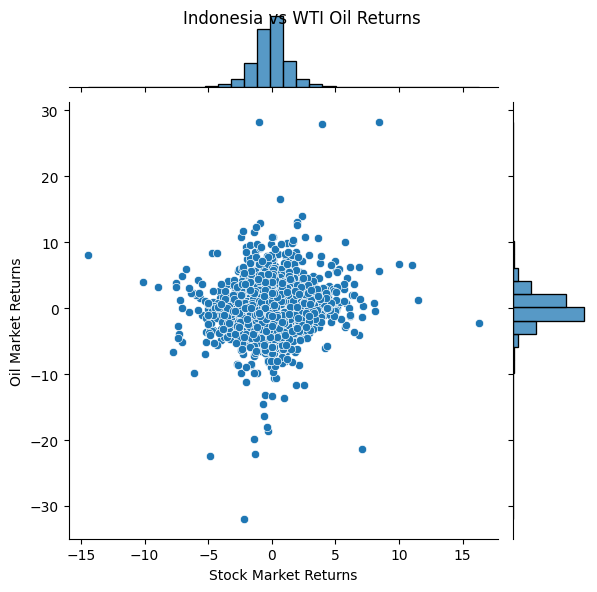

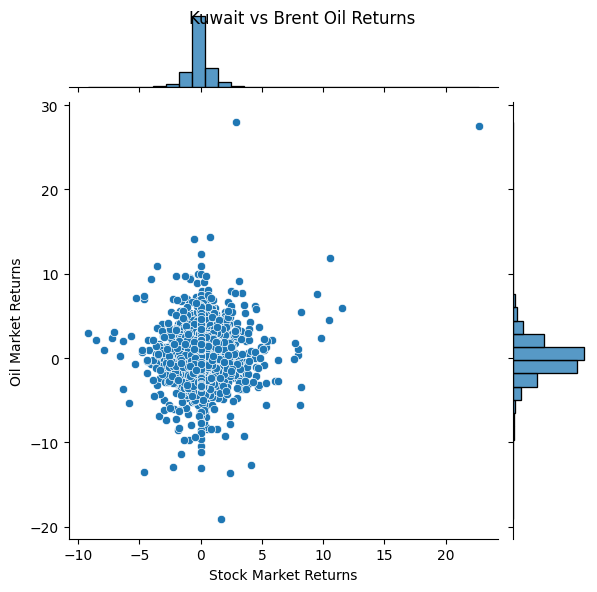

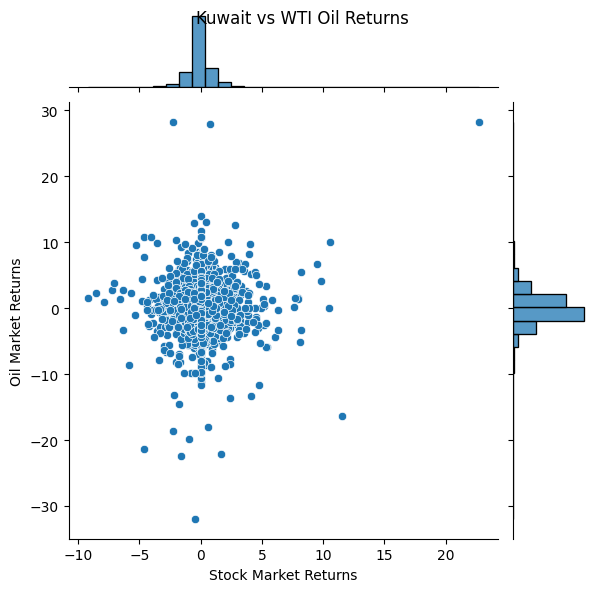

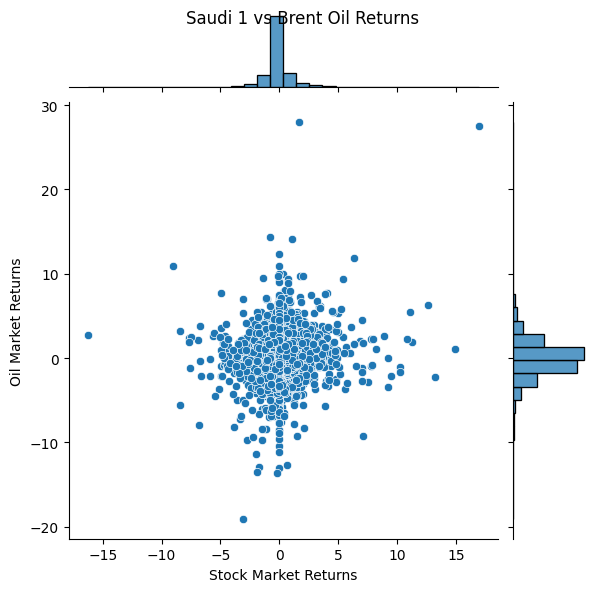

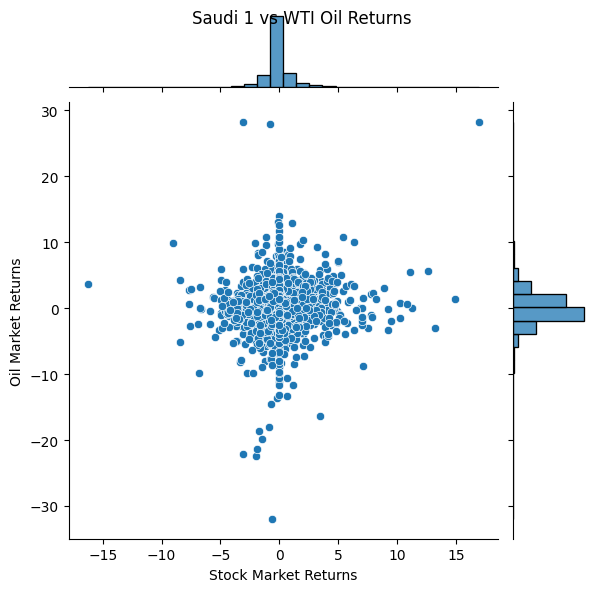

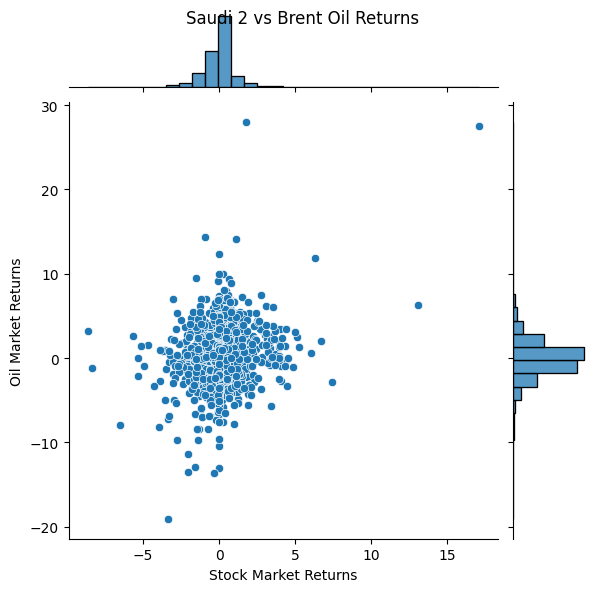

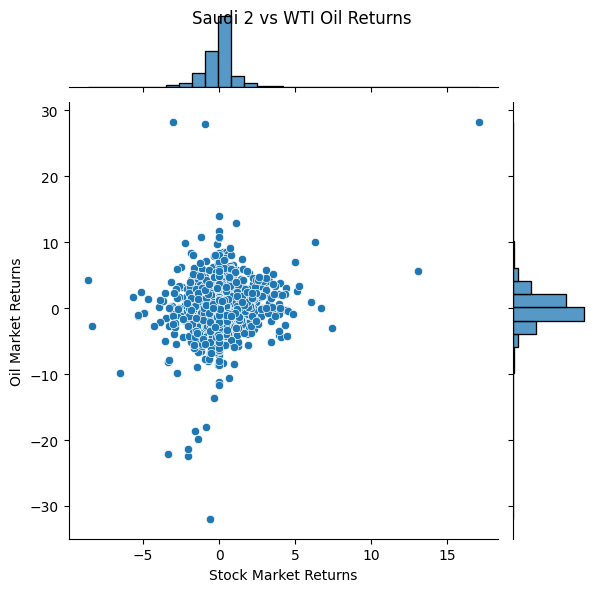

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Since we are interested in plotting the returns of the oil market against the stock markets, we'll first extract and preprocess the returns data
# Preprocess data: Ensure that 'Dates' are datetime and set as index, calculate log returns for each sheet
for sheet_name, data_frame in data_sheets.items():
    if 'Dates' in data_frame.columns:
        # Convert 'Dates' to datetime and set as index
        data_frame['Dates'] = pd.to_datetime(data_frame['Dates'])
        data_frame.set_index('Dates', inplace=True)
        # Calculate log returns
        data_frame['LOG_RETURNS'] = 100 * np.log(data_frame['PX_LAST']).diff()

# Create a function for plotting the scatter plot with marginal histograms
def create_scatter_plot_with_marginals(stock_market_df, oil_market_df, stock_market_name, oil_market_name):
    # Align the stock market and oil market data on the index (which is the 'Dates')
    merged_df = pd.merge(
        stock_market_df[['LOG_RETURNS']].rename(columns={'LOG_RETURNS': 'Stock Market Returns'}),
        oil_market_df[['LOG_RETURNS']].rename(columns={'LOG_RETURNS': 'Oil Market Returns'}),
        left_index=True,
        right_index=True,
        how='inner'
    )

    # Generate the scatter plot with marginal histograms
    g = sns.jointplot(
        x='Stock Market Returns',
        y='Oil Market Returns',
        data=merged_df,
        kind='scatter',
        marginal_kws=dict(bins=30, fill=True)
    )
    g.fig.suptitle(f'{stock_market_name} vs {oil_market_name} Returns')
    plt.show()

# Get the country name and corresponding index sheet name from the mapping
index_to_country_map = data_sheets['Sheet1'].set_index('Index')['Country'].to_dict()

# Get the oil market data (we'll use Brent as an example)
brent_oil_data = data_sheets['CO1 Comdty']

# Since we have confirmed the process with one country, let's create the scatter plots for all countries against Brent and WTI oil returns

# We'll also need to handle WTI oil data
wti_oil_data = data_sheets['CL1 Comdty']

# Create a loop to generate plots for all countries
for index_name, country_name in index_to_country_map.items():
    # Make sure to skip the oil commodities themselves
    if 'Comdty' in index_name:
        continue

    # Create scatter plot with marginal histograms for the country against Brent Oil
    create_scatter_plot_with_marginals(data_sheets[index_name], brent_oil_data, country_name, 'Brent Oil')
    # Create scatter plot with marginal histograms for the country against WTI Oil
    create_scatter_plot_with_marginals(data_sheets[index_name], wti_oil_data, country_name, 'WTI Oil')


<ipython-input-29-c89f196d876d>:36: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=merged_df['Oil Market Returns'], ax=g.ax_marg_y, color=hist_color_oil, vertical=True, legend=False)


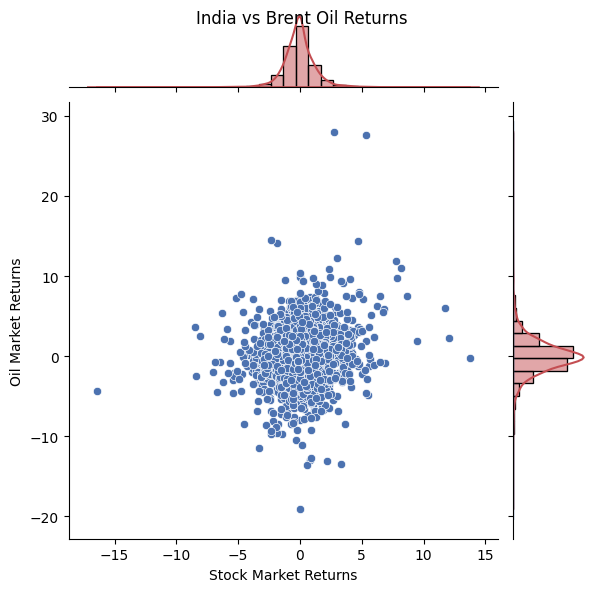

<ipython-input-29-c89f196d876d>:36: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=merged_df['Oil Market Returns'], ax=g.ax_marg_y, color=hist_color_oil, vertical=True, legend=False)


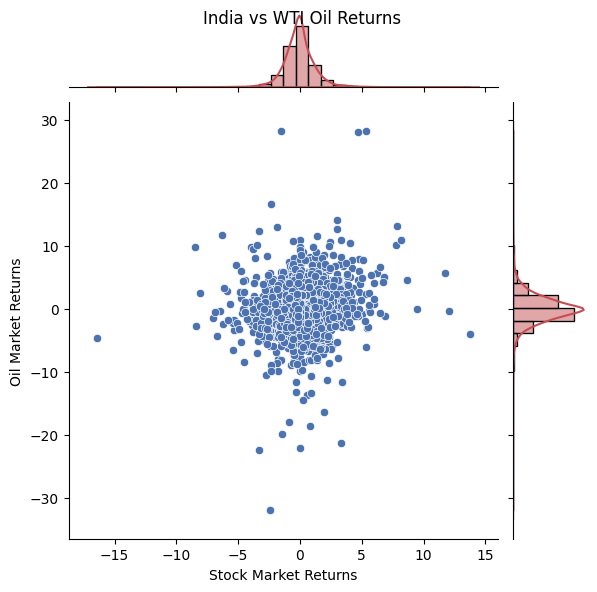

<ipython-input-29-c89f196d876d>:36: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=merged_df['Oil Market Returns'], ax=g.ax_marg_y, color=hist_color_oil, vertical=True, legend=False)


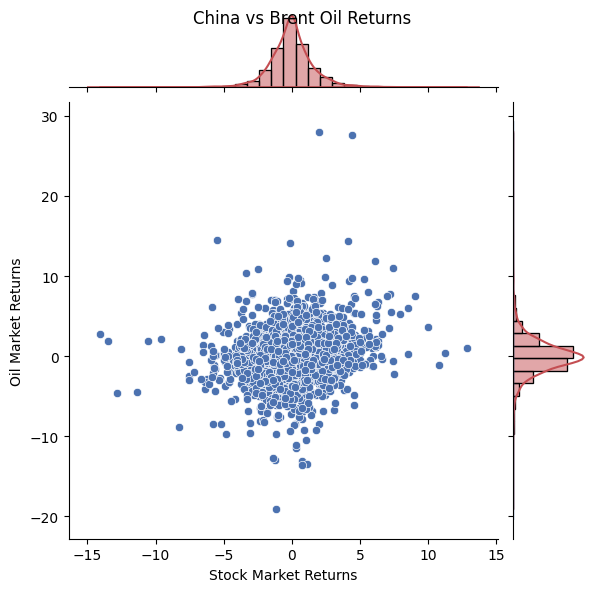

<ipython-input-29-c89f196d876d>:36: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=merged_df['Oil Market Returns'], ax=g.ax_marg_y, color=hist_color_oil, vertical=True, legend=False)


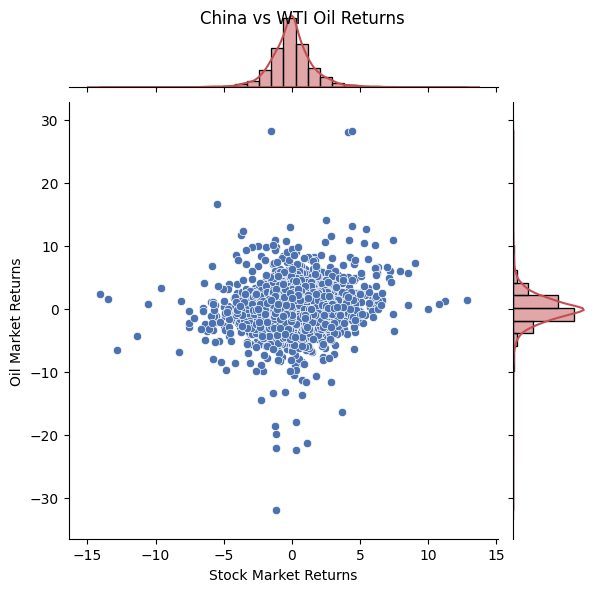

<ipython-input-29-c89f196d876d>:36: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=merged_df['Oil Market Returns'], ax=g.ax_marg_y, color=hist_color_oil, vertical=True, legend=False)


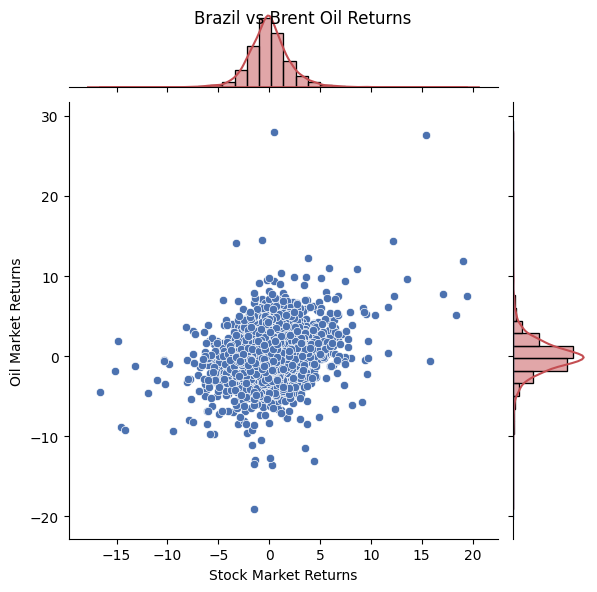

<ipython-input-29-c89f196d876d>:36: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=merged_df['Oil Market Returns'], ax=g.ax_marg_y, color=hist_color_oil, vertical=True, legend=False)


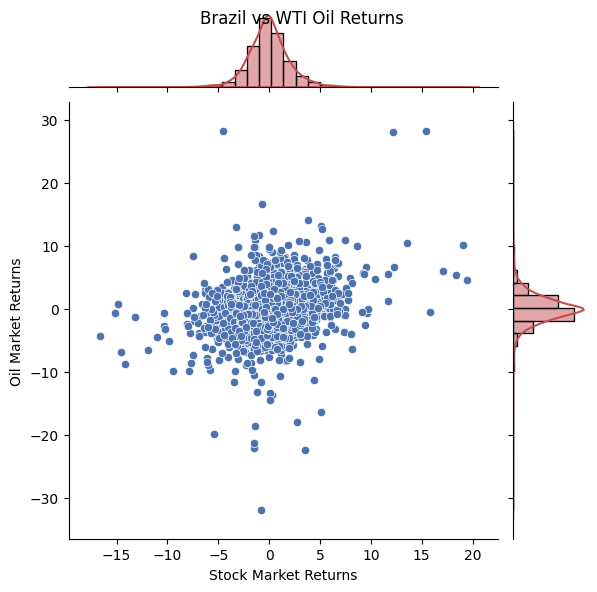

<ipython-input-29-c89f196d876d>:36: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=merged_df['Oil Market Returns'], ax=g.ax_marg_y, color=hist_color_oil, vertical=True, legend=False)


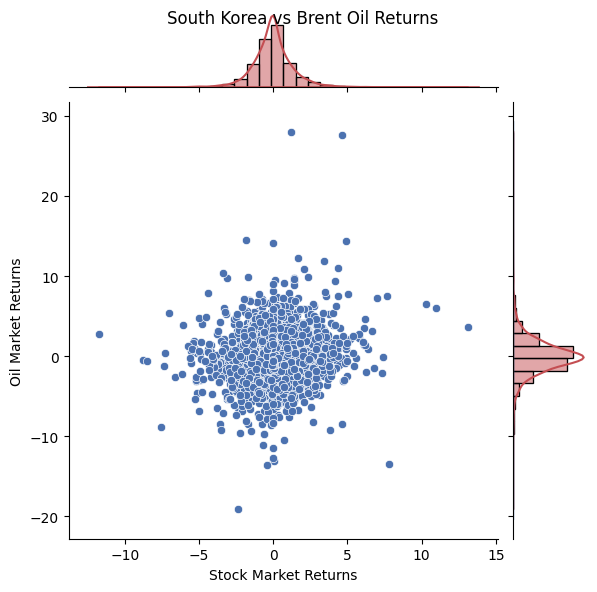

<ipython-input-29-c89f196d876d>:36: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=merged_df['Oil Market Returns'], ax=g.ax_marg_y, color=hist_color_oil, vertical=True, legend=False)


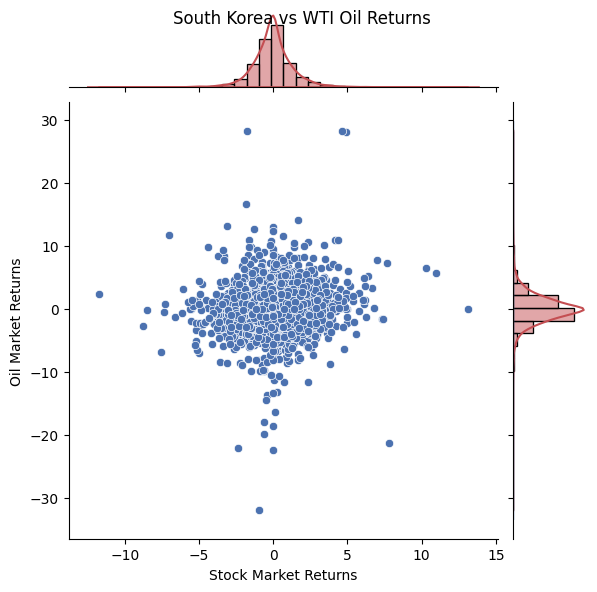

<ipython-input-29-c89f196d876d>:36: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=merged_df['Oil Market Returns'], ax=g.ax_marg_y, color=hist_color_oil, vertical=True, legend=False)


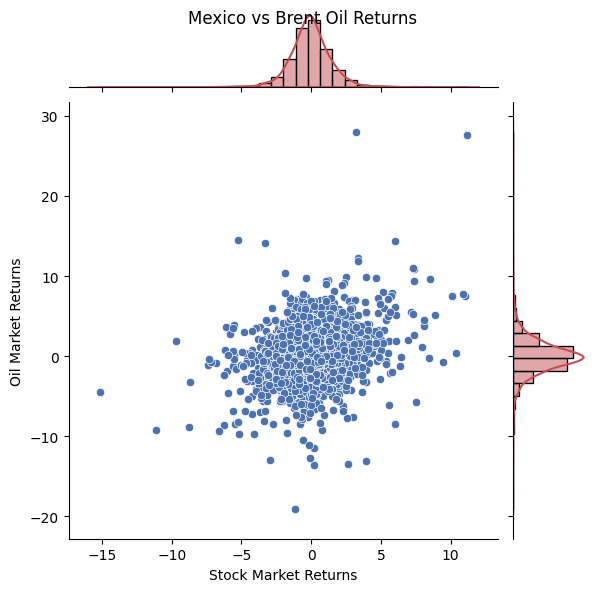

<ipython-input-29-c89f196d876d>:36: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=merged_df['Oil Market Returns'], ax=g.ax_marg_y, color=hist_color_oil, vertical=True, legend=False)


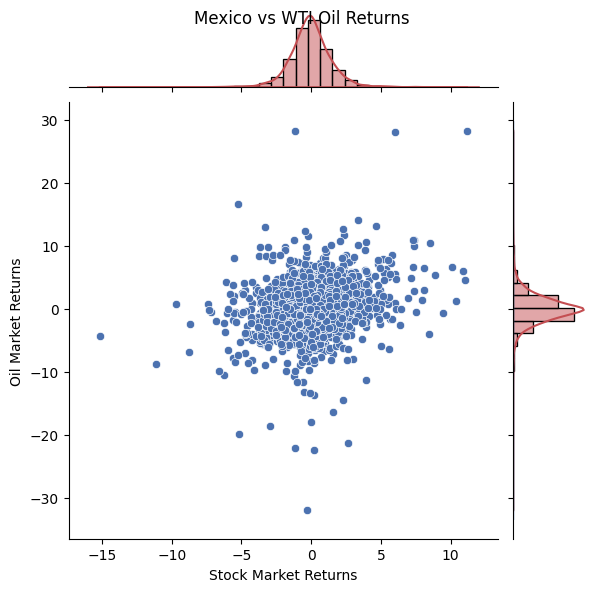

<ipython-input-29-c89f196d876d>:36: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=merged_df['Oil Market Returns'], ax=g.ax_marg_y, color=hist_color_oil, vertical=True, legend=False)


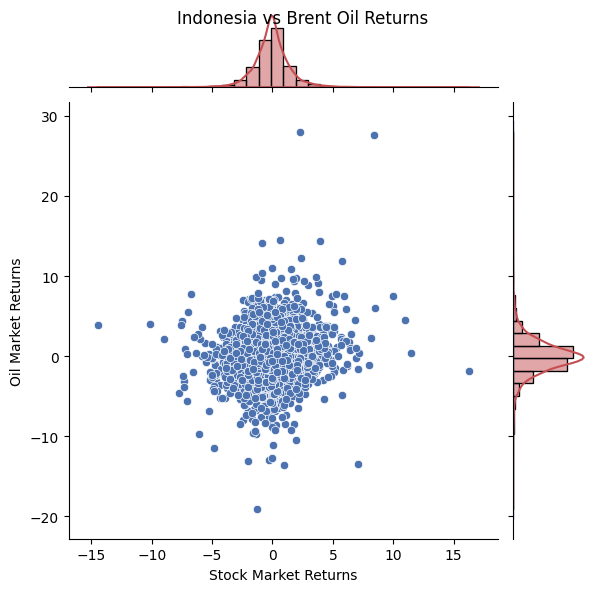

<ipython-input-29-c89f196d876d>:36: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=merged_df['Oil Market Returns'], ax=g.ax_marg_y, color=hist_color_oil, vertical=True, legend=False)


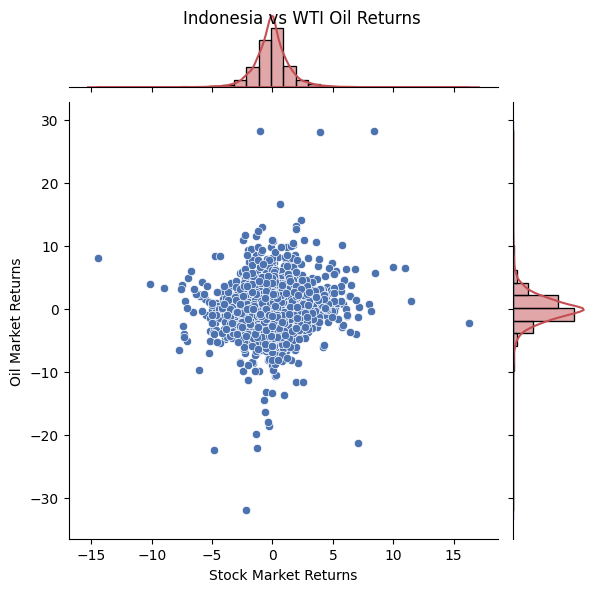

<ipython-input-29-c89f196d876d>:36: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=merged_df['Oil Market Returns'], ax=g.ax_marg_y, color=hist_color_oil, vertical=True, legend=False)


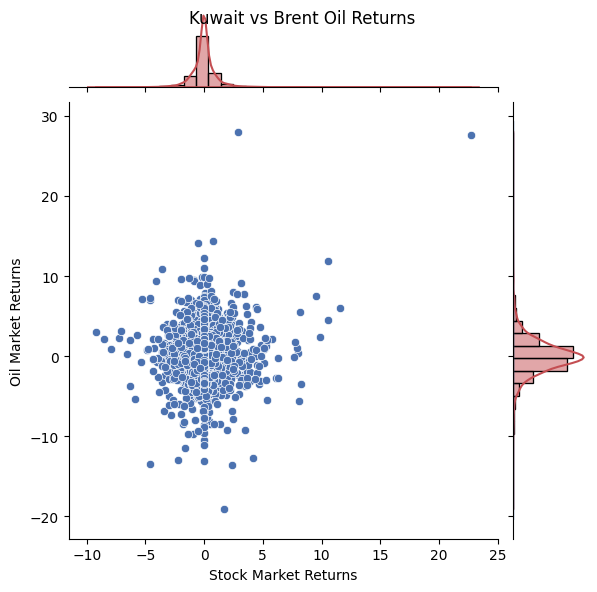

<ipython-input-29-c89f196d876d>:36: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=merged_df['Oil Market Returns'], ax=g.ax_marg_y, color=hist_color_oil, vertical=True, legend=False)


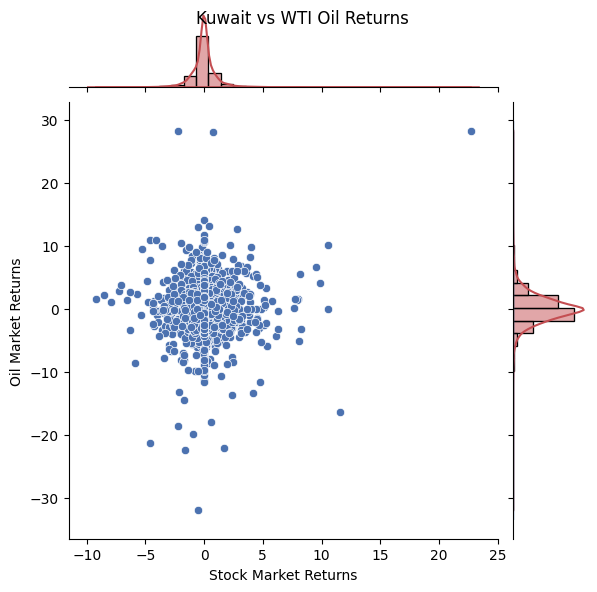

<ipython-input-29-c89f196d876d>:36: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=merged_df['Oil Market Returns'], ax=g.ax_marg_y, color=hist_color_oil, vertical=True, legend=False)


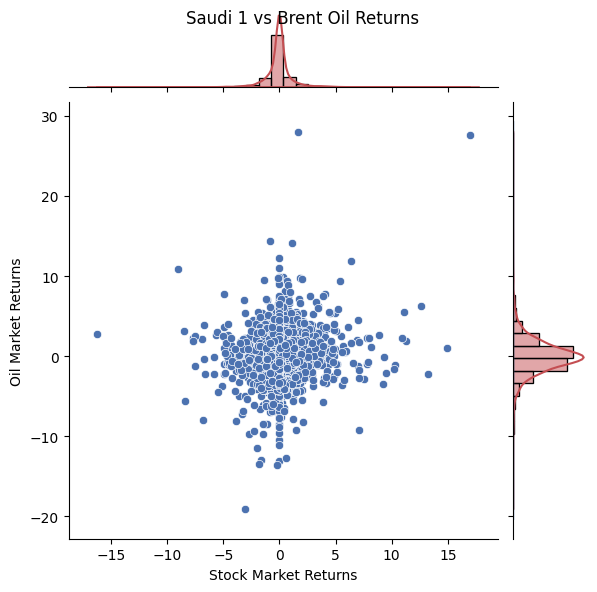

<ipython-input-29-c89f196d876d>:36: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=merged_df['Oil Market Returns'], ax=g.ax_marg_y, color=hist_color_oil, vertical=True, legend=False)


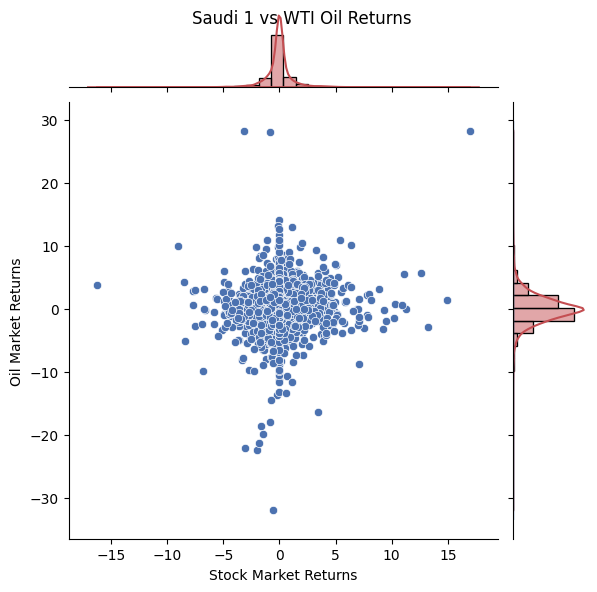

<ipython-input-29-c89f196d876d>:36: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=merged_df['Oil Market Returns'], ax=g.ax_marg_y, color=hist_color_oil, vertical=True, legend=False)


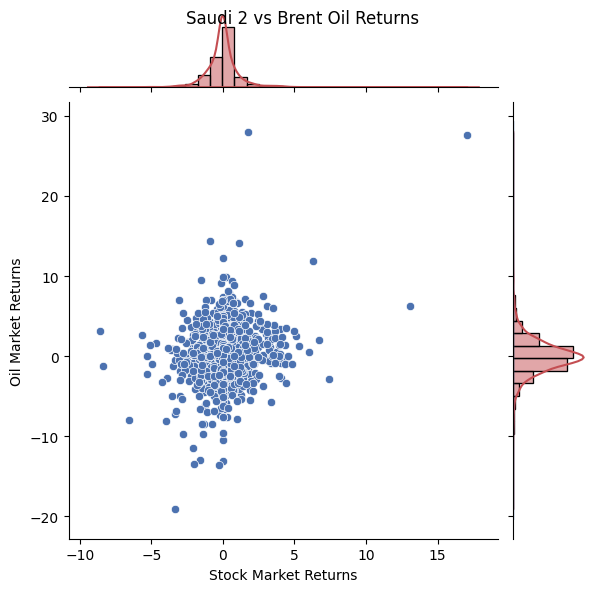

<ipython-input-29-c89f196d876d>:36: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=merged_df['Oil Market Returns'], ax=g.ax_marg_y, color=hist_color_oil, vertical=True, legend=False)


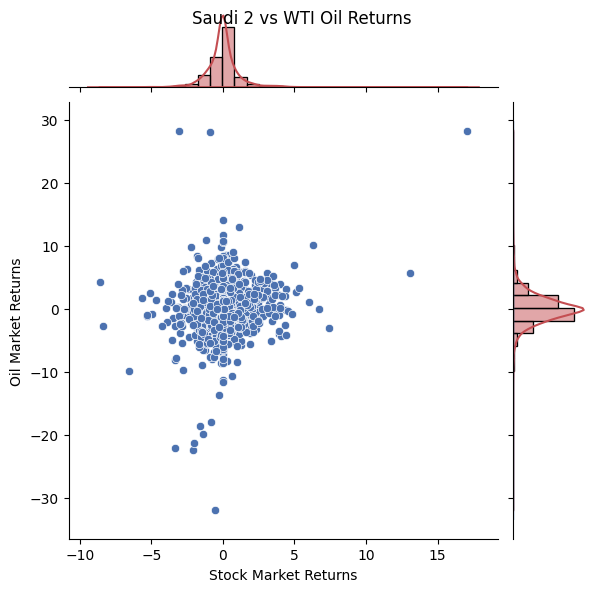

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Update the function for plotting with the specified colors and KDE
def create_scatter_plot_with_marginals_updated(stock_market_df, oil_market_df, stock_market_name, oil_market_name):
    # Align the stock market and oil market data on the index (which is the 'Dates')
    merged_df = pd.merge(
        stock_market_df[['LOG_RETURNS']].rename(columns={'LOG_RETURNS': 'Stock Market Returns'}),
        oil_market_df[['LOG_RETURNS']].rename(columns={'LOG_RETURNS': 'Oil Market Returns'}),
        left_index=True,
        right_index=True,
        how='inner'
    )

    # Define the color palette
    scatter_color = "#4c72b0"  # Specific blue color for scatter points
    hist_color_stock = "#c44e52"  # Red color for stock market histogram
    hist_color_oil = "#4c72b0"    # Blue color for oil market histogram

    # Generate the scatter plot with marginal histograms
    g = sns.jointplot(
        x='Stock Market Returns',
        y='Oil Market Returns',
        data=merged_df,
        kind='scatter',
        color=scatter_color,
        marginal_kws=dict(bins=30, fill=True, kde=True, color=hist_color_stock)
    )

    # Set the colors for the histograms
    g.ax_marg_x.hist(merged_df['Stock Market Returns'], color=hist_color_stock, alpha=0.6, bins=30, density=True)
    g.ax_marg_y.hist(merged_df['Oil Market Returns'], color=hist_color_oil, alpha=0.6, bins=30, density=True, orientation="horizontal")

    # Set KDE plot
    sns.kdeplot(data=merged_df['Stock Market Returns'], ax=g.ax_marg_x, color=hist_color_stock, legend=False)
    sns.kdeplot(data=merged_df['Oil Market Returns'], ax=g.ax_marg_y, color=hist_color_oil, vertical=True, legend=False)

    g.fig.suptitle(f'{stock_market_name} vs {oil_market_name} Returns')
    plt.show()

# Now we will create the plots again with the updated settings
for index_name, country_name in index_to_country_map.items():
    # Skip the oil commodities themselves
    if 'Comdty' in index_name:
        continue

    # Create scatter plot with marginal histograms for the country against Brent Oil
    create_scatter_plot_with_marginals_updated(data_sheets[index_name], brent_oil_data, country_name, 'Brent Oil')
    # Create scatter plot with marginal histograms for the country against WTI Oil
    create_scatter_plot_with_marginals_updated(data_sheets[index_name], wti_oil_data, country_name, 'WTI Oil')


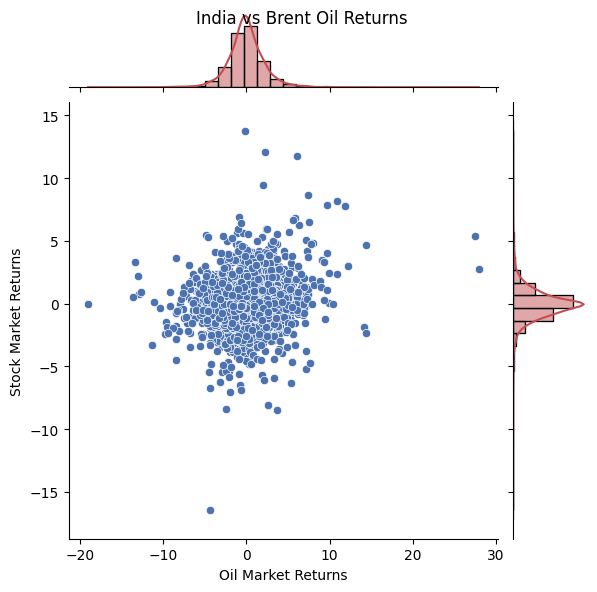

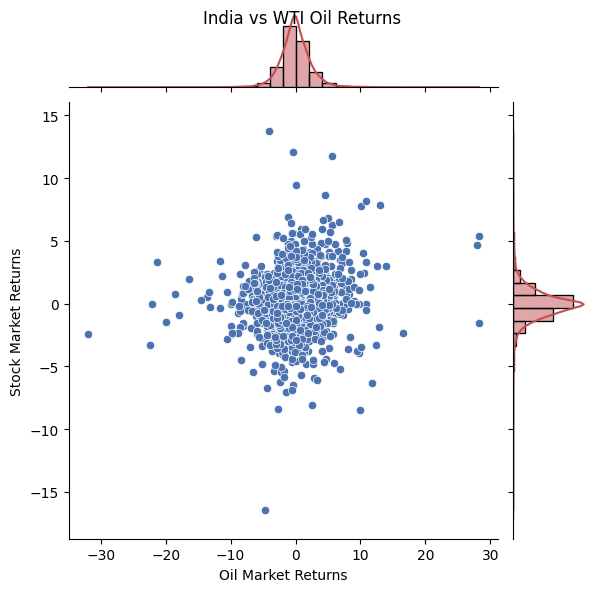

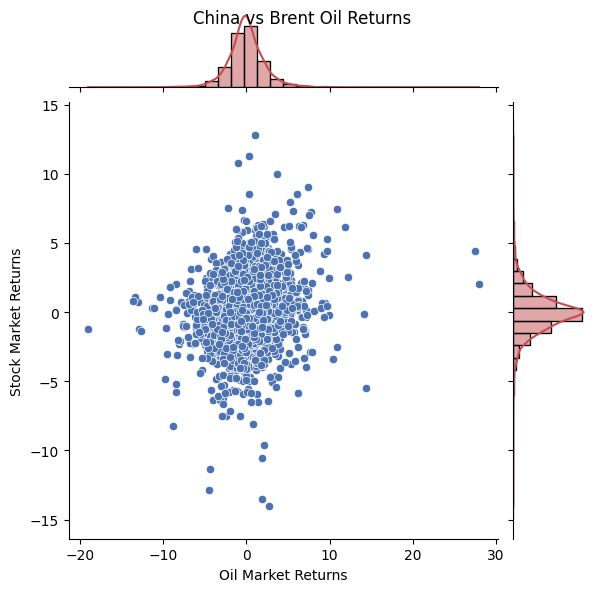

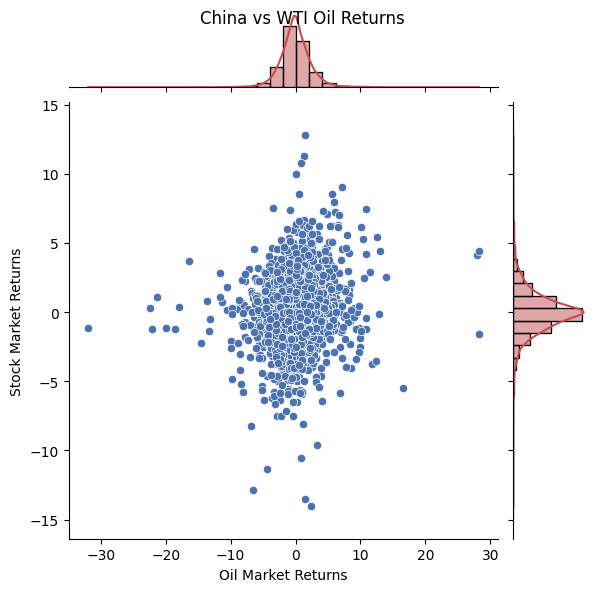

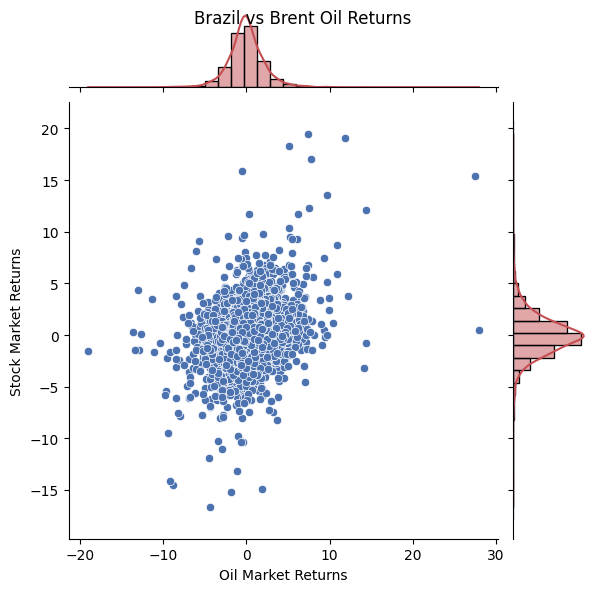

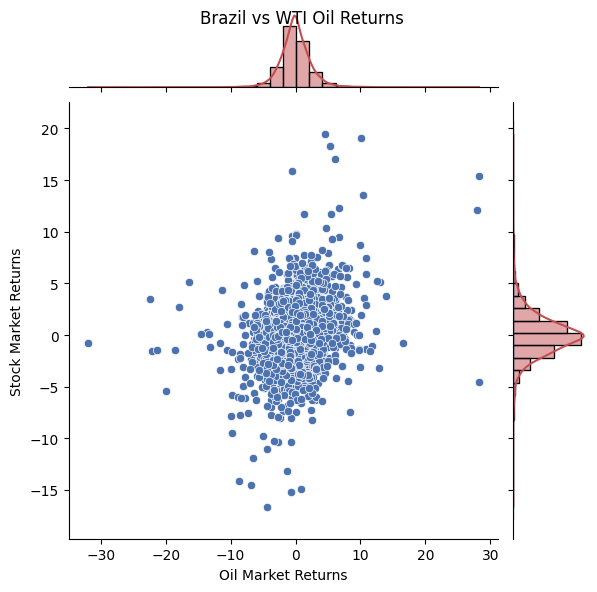

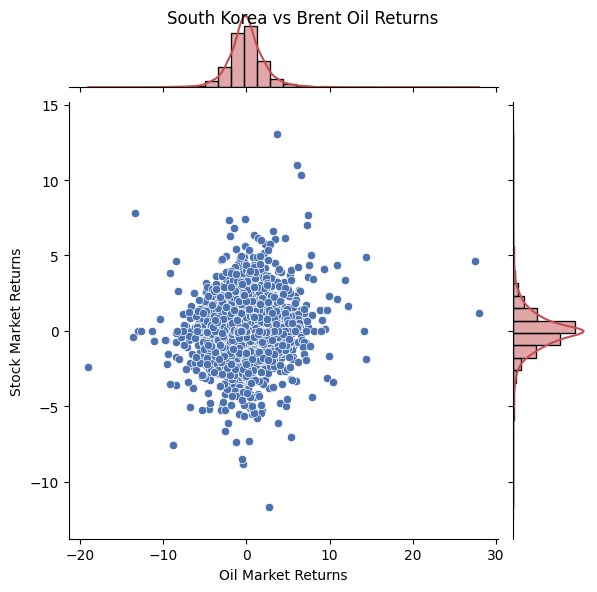

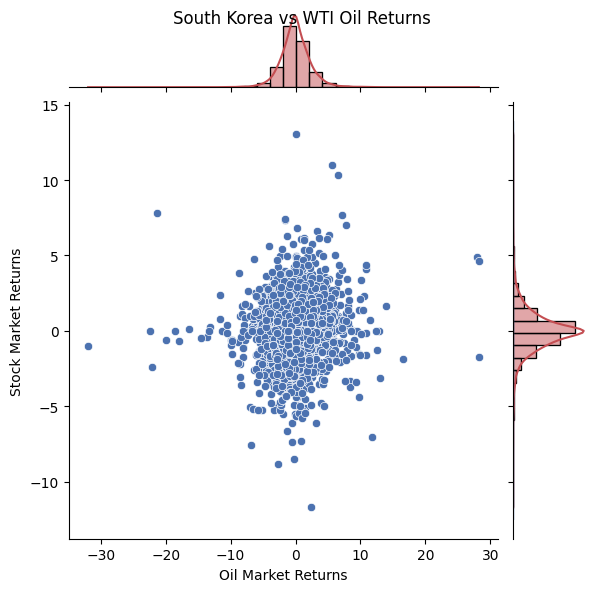

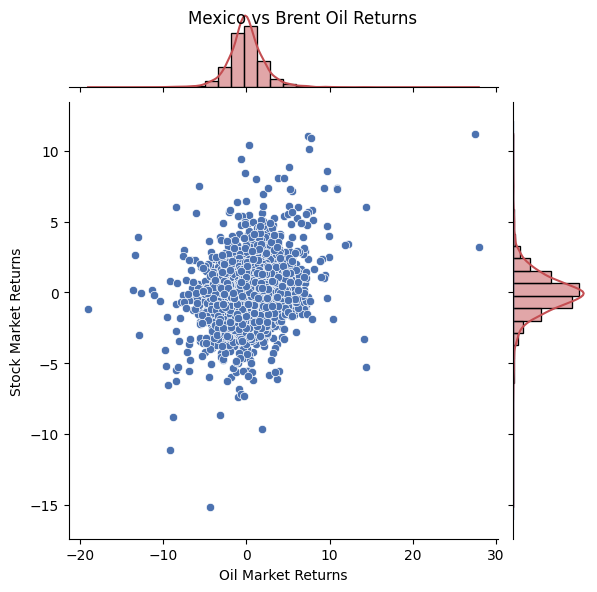

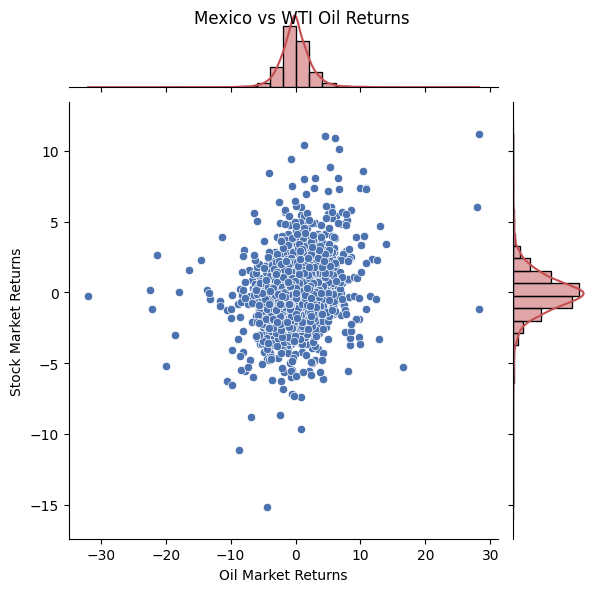

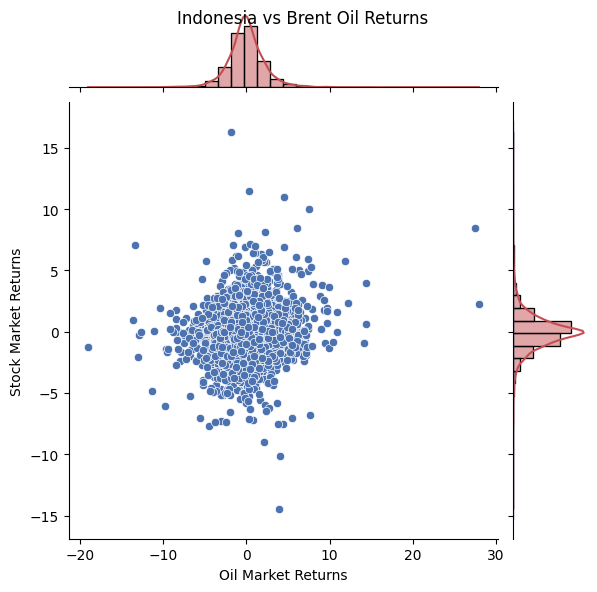

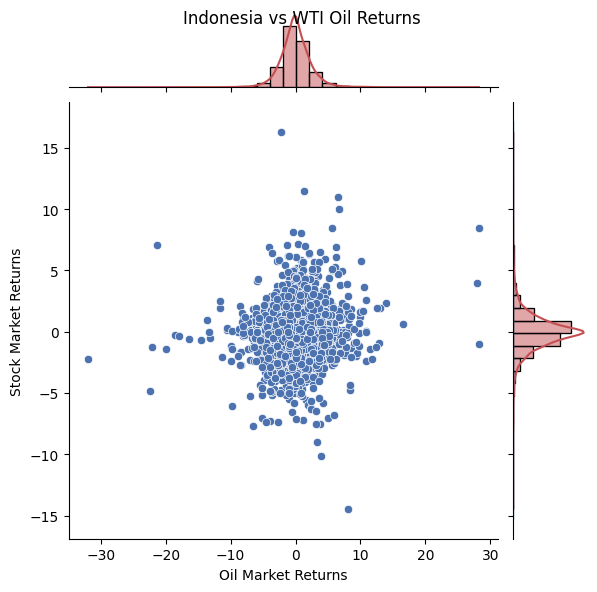

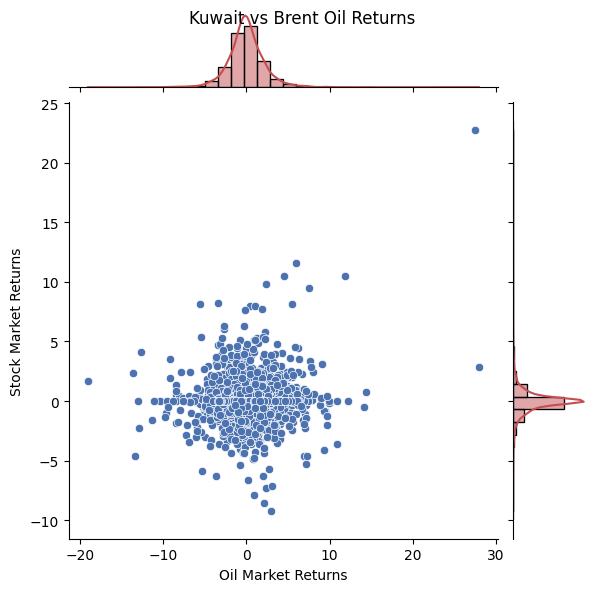

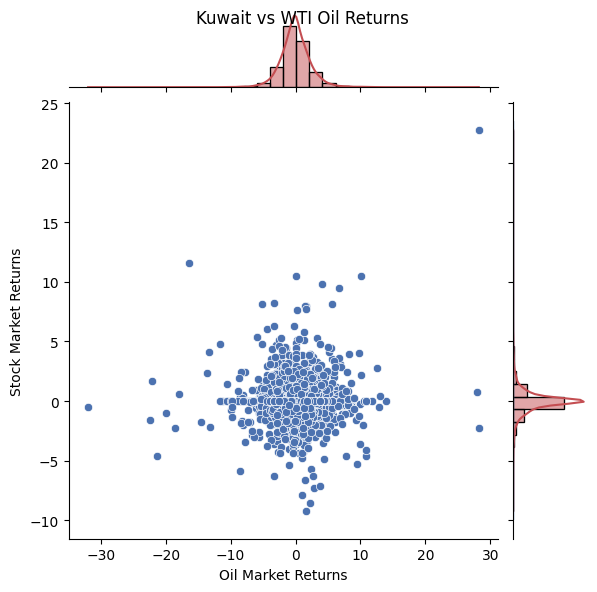

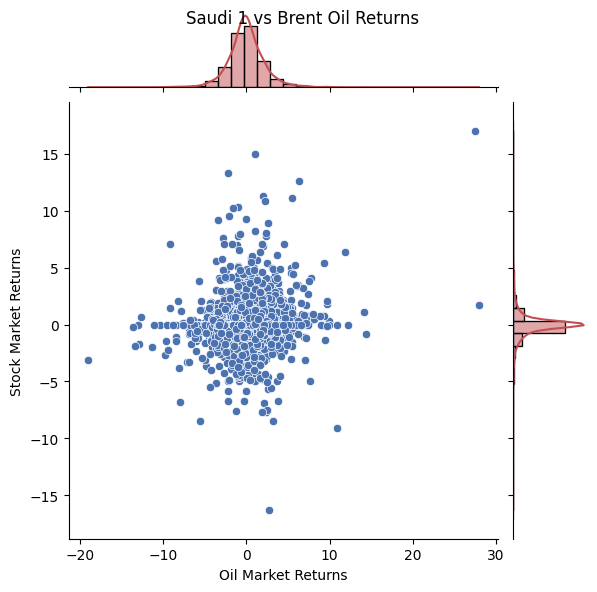

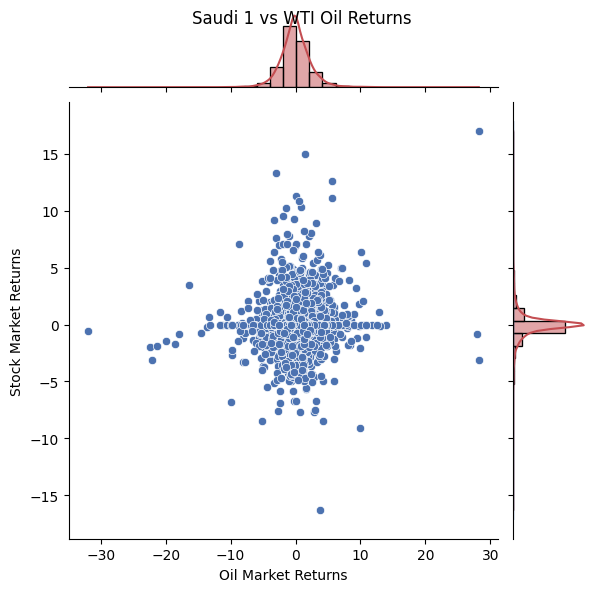

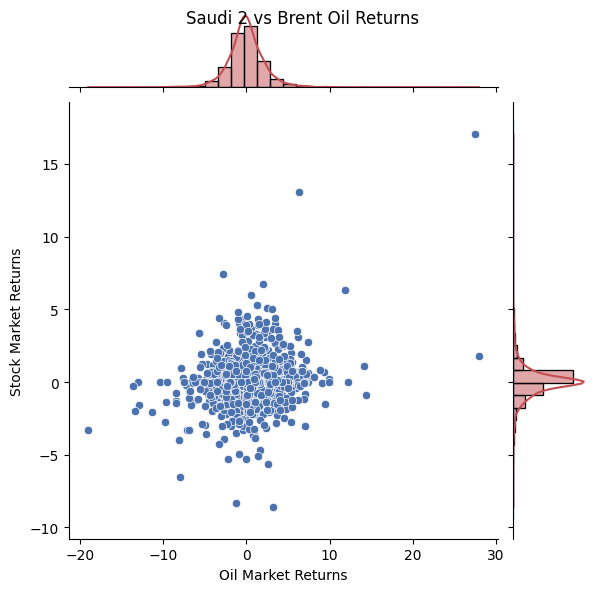

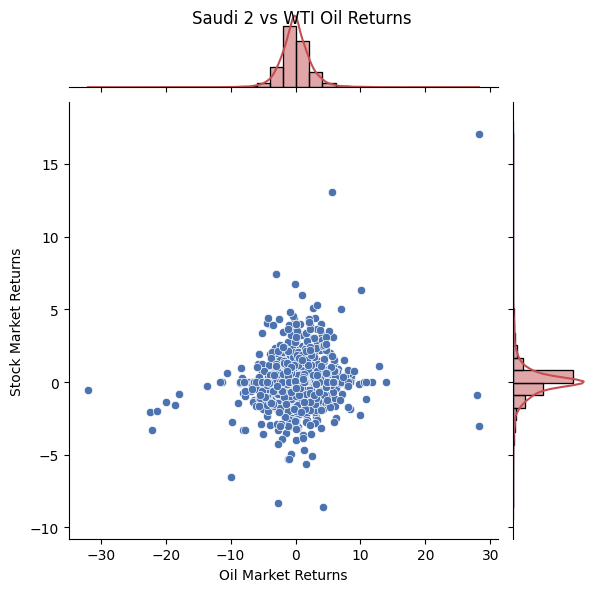

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Update the function to fix the deprecation warning by assigning data to `y` instead of using `vertical=True`
def create_scatter_plot_with_marginals_fixed(stock_market_df, oil_market_df, stock_market_name, oil_market_name):
    # Align the stock market and oil market data on the index (which is the 'Dates')
    merged_df = pd.merge(
        stock_market_df[['LOG_RETURNS']].rename(columns={'LOG_RETURNS': 'Stock Market Returns'}),
        oil_market_df[['LOG_RETURNS']].rename(columns={'LOG_RETURNS': 'Oil Market Returns'}),
        left_index=True,
        right_index=True,
        how='inner'
    )

    # Define the color palette
    scatter_color = "#4c72b0"  # Specific blue color for scatter points
    hist_color_stock = "#c44e52"  # Red color for stock market histogram
    hist_color_oil = "#4c72b0"    # Blue color for oil market histogram

    # Generate the scatter plot with marginal histograms
    g = sns.jointplot(
        y='Stock Market Returns',
        x='Oil Market Returns',
        data=merged_df,
        kind='scatter',
        color=scatter_color,
        marginal_kws=dict(bins=30, fill=True, kde=True, color=hist_color_stock)
    )

    # Set the colors for the histograms
    g.ax_marg_x.hist(merged_df['Oil Market Returns'], color=hist_color_stock, alpha=0.6, bins=30, density=True)
    sns.kdeplot(y=merged_df['Stock Market Returns'], ax=g.ax_marg_y, color=hist_color_oil, legend=False)

    g.fig.suptitle(f'{stock_market_name} vs {oil_market_name} Returns')
    plt.show()

# Now we will create the plots again with the updated settings
for index_name, country_name in index_to_country_map.items():
    # Skip the oil commodities themselves
    if 'Comdty' in index_name:
        continue

    # Create scatter plot with marginal histograms for the country against Brent Oil
    create_scatter_plot_with_marginals_fixed(data_sheets[index_name], brent_oil_data, country_name, 'Brent Oil')
    # Create scatter plot with marginal histograms for the country against WTI Oil
    create_scatter_plot_with_marginals_fixed(data_sheets[index_name], wti_oil_data, country_name, 'WTI Oil')


In [ ]:
!pip install pandas arch scipy statsmodels matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 12.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from arch import arch_model
from scipy.stats import t
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.regression.quantile_regression import QuantReg


In [ ]:

df = pd.read_csv('combined_log_returns.csv')


In [ ]:
def fit_arma_garch(series):
    model = arch_model(series, p=1, o=1, q=1, mean='ARX', vol='EGARCH', dist='skewt')
    fitted_model = model.fit(update_freq=5, disp='off')
    return fitted_model

# Fit the models
# Replace df.columns[1:] with the actual columns you want to model
fits = {column: fit_arma_garch(df[column].dropna()) for column in df.columns[1:]}


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [ ]:
residuals = {column: fit.resid for column, fit in fits.items()}
sigmas = {column: fit.conditional_volatility for column, fit in fits.items()}


In [ ]:
normalized_residuals = {column: residuals[column] / sigmas[column] for column in residuals}


In [ ]:
t_params = {column: t.fit(normalized_residuals[column].dropna()) for column in normalized_residuals}


In [ ]:
from scipy.optimize import root_scalar
from scipy.stats import t as student_t

# Define the GumbelModel function
def GumbelModel(x, alpha, mu, sigma, tau, est_params):
    u = student_t.cdf(x, **est_params)  # Use the fitted parameters for the UK equivalent
    v_values = []

    for ui in u:
        def equation(v):
            return (1 - np.exp(-((-np.log(1 - ui))**alpha + (-np.log(1 - v))**alpha)**(1/alpha))) * \
                   (((-np.log(1 - ui))**alpha + (-np.log(1 - v))**alpha)**((1/alpha) - 1) * \
                   ((1/alpha) * ((-np.log(1 - ui))**(alpha - 1) * (alpha * (1/(1 - ui)))))) - tau

        sol = root_scalar(equation, bracket=[0.00000000001, 0.999999999999], method='brentq')
        v = sol.root
        v_values.append(v)

    z = student_t.ppf(v_values, **est_params)  # Use the fitted parameters for the oil equivalent
    return mu + sigma * z

# Define the uGumbelModel function
def GumbelModel(x, alpha, mu, sigma, tau, est_params):
    u = student_t.cdf(x, **est_params)
    v_values = []
    for ui in u:
        try:
            sol = root_scalar(
                lambda v: (1 - np.exp(-((-np.log(1 - ui))**alpha + (-np.log(1 - v))**alpha)**(1/alpha))) * \
                          (((-np.log(1 - ui))**alpha + (-np.log(1 - v))**alpha)**((1/alpha) - 1) * \
                          ((1/alpha) * ((-np.log(1 - ui))**(alpha - 1) * (alpha * (1/(1 - ui)))))) - tau,
                bracket=[0.00000000001, 0.999999999999],
                method='brentq'
            )
            v = sol.root
        except ValueError:
            # Handle the exception (e.g., by logging it and continuing with a placeholder value)
            v = np.nan  # Placeholder value indicating failure to find a root
        v_values.append(v)
    z = student_t.ppf(v_values, **est_params)
    return mu - sigma * z


# Define the uGumbelModel function
def uGumbelModel(x, delta, mu, sigma, tau, est_params):
    u = student_t.cdf(x, **est_params)  # Use the fitted parameters for the UK equivalent
    v_values = []

    for ui in u:
        def equation(v):
            return np.exp(-((-np.log(ui))**delta + (-np.log(v))**delta)**(1/delta)) * \
                   (((-np.log(ui))**delta + (-np.log(v))**delta)**((1/delta) - 1) * \
                   ((1/delta) * ((-np.log(ui))**(delta - 1) * (delta * (1/ui))))) - tau

        sol = root_scalar(equation, bracket=[0.000000001, 0.9999999999], method='brentq')
        v = sol.root
        v_values.append(v)

    z = student_t.ppf(v_values, **est_params)  # Use the fitted parameters for the oil equivalent
    return mu + sigma * z


In [ ]:
Dat = pd.DataFrame(normalized_residuals).sort_values(by='WTI oil').apply(lambda x: x.fillna(x.median()), axis=0)

In [ ]:
# ... (previous code remains the same)

# Convert the t_params which are in tuple form into a dictionary
t_params_dict = {k: {'df': v[0], 'loc': v[1], 'scale': v[2]} for k, v in t_params.items()}

# This loop will fit the quantile regression for all countries
for country in Dat.columns:
    if country not in ['WTI oil', 'Brent oil']:  # Exclude the oil columns
        # Fit the rotated Gumbel copula quantile regression model for tau = 0.05
        tau_rotated = 0.05
        mod_rotated = QuantReg(Dat[country], Dat['WTI oil'])
        res_rotated = mod_rotated.fit(q=tau_rotated, max_iter=10000, p_tol=1e-6)

        # Fit the Gumbel copula quantile regression model for tau = 0.95
        tau_gumbel = 0.95
        mod_gumbel = QuantReg(Dat[country], Dat['WTI oil'])
        res_gumbel = mod_gumbel.fit(q=tau_gumbel, max_iter=10000, p_tol=1e-6)

        # Extract the parameters and predict for the rotated Gumbel model
        Dat[f'pred_rotated_{country}'] = GumbelModel(
            Dat['WTI oil'],
            alpha=res_rotated.params.get('alpha', 1),  # Provide default values if the parameter is missing
            mu=res_rotated.params.get('mu', 0),
            sigma=res_rotated.params.get('sigma', 1),
            tau=tau_rotated,
            est_params=t_params_dict['WTI oil']  # Pass the dictionary instead of tuple
        )

        # Extract the parameters and predict for the Gumbel model
        Dat[f'pred_gumbel_{country}'] = uGumbelModel(
            Dat['WTI oil'],
            delta=res_gumbel.params.get('delta', 1),  # Provide default values if the parameter is missing
            mu=res_gumbel.params.get('mu', 0),
            sigma=res_gumbel.params.get('sigma', 1),
            tau=tau_gumbel,
            est_params=t_params_dict['WTI oil']  # Pass the dictionary instead of tuple
        )


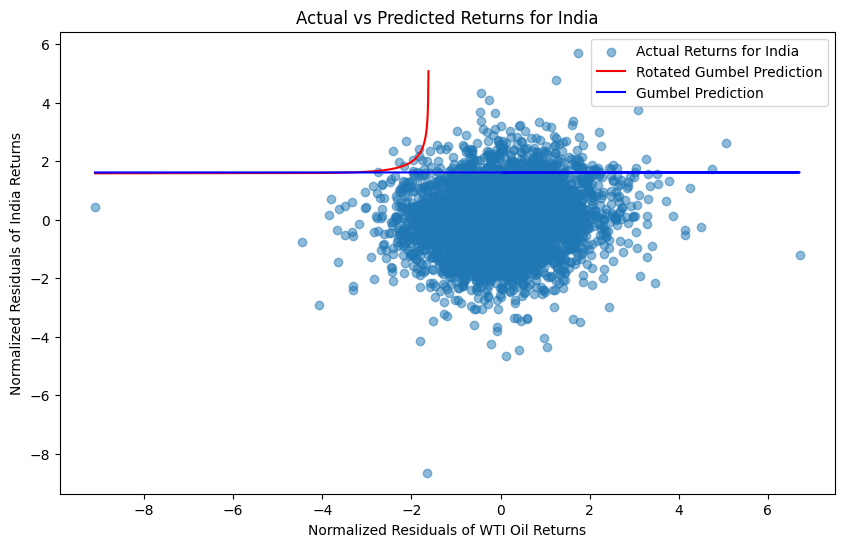

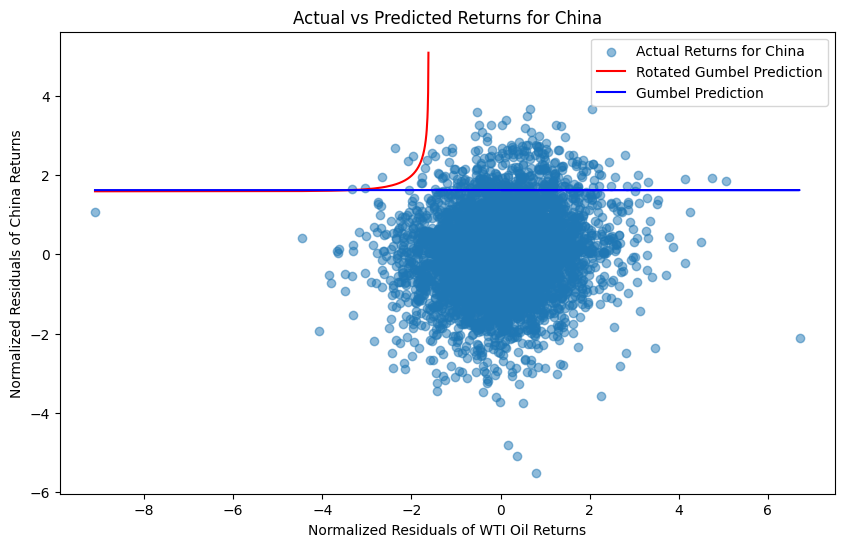

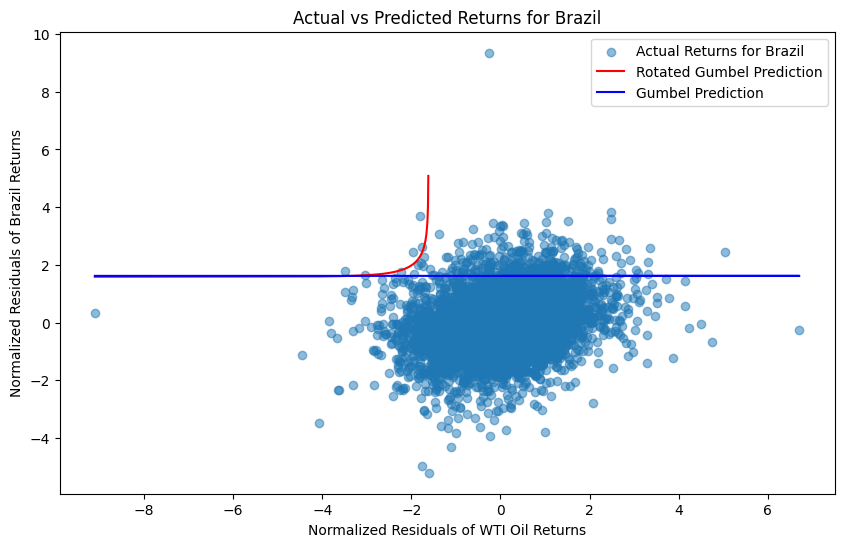

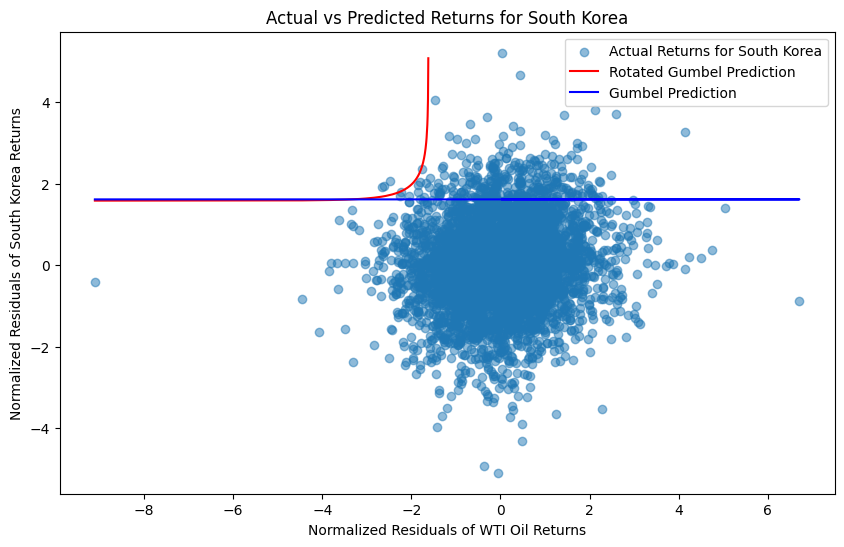

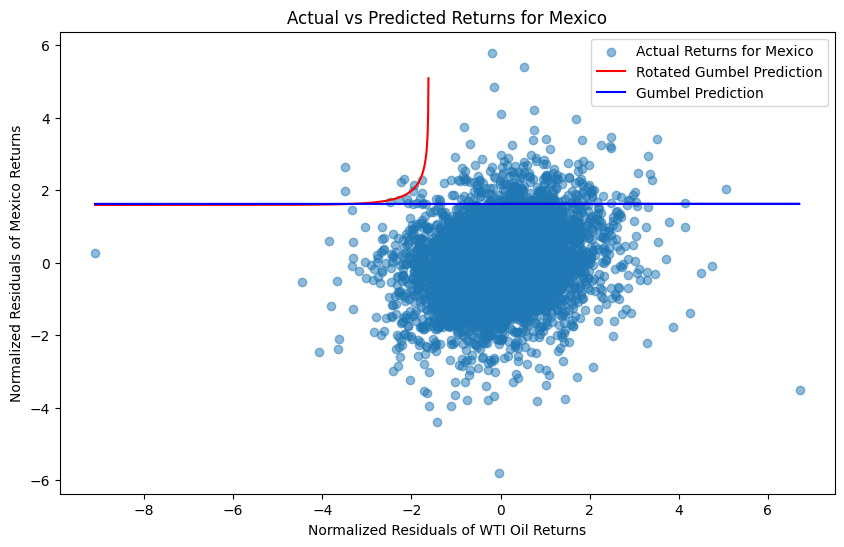

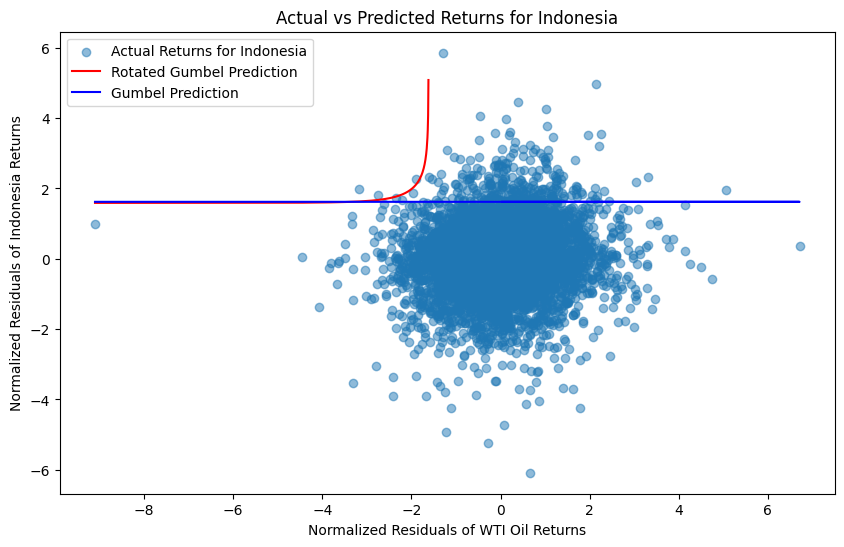

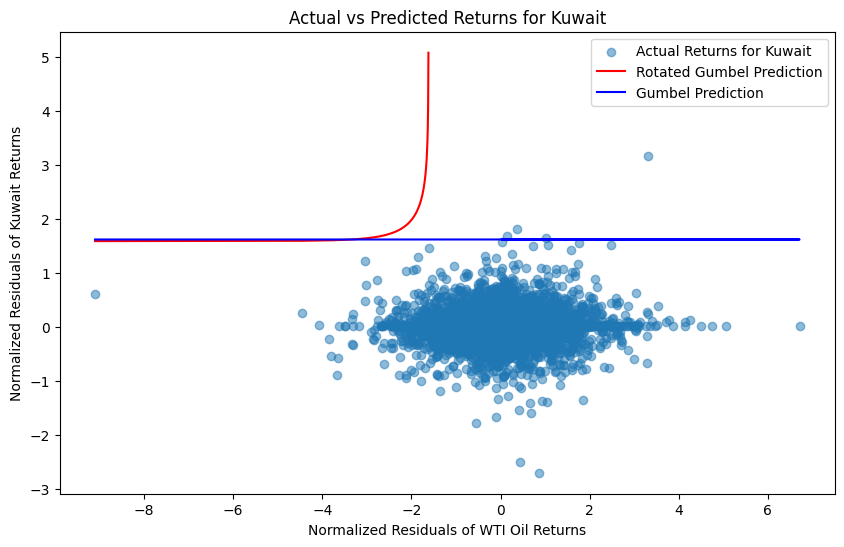

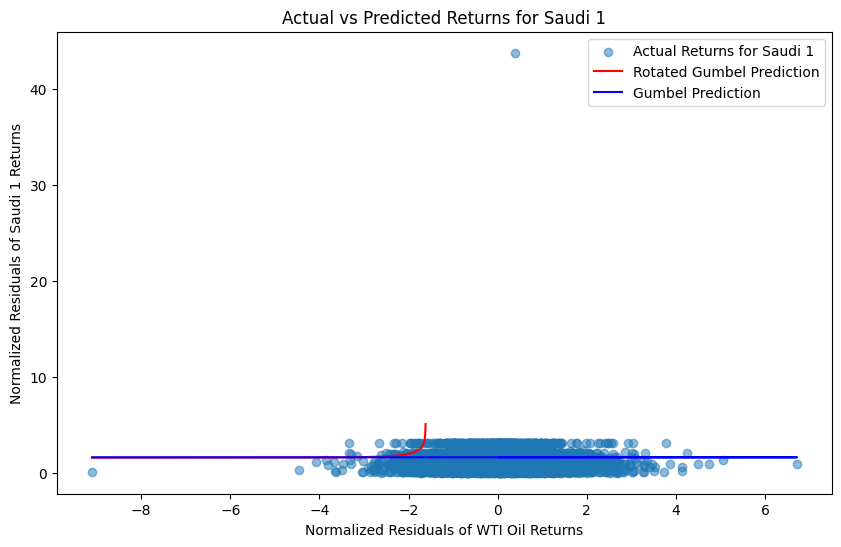

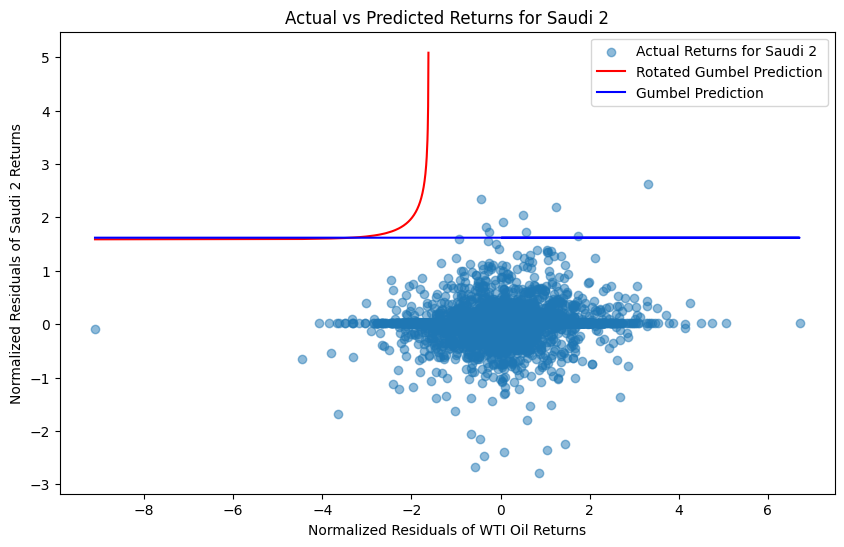

KeyError: ignored

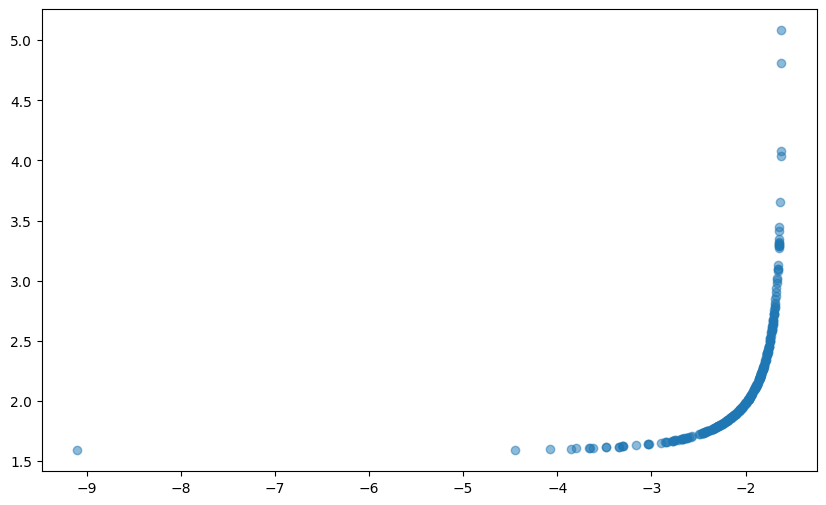

In [ ]:
# Plotting the actual returns vs. the predicted CoVaR values for each country
for country in Dat.columns:
    if country not in ['WTI oil', 'Brent oil']:  # Exclude the oil columns
        plt.figure(figsize=(10, 6))
        plt.scatter(Dat['WTI oil'], Dat[country], alpha=0.5, label=f'Actual Returns for {country}')
        plt.plot(Dat['WTI oil'], Dat[f'pred_rotated_{country}'], color='red', label='Rotated Gumbel Prediction')
        plt.plot(Dat['WTI oil'], Dat[f'pred_gumbel_{country}'], color='blue', label='Gumbel Prediction')
        plt.xlabel('Normalized Residuals of WTI Oil Returns')
        plt.ylabel(f'Normalized Residuals of {country} Returns')
        plt.title(f'Actual vs Predicted Returns for {country}')
        plt.legend()
        plt.show()


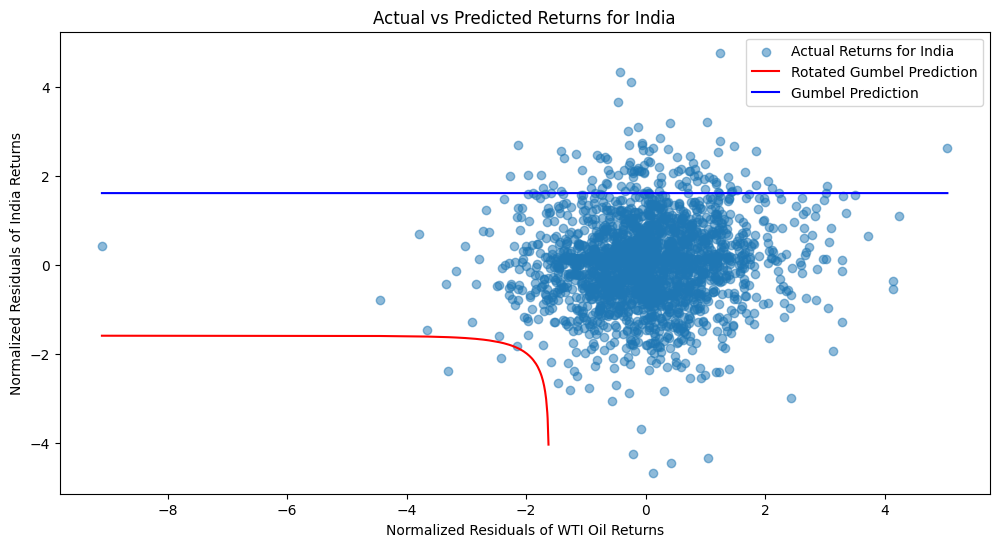

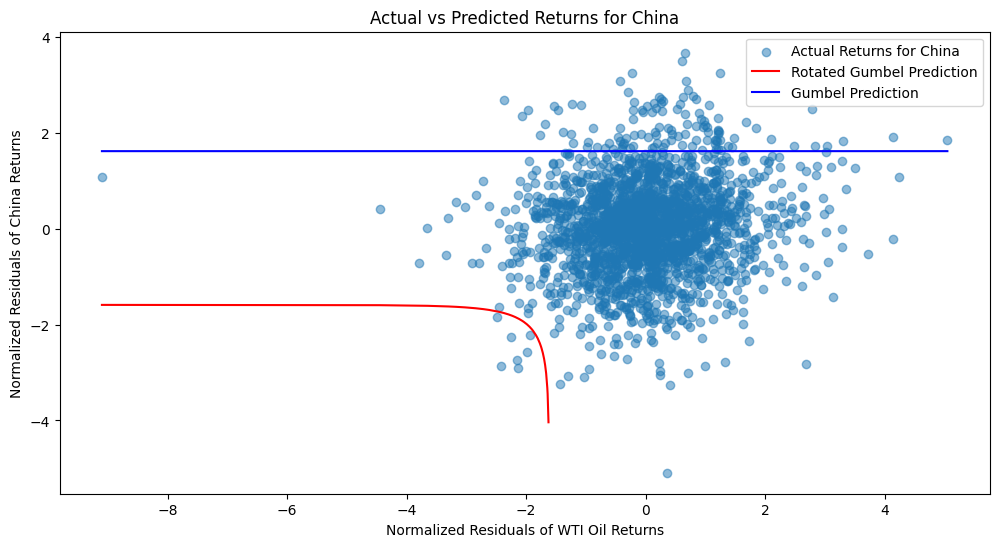

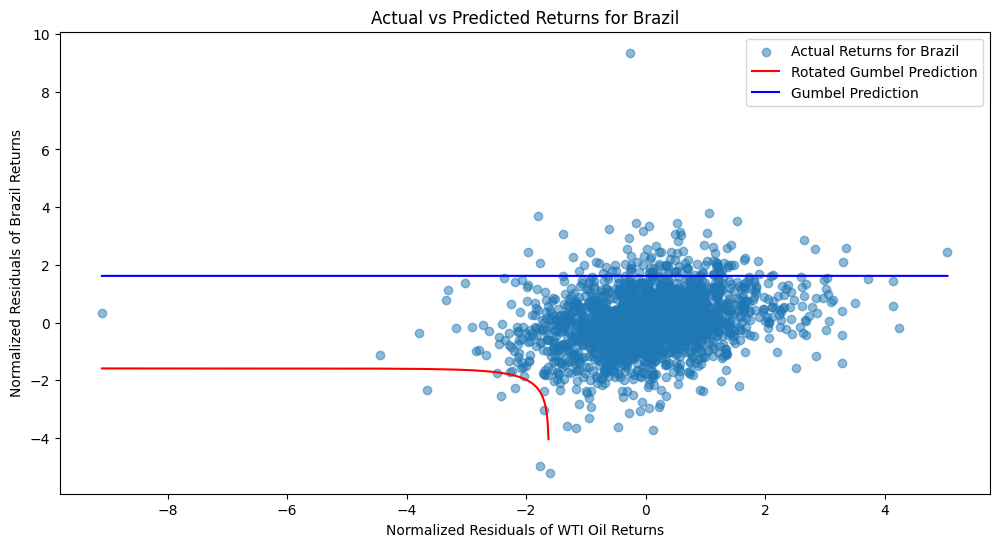

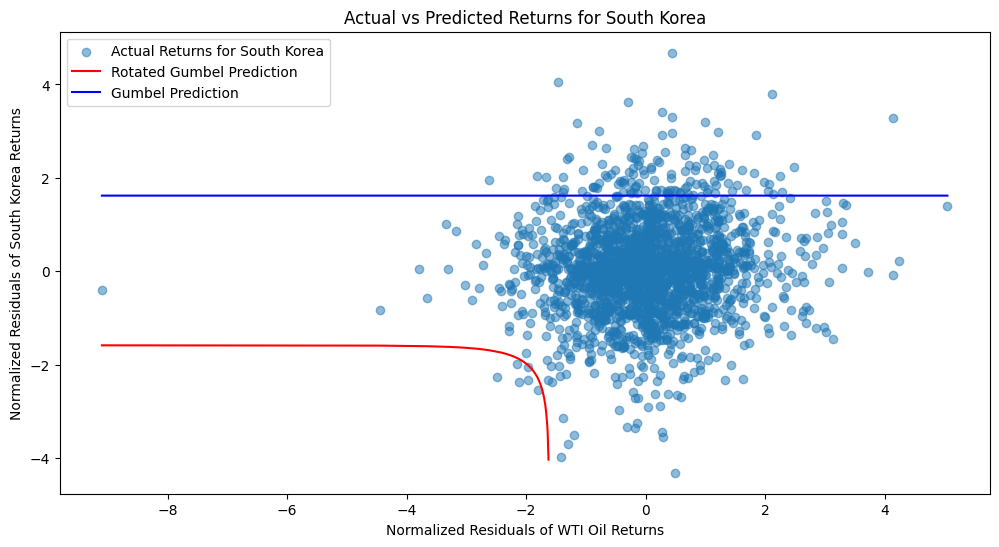

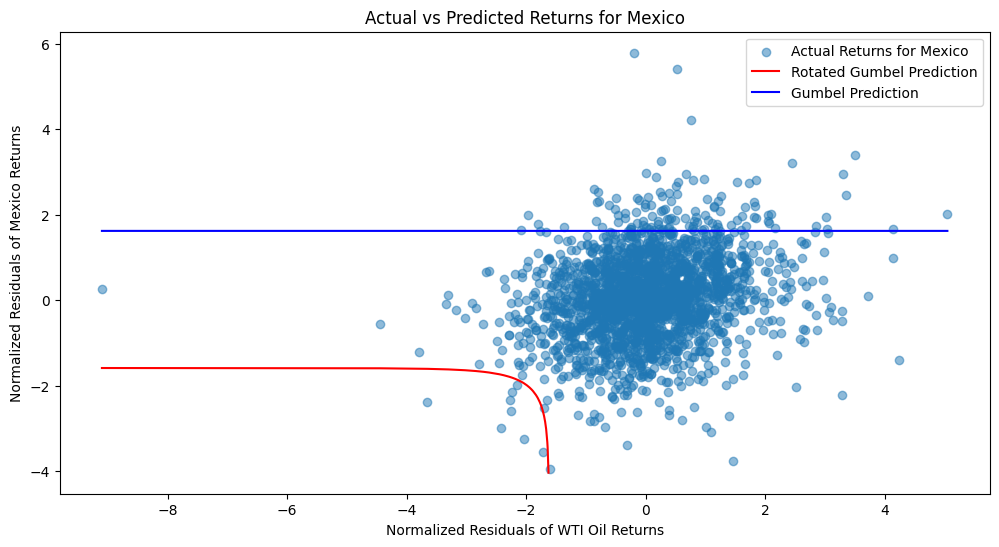

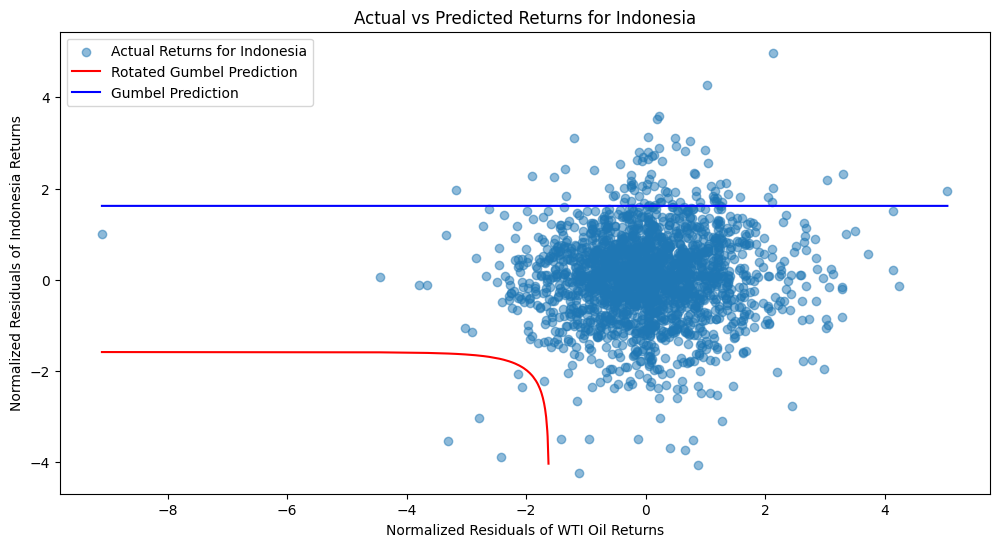

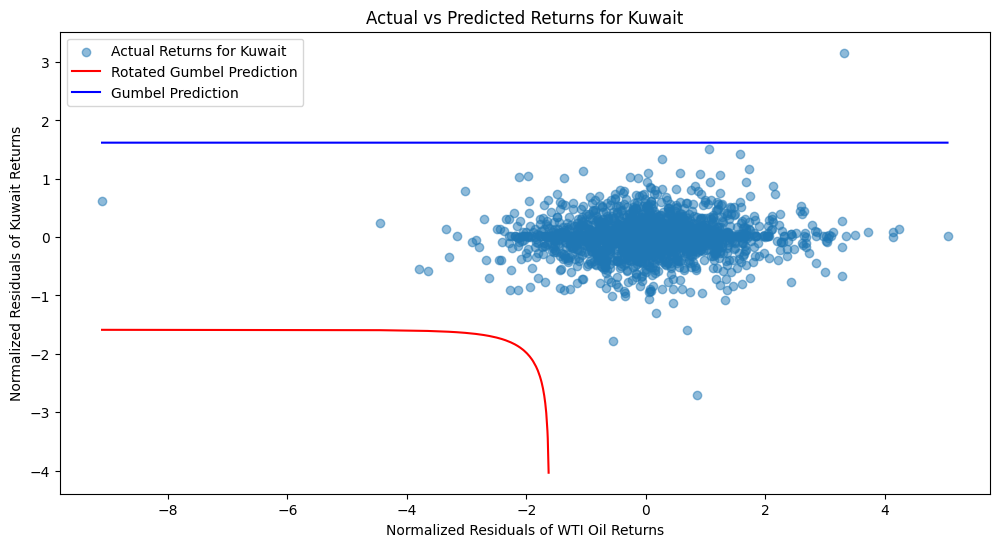

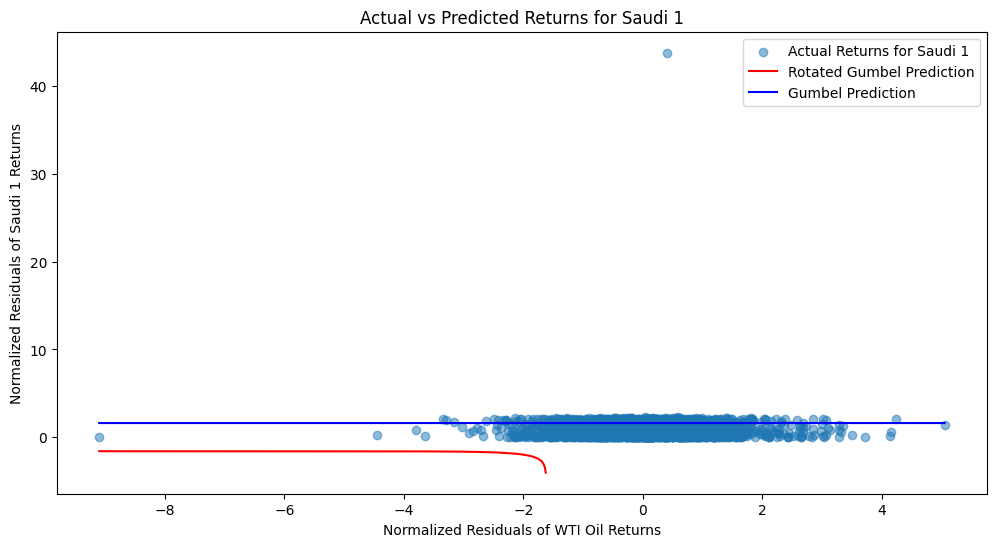

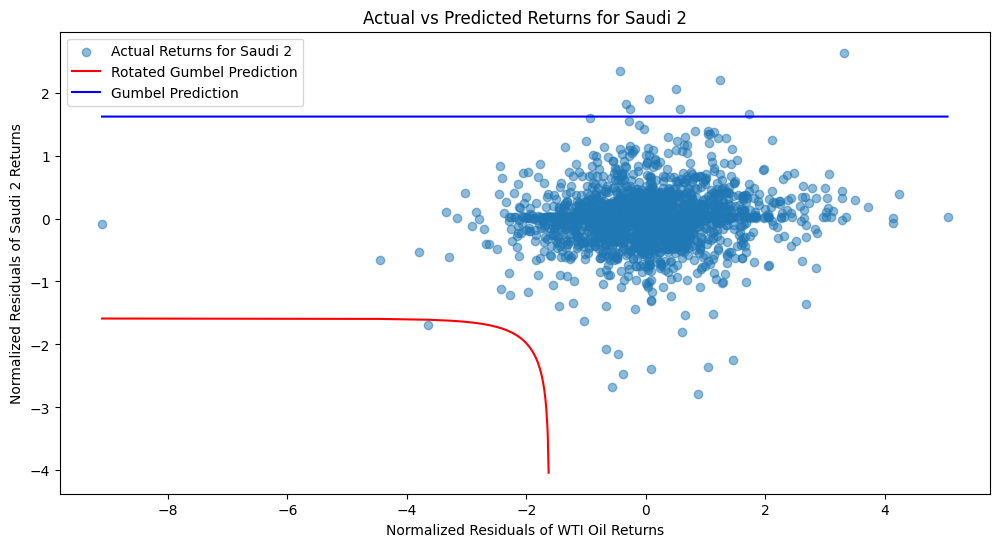

Predictions for pred_rotated_India could not be plotted due to earlier errors in root finding.
Predictions for pred_gumbel_India could not be plotted due to earlier errors in root finding.
Predictions for pred_rotated_China could not be plotted due to earlier errors in root finding.
Predictions for pred_gumbel_China could not be plotted due to earlier errors in root finding.
Predictions for pred_rotated_Brazil could not be plotted due to earlier errors in root finding.
Predictions for pred_gumbel_Brazil could not be plotted due to earlier errors in root finding.
Predictions for pred_rotated_South Korea could not be plotted due to earlier errors in root finding.
Predictions for pred_gumbel_South Korea could not be plotted due to earlier errors in root finding.
Predictions for pred_rotated_Mexico could not be plotted due to earlier errors in root finding.
Predictions for pred_gumbel_Mexico could not be plotted due to earlier errors in root finding.
Predictions for pred_rotated_Indonesia 

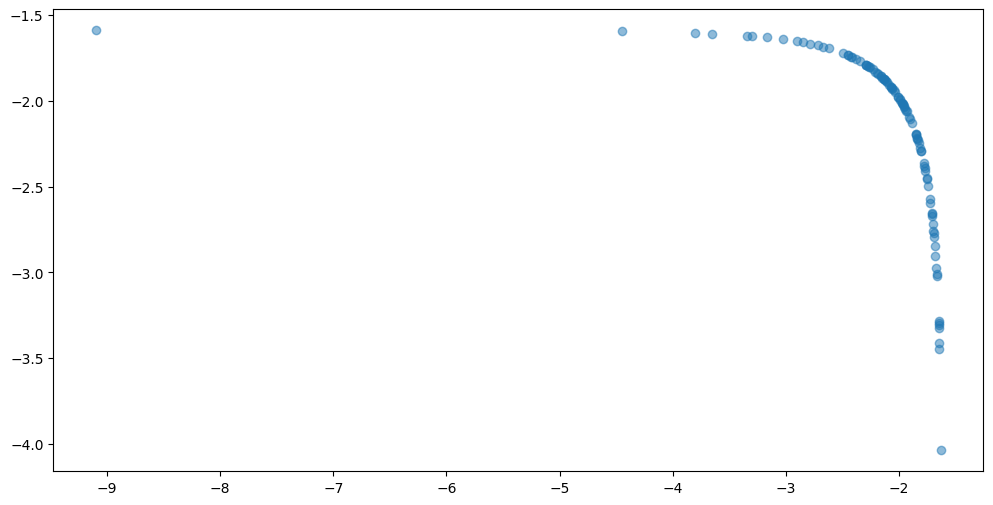

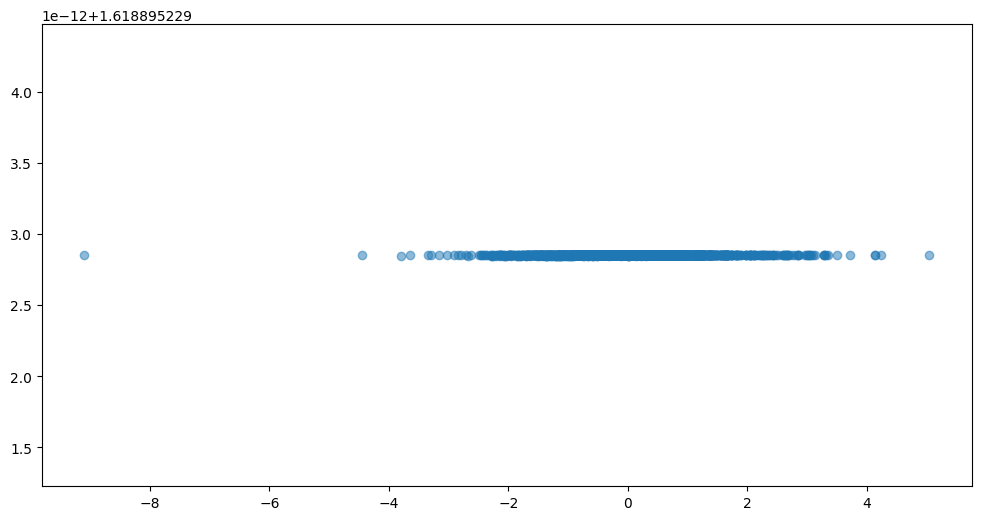

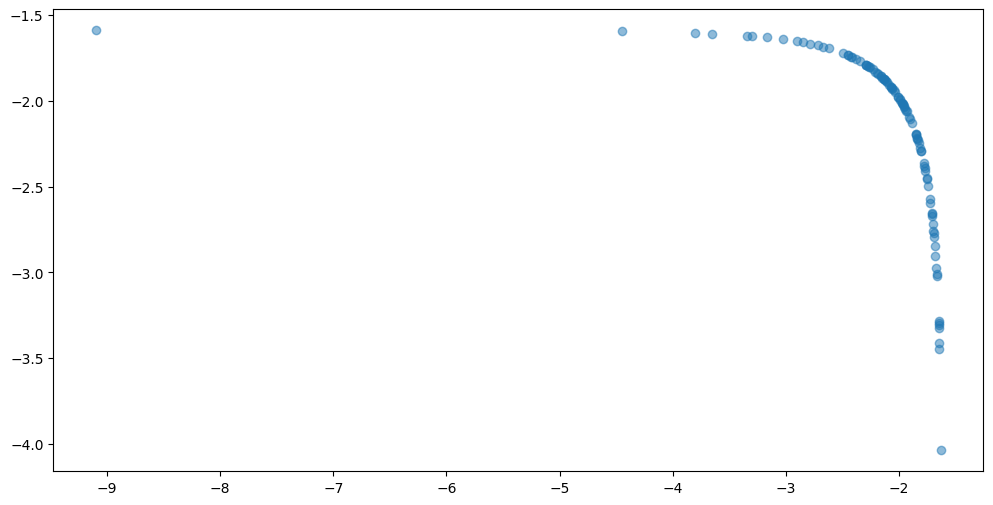

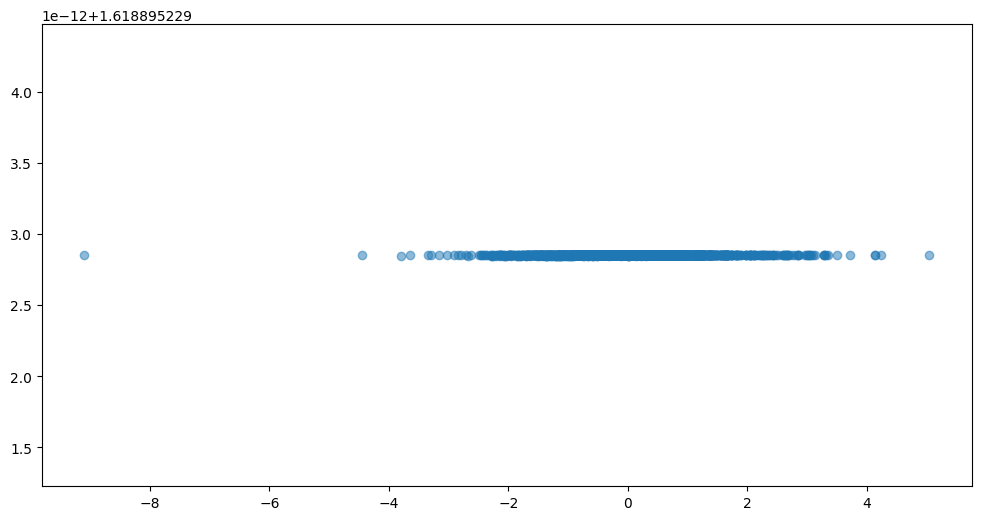

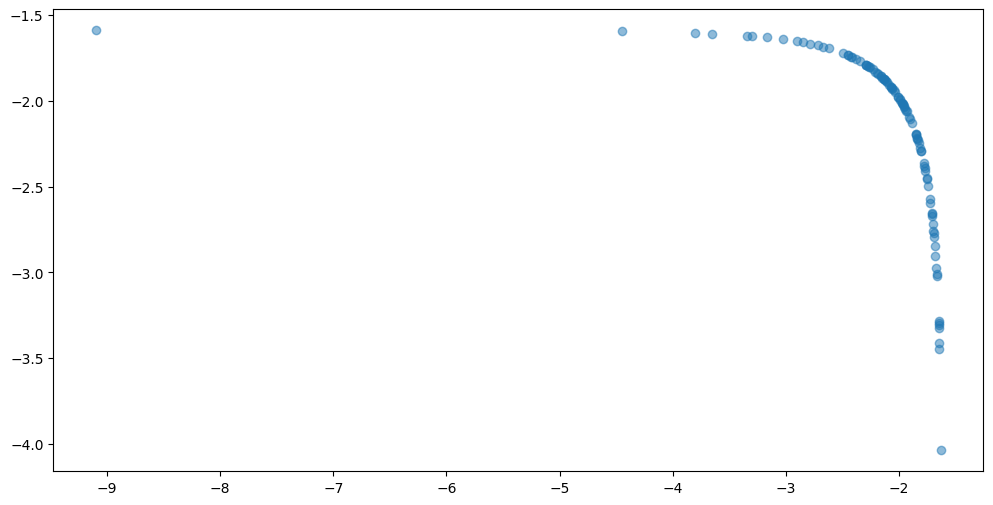

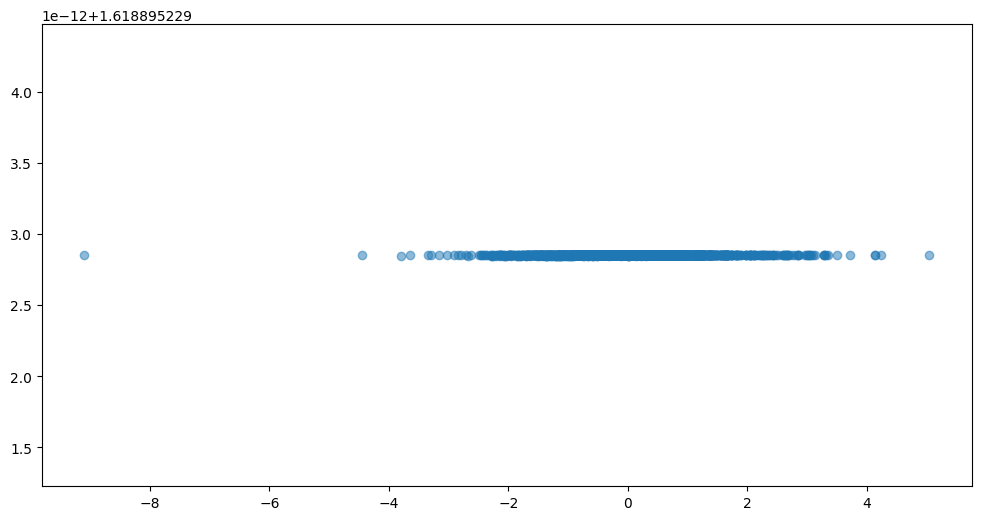

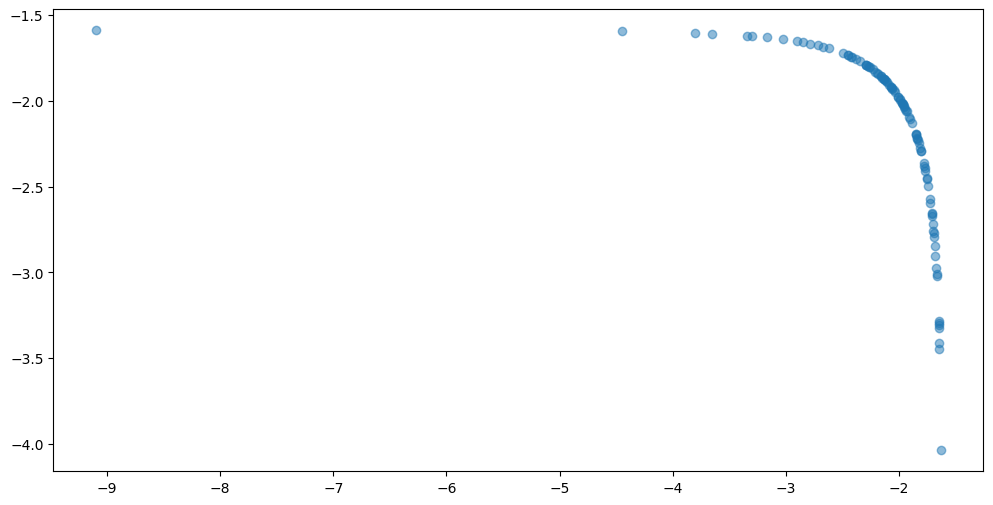

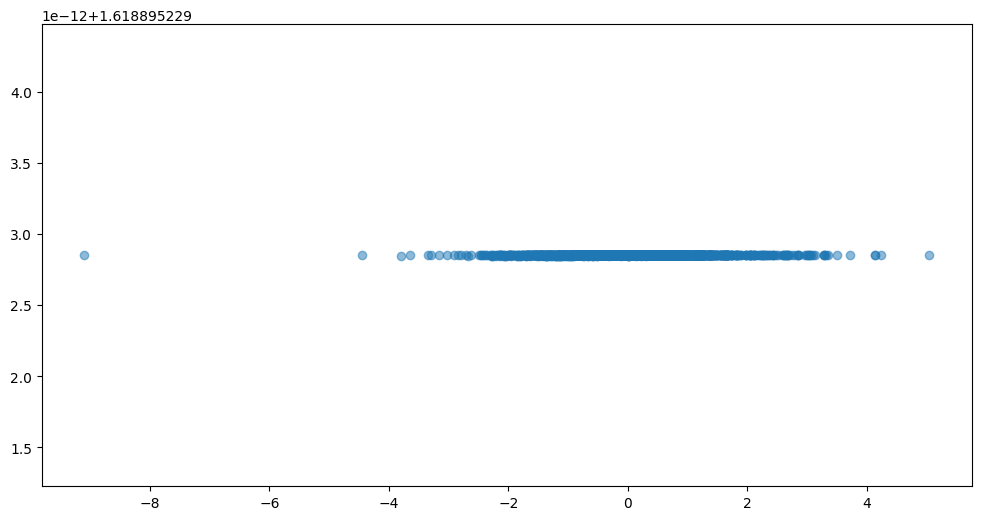

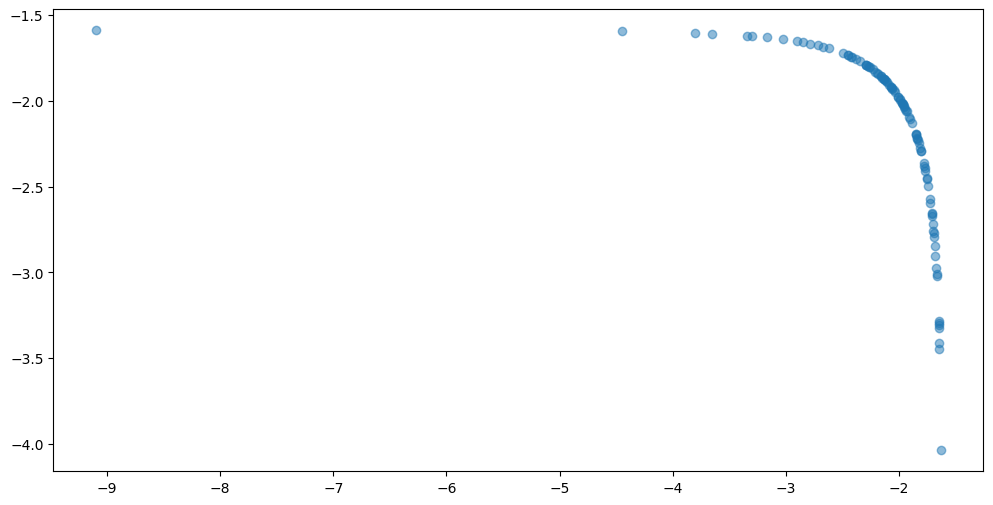

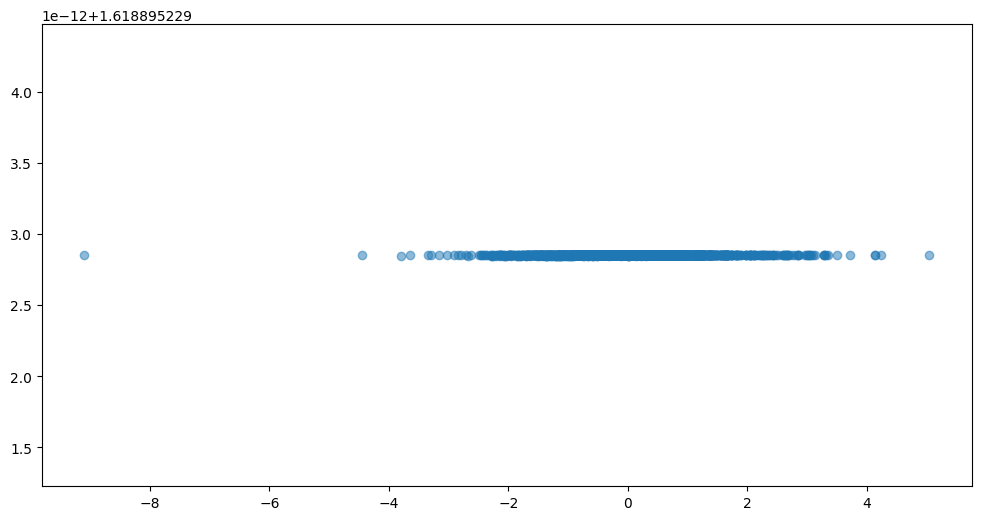

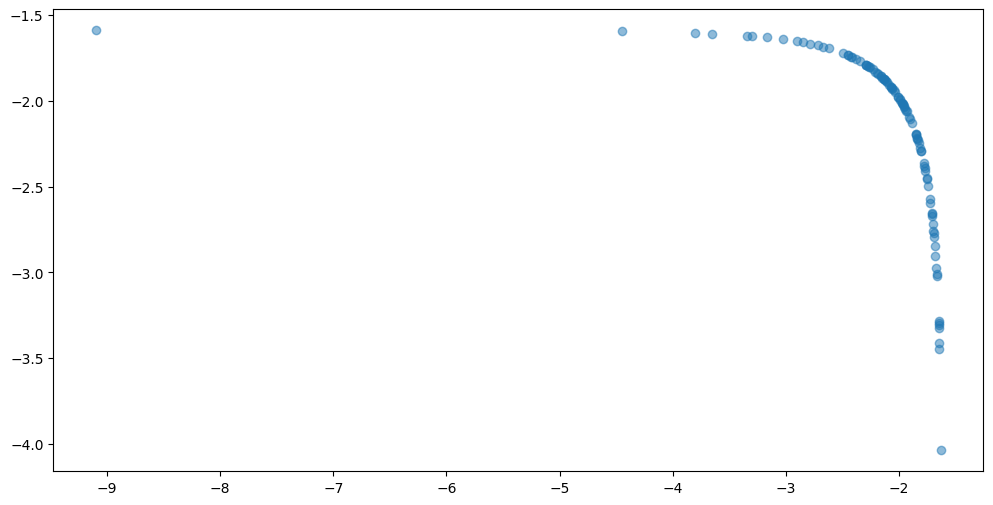

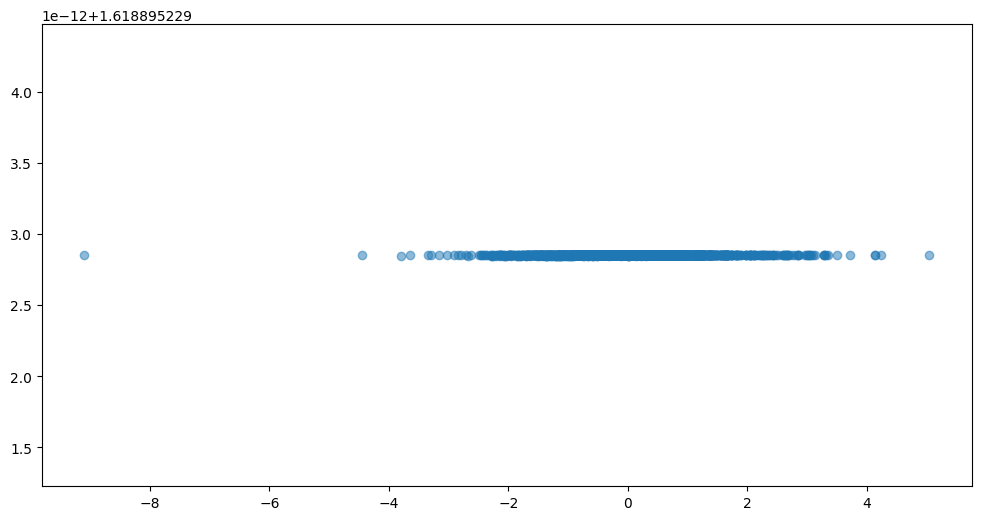

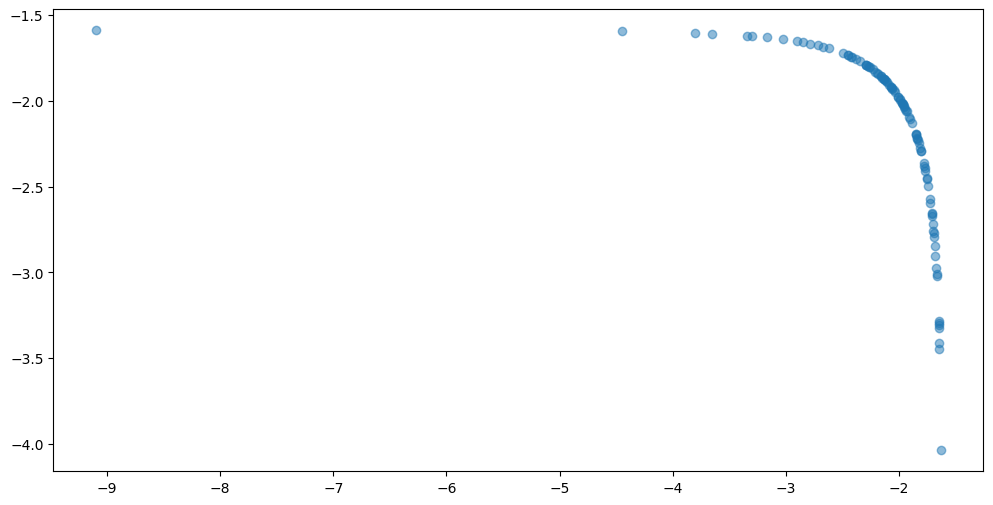

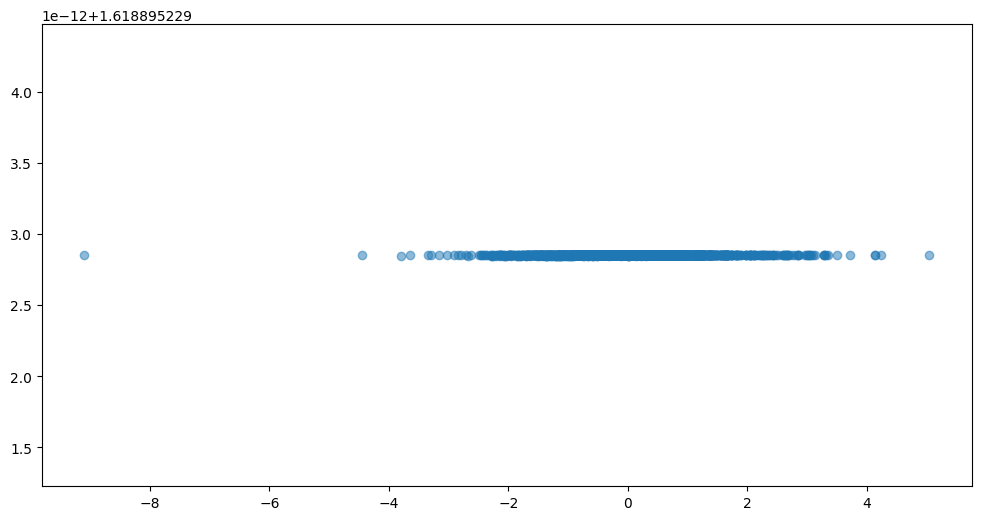

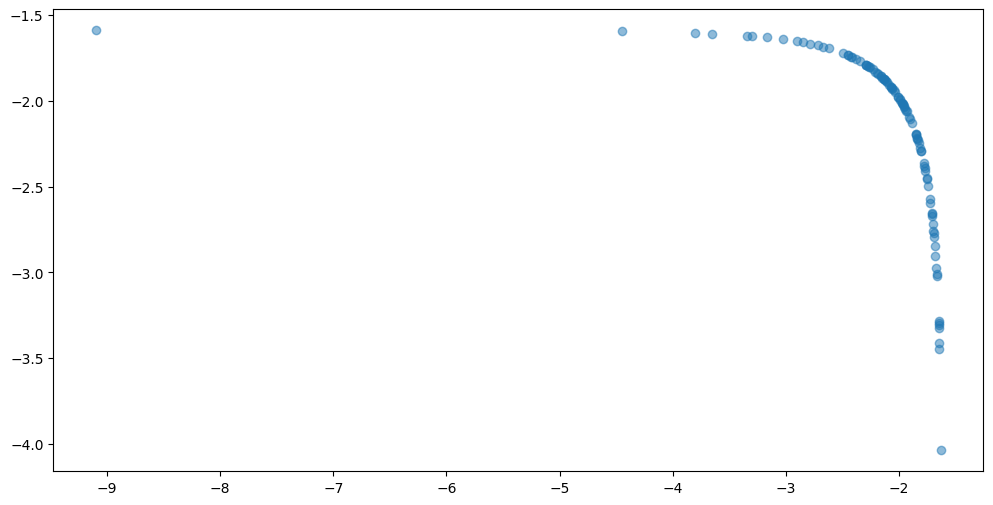

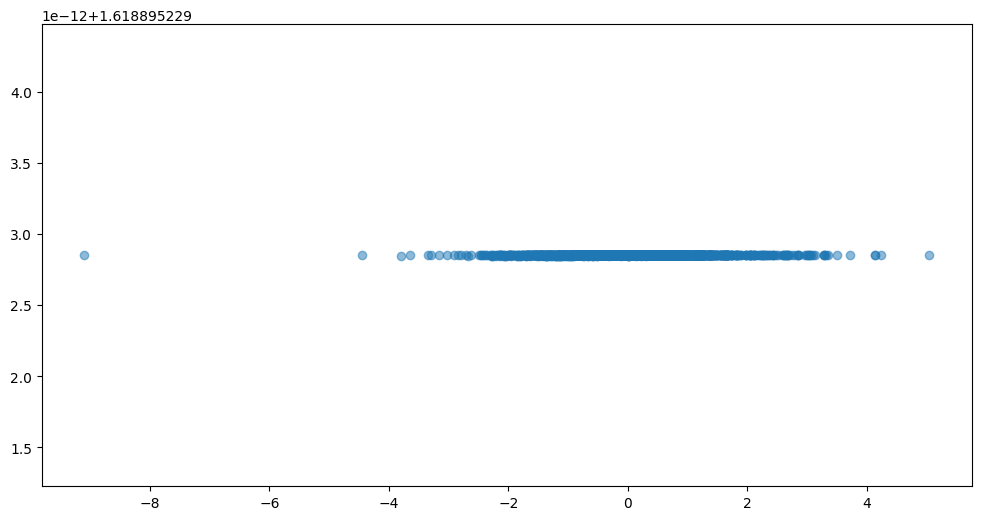

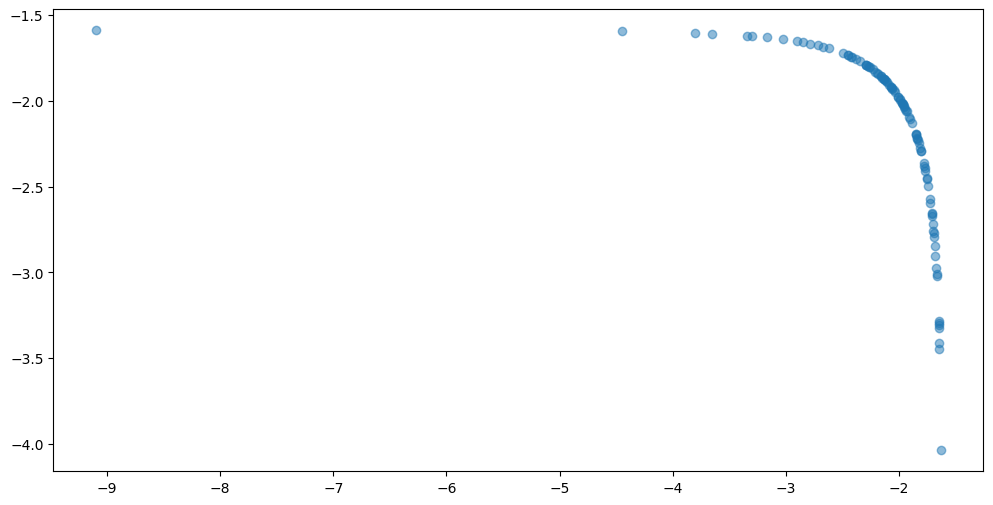

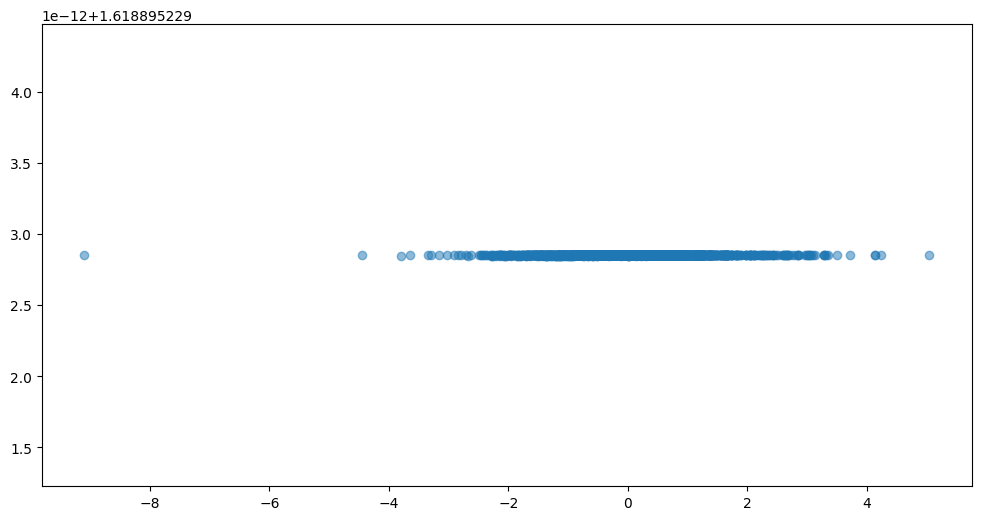

In [ ]:
import matplotlib.pyplot as plt

# Plotting function for each country
def plot_results(Dat, country):
    plt.figure(figsize=(12, 6))

    # Plot actual returns
    plt.scatter(Dat['WTI oil'], Dat[country], alpha=0.5, label=f'Actual Returns for {country}')

    # Check if predictions exist in the DataFrame (to handle cases where root finding may have failed)
    if f'pred_rotated_{country}' in Dat and f'pred_gumbel_{country}' in Dat:
        # Plot predictions from the rotated Gumbel model
        plt.plot(Dat['WTI oil'], Dat[f'pred_rotated_{country}'], color='red', label='Rotated Gumbel Prediction')

        # Plot predictions from the Gumbel model
        plt.plot(Dat['WTI oil'], Dat[f'pred_gumbel_{country}'], color='blue', label='Gumbel Prediction')

        plt.xlabel('Normalized Residuals of WTI Oil Returns')
        plt.ylabel(f'Normalized Residuals of {country} Returns')
        plt.title(f'Actual vs Predicted Returns for {country}')
        plt.legend()
        plt.show()
    else:
        print(f"Predictions for {country} could not be plotted due to earlier errors in root finding.")

# Iterate over each country and generate the plots
for country in Dat.columns:
    if country not in ['WTI oil', 'Brent oil']:  # Exclude the oil columns
        plot_results(Dat, country)


In [ ]:
# Assuming 'Dat' is your DataFrame with the results

# Save to CSV
results_csv_path = 'results.csv'
Dat.to_csv(results_csv_path, index=False)

# Use the Google Colab files module to download the file to your local machine
from google.colab import files
files.download(results_csv_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
lower_tail_confidence_level = 0.05
upper_tail_confidence_level = 0.95


In [ ]:
# Initialize a dictionary to store the CoVaR results
covar_results = {}

for country in Dat.columns:
    if country not in ['WTI oil', 'Brent oil']:  # Exclude the oil columns
        # Calculate the unconditional VaR for the country residuals
        country_var_lower = np.percentile(Dat[country].dropna(), lower_tail_confidence_level * 100)
        country_var_upper = np.percentile(Dat[country].dropna(), upper_tail_confidence_level * 100)

        print(f"Unconditional VaR (Lower Tail) for {country} residuals: {country_var_lower}")
        print(f"Unconditional VaR (Upper Tail) for {country} residuals: {country_var_upper}")


Unconditional VaR (Lower Tail) for India residuals: -1.4915122083930887
Unconditional VaR (Upper Tail) for India residuals: 1.6259709303187382
Unconditional VaR (Lower Tail) for China residuals: -1.594421536457345
Unconditional VaR (Upper Tail) for China residuals: 1.67284076864324
Unconditional VaR (Lower Tail) for Brazil residuals: -1.6549757743306663
Unconditional VaR (Upper Tail) for Brazil residuals: 1.6764642518528727
Unconditional VaR (Lower Tail) for South Korea residuals: -1.5152921401861748
Unconditional VaR (Upper Tail) for South Korea residuals: 1.7159295604111484
Unconditional VaR (Lower Tail) for Mexico residuals: -1.5837012094906
Unconditional VaR (Upper Tail) for Mexico residuals: 1.6558319682303315
Unconditional VaR (Lower Tail) for Indonesia residuals: -1.5098681886832293
Unconditional VaR (Upper Tail) for Indonesia residuals: 1.5346002093221343
Unconditional VaR (Lower Tail) for Kuwait residuals: -0.49410114710836966
Unconditional VaR (Upper Tail) for Kuwait residual

In [ ]:
for country in Dat.columns:
    if country not in ['WTI oil', 'Brent oil']:
        # Calculate the unconditional VaR for the country residuals
        country_var_lower = np.percentile(Dat[country].dropna(), lower_tail_confidence_level * 100)
        country_var_upper = np.percentile(Dat[country].dropna(), upper_tail_confidence_level * 100)

        # Find rows where WTI oil residuals are below or equal to the lower VaR for the country
        condition_lower_wti = Dat['WTI oil'].dropna() <= country_var_lower
        condition_upper_wti = Dat['WTI oil'].dropna() >= country_var_upper

        # Subset the data for lower and upper CoVaR conditions
        subset_lower_wti = Dat[country][condition_lower_wti].dropna()
        subset_upper_wti = Dat[country][condition_upper_wti].dropna()

        # Check if the subsets are empty and handle accordingly
        if not subset_lower_wti.empty:
            covar_country_given_wti_lower = np.percentile(subset_lower_wti, lower_tail_confidence_level * 100)
            print(f"Conditional VaR (Lower Tail) for {country} given WTI oil at VaR: {covar_country_given_wti_lower}")
        else:
            covar_country_given_wti_lower = np.nan
            print(f"No data points for {country} below the lower VaR of WTI oil.")

        if not subset_upper_wti.empty:
            covar_country_given_wti_upper = np.percentile(subset_upper_wti, upper_tail_confidence_level * 100)
            print(f"Conditional VaR (Upper Tail) for {country} given WTI oil at VaR: {covar_country_given_wti_upper}")
        else:
            covar_country_given_wti_upper = np.nan
            print(f"No data points for {country} above the upper VaR of WTI oil.")

        # Store the results
        covar_results[country] = {
            'WTI_Lower': covar_country_given_wti_lower,
            'WTI_Upper': covar_country_given_wti_upper
        }


Conditional VaR (Lower Tail) for India given WTI oil at VaR: -1.5219091394593338
Conditional VaR (Upper Tail) for India given WTI oil at VaR: 1.7402394183224328
Conditional VaR (Lower Tail) for China given WTI oil at VaR: -2.0998747244812974
Conditional VaR (Upper Tail) for China given WTI oil at VaR: 1.845079009984537
Conditional VaR (Lower Tail) for Brazil given WTI oil at VaR: -2.2777360809206435
Conditional VaR (Upper Tail) for Brazil given WTI oil at VaR: 2.1105433787559615
Conditional VaR (Lower Tail) for South Korea given WTI oil at VaR: -2.0466298600348285
Conditional VaR (Upper Tail) for South Korea given WTI oil at VaR: 2.047026655397685
Conditional VaR (Lower Tail) for Mexico given WTI oil at VaR: -2.4796836514089757
Conditional VaR (Upper Tail) for Mexico given WTI oil at VaR: 2.3865018212617564
Conditional VaR (Lower Tail) for Indonesia given WTI oil at VaR: -1.4598257467511908
Conditional VaR (Upper Tail) for Indonesia given WTI oil at VaR: 1.722193374479056
Conditional V

In [ ]:
# Define the confidence levels for CoVaR
lower_tail_confidence_level = 0.05
upper_tail_confidence_level = 0.95

# Initialize a dictionary to store the CoVaR results for both Brent and WTI oil
covar_results = {}

# Loop over each country to calculate VaR and CoVaR for both WTI and Brent oil
for country in Dat.columns:
    if country not in ['WTI oil', 'Brent oil']:  # Exclude the oil columns
        # Calculate the unconditional VaR for the country residuals
        country_var_lower = np.percentile(Dat[country].dropna(), lower_tail_confidence_level * 100)
        country_var_upper = np.percentile(Dat[country].dropna(), upper_tail_confidence_level * 100)

        # For WTI oil
        # Calculate CoVaR for the country residuals given the WTI oil residuals are at their VaR level
        covar_wti_lower = Dat.loc[Dat['WTI oil'] <= country_var_lower, country].dropna()
        covar_wti_upper = Dat.loc[Dat['WTI oil'] >= country_var_upper, country].dropna()

        # For Brent oil
        # Calculate CoVaR for the country residuals given the Brent oil residuals are at their VaR level
        covar_brent_lower = Dat.loc[Dat['Brent oil'] <= country_var_lower, country].dropna()
        covar_brent_upper = Dat.loc[Dat['Brent oil'] >= country_var_upper, country].dropna()

        # Store results in the dictionary
        covar_results[country] = {
            'WTI_CoVaR_Lower': np.percentile(covar_wti_lower, lower_tail_confidence_level * 100) if not covar_wti_lower.empty else np.nan,
            'WTI_CoVaR_Upper': np.percentile(covar_wti_upper, upper_tail_confidence_level * 100) if not covar_wti_upper.empty else np.nan,
            'Brent_CoVaR_Lower': np.percentile(covar_brent_lower, lower_tail_confidence_level * 100) if not covar_brent_lower.empty else np.nan,
            'Brent_CoVaR_Upper': np.percentile(covar_brent_upper, upper_tail_confidence_level * 100) if not covar_brent_upper.empty else np.nan
        }

# Convert the results dictionary to a DataFrame for easy CSV export
covar_results_df = pd.DataFrame(covar_results).transpose()

# Print the results to verify
print(covar_results_df)

# Save the results to CSV
results_csv_path = '/content/covar_results.csv'
covar_results_df.to_csv(results_csv_path)

# Use the Google Colab files module to download the file to your local machine
from google.colab import files
files.download(results_csv_path)


                          WTI_CoVaR_Lower  WTI_CoVaR_Upper  Brent_CoVaR_Lower  \
India                           -1.521909         1.740239          -1.676016   
China                           -2.099875         1.845079          -2.090526   
Brazil                          -2.277736         2.110543          -2.326726   
South Korea                     -2.046630         2.047027          -2.193758   
Mexico                          -2.479684         2.386502          -2.283997   
Indonesia                       -1.459826         1.722193          -2.196777   
Kuwait                          -0.512882         0.550419          -0.513153   
Saudi 1                          0.052725         2.078288           0.052699   
Saudi 2                         -0.620851         0.738359          -0.654862   
pred_rotated_India              -1.620830              NaN          -2.156689   
pred_gumbel_India                1.618895         1.618895           1.618895   
pred_rotated_China          

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


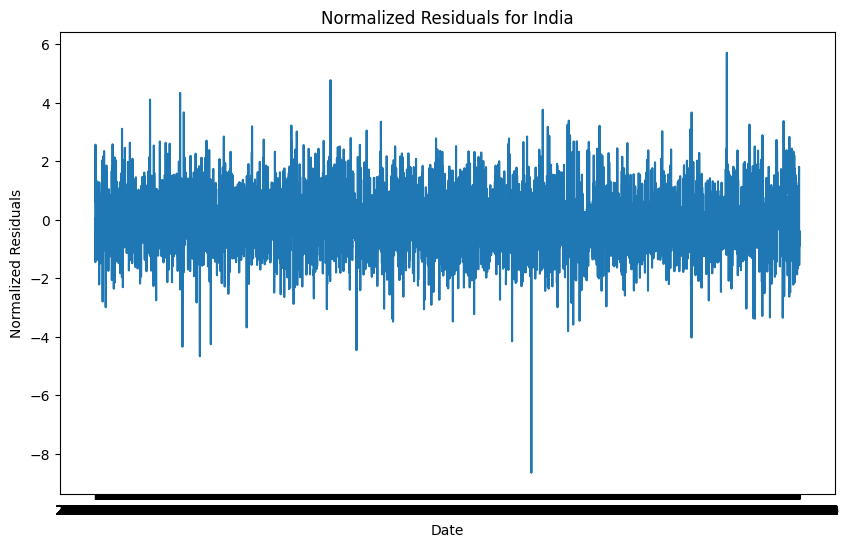

In [ ]:
import pandas as pd
from arch import arch_model
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.regression.quantile_regression import QuantReg

# Load the returns data
df = pd.read_csv('combined_log_returns.csv')

# Function to fit ARMA-GARCH model
def fit_arma_garch(series):
    model = arch_model(series, p=1, o=1, q=1, mean='ARX', vol='EGARCH', dist='skewt')
    fitted_model = model.fit(update_freq=5, disp='off')
    return fitted_model

# Fit the models for each returns series in the dataframe
fits = {column: fit_arma_garch(df[column].dropna()) for column in df.columns[1:]}

# Calculate residuals and conditional volatility
residuals = {column: fit.resid for column, fit in fits.items()}
sigmas = {column: fit.conditional_volatility for column, fit in fits.items()}

# Normalize the residuals by their conditional volatility
normalized_residuals = {column: residuals[column] / sigmas[column] for column in residuals}

# Assuming 'df' is your DataFrame and 'normalized_residuals' is a dictionary containing the residuals

# Drop the first date in the 'Dates' column to align with the residuals
# This is necessary because the first value in a differenced series is typically NaN
aligned_dates = df['Dates'][1:]  # Skip the first date

# Now plot the aligned dates with the residuals
plt.figure(figsize=(10, 6))
plt.plot(aligned_dates, normalized_residuals['India'])
plt.title('Normalized Residuals for India')
plt.xlabel('Date')
plt.ylabel('Normalized Residuals')
plt.show()



In [ ]:
import matplotlib.pyplot as plt

# Assuming 'normalized_residuals' is a dictionary with country names as keys and normalized residuals as values
# And 'df' is the DataFrame with the 'Dates' column for plotting

# Plotting the normalized residuals for all countries
for country, residuals in normalized_residuals.items():
    plt.figure(figsize=(12, 6))
    plt.plot(df['Dates'][1:], residuals, label=f'Normalized Residuals for {country}')
    plt.title(f'Normalized Residuals for {country}')
    plt.xlabel('Date')
    plt.ylabel('Normalized Residuals')
    plt.legend()
    plt.show()


KeyboardInterrupt: ignored

ValueError: ignored

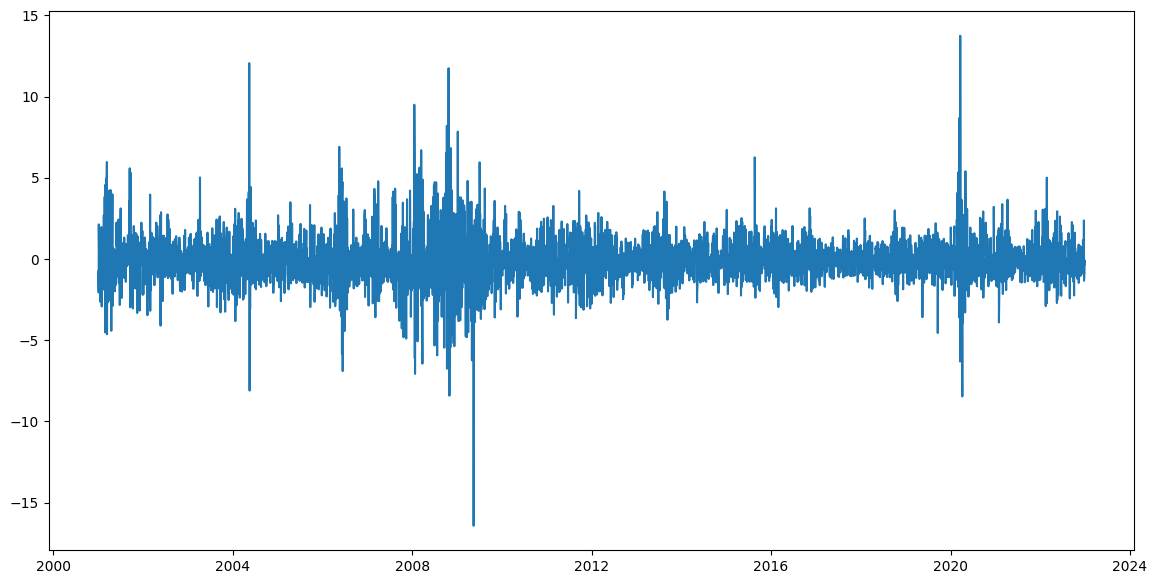

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
df_results = pd.read_csv('results.csv')
df_log_returns = pd.read_csv('combined_log_returns.csv')

# Convert 'Dates' to datetime if it's not already in that format in df_log_returns
df_log_returns['Dates'] = pd.to_datetime(df_log_returns['Dates'])

# Set 'Dates' as index for easier plotting
df_log_returns.set_index('Dates', inplace=True)

# We will be using the predicted values from results.csv to plot the 1% VaR Limits
# Assume that 'pred_gumbel_...' columns are the 1% VaR Limits for the corresponding country
# Here's how to extract the VaR Limits for India as an example
india_var_limits = df_results['pred_gumbel_India']

# Now let's plot the time series for India with the 1% VaR Limits
plt.figure(figsize=(14, 7))
plt.plot(df_log_returns['India'], label='India Returns')
plt.plot(df_log_returns.index, india_var_limits, color='red', label='India 1% VaR Limits')
plt.title('Series with 1% VaR Limits for India')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Now for the Series with 2 Conditional SD Superimposed, we need the conditional SD
# Since we don't have the conditional SD directly, we will simulate this using the residuals
# Assuming that 'India' column in df_results is the residual for India's returns
# We will calculate the standard deviation of the residuals as a proxy for conditional SD
india_residuals = df_results['India']
india_cond_sd = india_residuals.std()

# Plotting the India returns with 2 conditional SD superimposed
plt.figure(figsize=(14, 7))
plt.plot(df_log_returns['India'], label='India Returns')
plt.fill_between(df_log_returns.index, df_log_returns['India'] - 2*india_cond_sd,
                 df_log_returns['India'] + 2*india_cond_sd, color='orange', alpha=0.3, label='±2 SD Band')
plt.title('Series with 2 Conditional SD Superimposed for India')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# You would repeat the above steps for each country you have in your datasets


In [ ]:
# Assuming df_results has a 'Dates' column that corresponds to df_log_returns 'Dates'.
# If not, you should modify the df_results to include this 'Dates' column.
# For example, if df_results is a result of some calculations based on df_log_returns:
df_results['Dates'] = df_log_returns['Dates']

# Now convert 'Dates' to datetime and set it as index for df_results
df_results['Dates'] = pd.to_datetime(df_results['Dates'])
df_results.set_index('Dates', inplace=True)

# Align the VaR limits with the log returns dataframe
india_var_limits_aligned = df_results['pred_gumbel_India'].reindex(df_log_returns.index)

# Now let's plot the time series for India with the 1% VaR Limits
plt.figure(figsize=(14, 7))
plt.plot(df_log_returns['India'], label='India Returns')
plt.plot(india_var_limits_aligned, color='red', label='India 1% VaR Limits')
plt.title('Series with 1% VaR Limits for India')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()


KeyError: ignored

<ipython-input-92-facd99418a07>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_log_returns['Dates'] = pd.to_datetime(df_log_returns['Dates'])


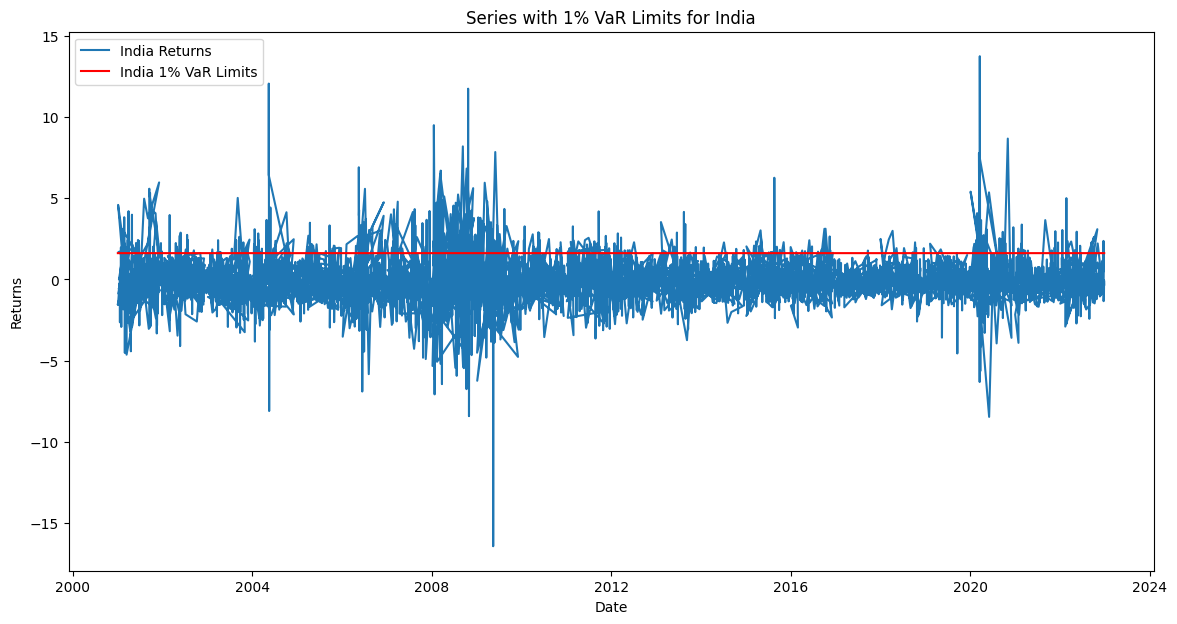

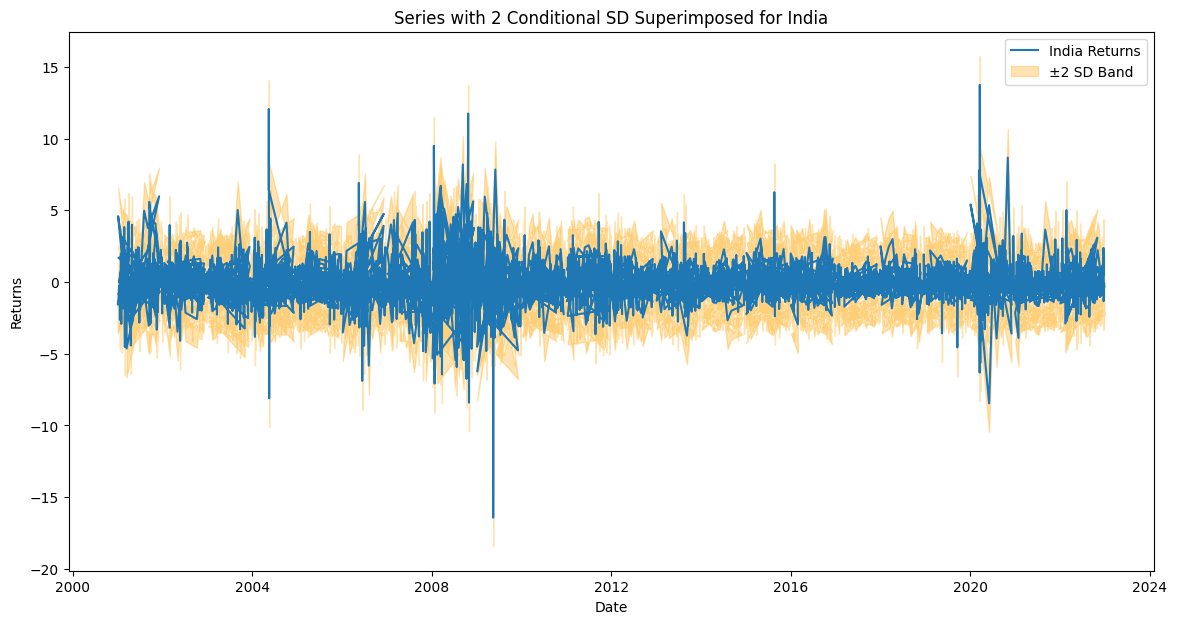

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
df_results = pd.read_csv('results.csv')
df_log_returns = pd.read_csv('combined_log_returns.csv')

# Convert 'Dates' to datetime if it's not already in that format in df_log_returns
df_log_returns['Dates'] = pd.to_datetime(df_log_returns['Dates'])

# Set 'Dates' as index for easier plotting
df_log_returns.set_index('Dates', inplace=True)

# We will be using the predicted values from results.csv to plot the 1% VaR Limits
# Assume that 'pred_gumbel_...' columns are the 1% VaR Limits for the corresponding country
# Here's how to extract the VaR Limits for India as an example
india_var_limits = df_results['pred_gumbel_India']

# Now let's plot the time series for India with the 1% VaR Limits
plt.figure(figsize=(14, 7))
plt.plot(df_log_returns['India'], label='India Returns')
plt.plot(df_log_returns.index, india_var_limits, color='red', label='India 1% VaR Limits')
plt.title('Series with 1% VaR Limits for India')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Now for the Series with 2 Conditional SD Superimposed, we need the conditional SD
# Since we don't have the conditional SD directly, we will simulate this using the residuals
# Assuming that 'India' column in df_results is the residual for India's returns
# We will calculate the standard deviation of the residuals as a proxy for conditional SD
india_residuals = df_results['India']
india_cond_sd = india_residuals.std()

# Plotting the India returns with 2 conditional SD superimposed
plt.figure(figsize=(14, 7))
plt.plot(df_log_returns['India'], label='India Returns')
plt.fill_between(df_log_returns.index, df_log_returns['India'] - 2*india_cond_sd,
                 df_log_returns['India'] + 2*india_cond_sd, color='orange', alpha=0.3, label='±2 SD Band')
plt.title('Series with 2 Conditional SD Superimposed for India')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# You would repeat the above steps for each country you have in your datasets


<ipython-input-93-b8151c598cad>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_log_returns['Dates'] = pd.to_datetime(df_log_returns['Dates'])


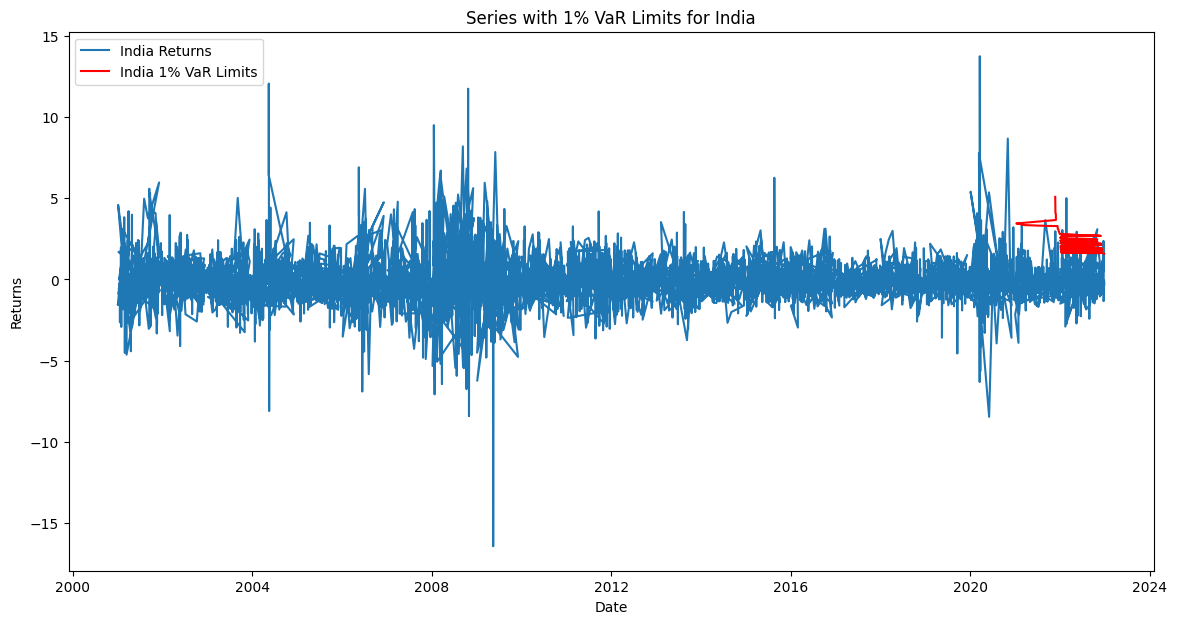

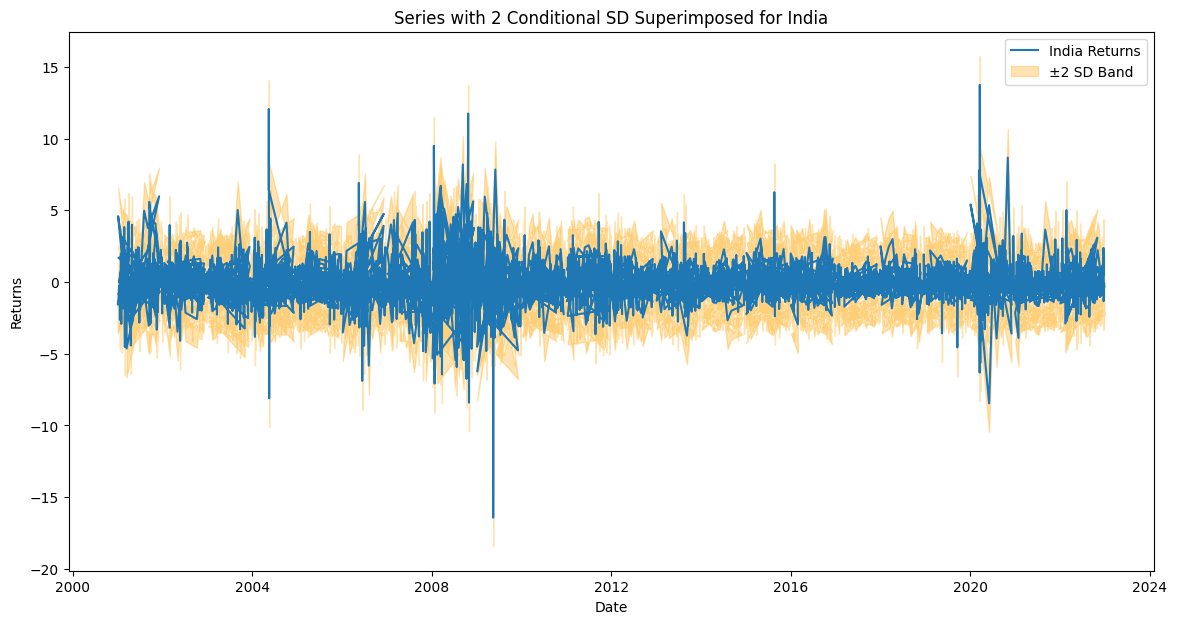

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
df_results = pd.read_csv('results.csv')
df_log_returns = pd.read_csv('combined_log_returns.csv')

# Convert 'Dates' to datetime if it's not already in that format in df_log_returns
df_log_returns['Dates'] = pd.to_datetime(df_log_returns['Dates'])

# Set 'Dates' as index for easier plotting
df_log_returns.set_index('Dates', inplace=True)

# We will be using the predicted values from results.csv to plot the 1% VaR Limits
# Assume that 'pred_gumbel_...' columns are the 1% VaR Limits for the corresponding country
# Here's how to extract the VaR Limits for India as an example
india_var_limits = df_results['pred_rotated_India']

# Now let's plot the time series for India with the 1% VaR Limits
plt.figure(figsize=(14, 7))
plt.plot(df_log_returns['India'], label='India Returns')
plt.plot(df_log_returns.index, india_var_limits, color='red', label='India 1% VaR Limits')
plt.title('Series with 1% VaR Limits for India')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Now for the Series with 2 Conditional SD Superimposed, we need the conditional SD
# Since we don't have the conditional SD directly, we will simulate this using the residuals
# Assuming that 'India' column in df_results is the residual for India's returns
# We will calculate the standard deviation of the residuals as a proxy for conditional SD
india_residuals = df_results['India']
india_cond_sd = india_residuals.std()

# Plotting the India returns with 2 conditional SD superimposed
plt.figure(figsize=(14, 7))
plt.plot(df_log_returns['India'], label='India Returns')
plt.fill_between(df_log_returns.index, df_log_returns['India'] - 2*india_cond_sd,
                 df_log_returns['India'] + 2*india_cond_sd, color='orange', alpha=0.3, label='±2 SD Band')
plt.title('Series with 2 Conditional SD Superimposed for India')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# You would repeat the above steps for each country you have in your datasets
